In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Import the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/My Drive/AIML/Capstone/Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx")
data.head()

Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [4]:
data.shape

(425, 11)

#### Step 2: Data cleansing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ KB


In [6]:
data.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [7]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.rename(columns={'Data':'Date of Occurance', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employment Type'}, inplace=True)
data.head()

Date of Occurance     Country     Local Industry Sector Accident Level  \
0        2016-01-01  Country_01  Local_01          Mining              I   
1        2016-01-02  Country_02  Local_02          Mining              I   
2        2016-01-06  Country_01  Local_03          Mining              I   
3        2016-01-08  Country_01  Local_04          Mining              I   
4        2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender       Employment Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date of Occurance         425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employment Type           425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [9]:
data.describe().T

count                           mean                  min  \
Date of Occurance   425  2016-09-20 16:46:18.352941312  2016-01-01 00:00:00   

                                   25%                  50%  \
Date of Occurance  2016-05-01 00:00:00  2016-09-13 00:00:00   

                                   75%                  max  
Date of Occurance  2017-02-08 00:00:00  2017-07-09 00:00:00

In [10]:
data.duplicated().sum()

7

In [11]:
duplicates = data.duplicated()

data[duplicates]

Date of Occurance     Country     Local Industry Sector Accident Level  \
77         2016-04-01  Country_01  Local_01          Mining              I   
262        2016-12-01  Country_01  Local_03          Mining              I   
303        2017-01-21  Country_02  Local_02          Mining              I   
345        2017-03-02  Country_03  Local_10          Others              I   
346        2017-03-02  Country_03  Local_10          Others              I   
355        2017-03-15  Country_03  Local_10          Others              I   
397        2017-05-23  Country_01  Local_04          Mining              I   

    Potential Accident Level Gender       Employment Type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(418, 10)

In [14]:
def find_unique_val_per_cols(data):
  for col in data.columns:
    if col != 'Description' and col != 'Data':
      print('--'*20)
      print(f'Unique values in "{col}" column are')
      print('--'*20)
      print(data[col].unique())
      print('\n')


In [15]:
find_unique_val_per_cols(data)

----------------------------------------
Unique values in "Date of Occurance" column are
----------------------------------------
<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-06 00:00:00',
 '2016-01-08 00:00:00', '2016-01-10 00:00:00', '2016-01-12 00:00:00',
 '2016-01-16 00:00:00', '2016-01-17 00:00:00', '2016-01-19 00:00:00',
 '2016-01-26 00:00:00',
 ...
 '2017-06-24 00:00:00', '2017-06-20 00:00:00', '2017-06-23 00:00:00',
 '2017-06-19 00:00:00', '2017-06-22 00:00:00', '2017-06-29 00:00:00',
 '2017-07-04 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00',
 '2017-07-09 00:00:00']
Length: 287, dtype: datetime64[ns]


----------------------------------------
Unique values in "Country" column are
----------------------------------------
['Country_01' 'Country_02' 'Country_03']


----------------------------------------
Unique values in "Local" column are
----------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_

In [16]:
def count_plot(data, feature):
  sns.countplot(data = data, x = feature)

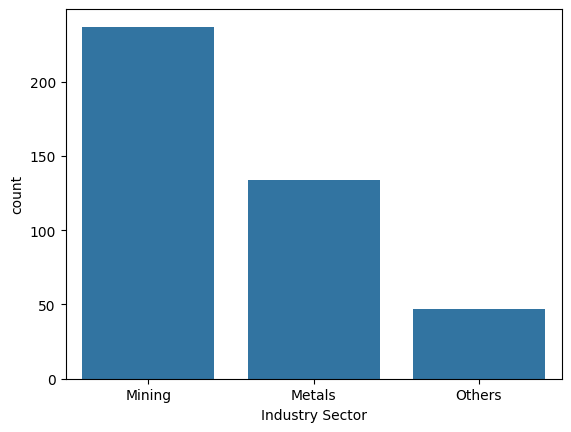

In [17]:
count_plot(data,"Industry Sector")

As per the countplot, Mining has the most number of count for accidents,
followed by Metals and others.

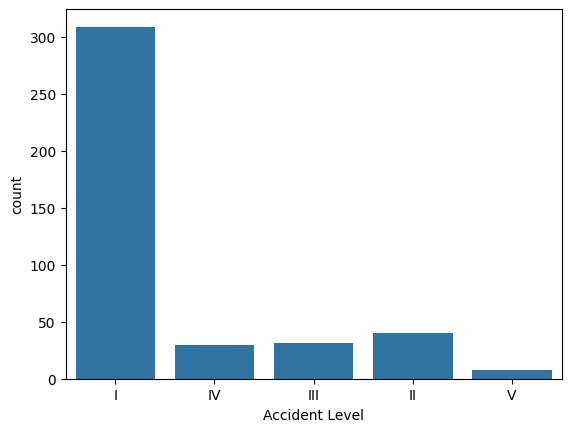

In [18]:
count_plot(data,"Accident Level")

As per the countplot, level I type of accident is the highest, followed by II, III, IV, V.

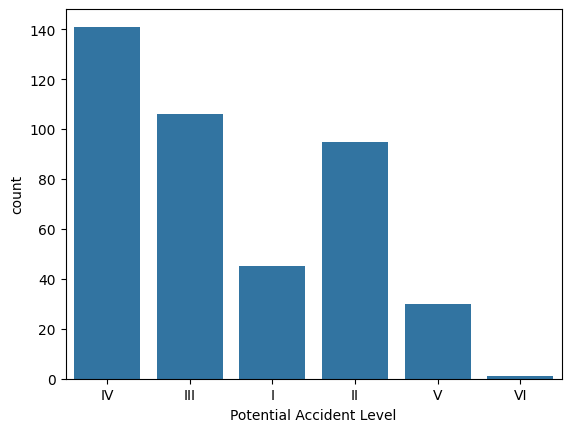

In [19]:
count_plot(data,"Potential Accident Level")

As per the countplot, level IV type of potential accident is the highest, followed by III, II, I, V, VI.

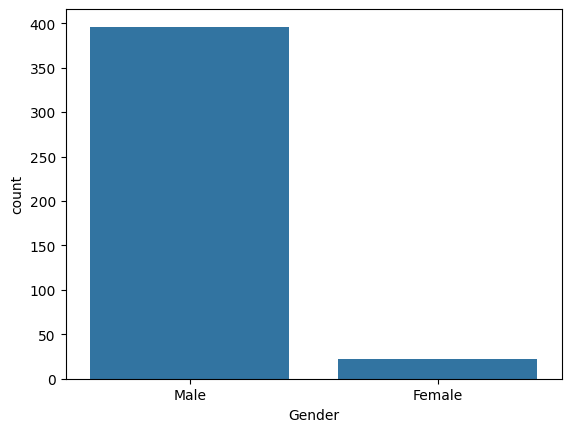

In [20]:
count_plot(data,"Gender")

As per the countplot, Gender type 'Male' was mostly involved in the accidental injuries followed by 'Female'.

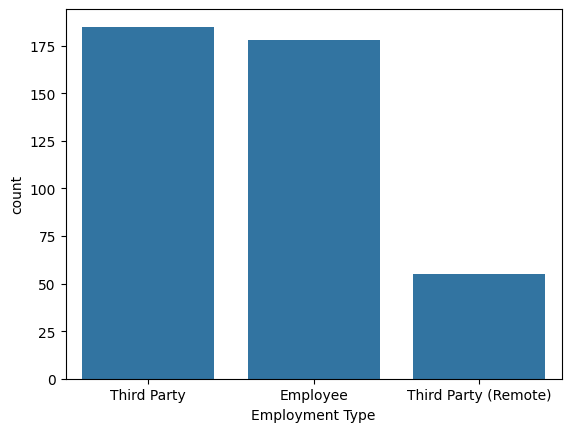

In [21]:
count_plot(data,"Employment Type")

As per the countplot, Employment type 'Third Party' was mostly involved in the accidental injuries followed by 'Employee' and 'Third Party(Remote)'.

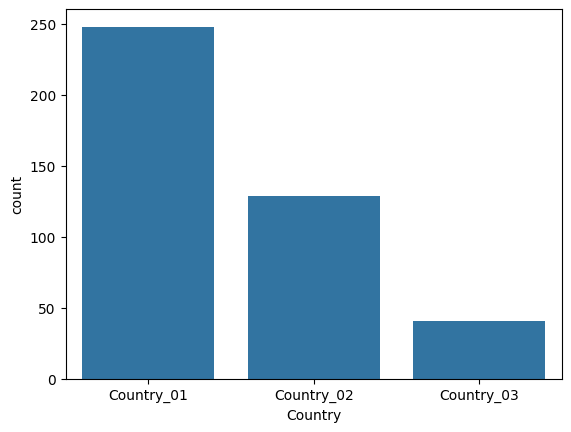

In [22]:
count_plot(data,"Country")

As per the countplot, Country type 'Country_01' was mostly involved in the accidental injuries followed by 'Country_02' and 'Country_03'.

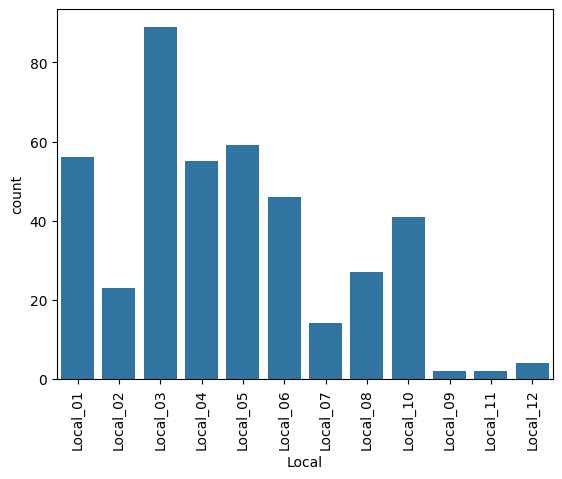

In [23]:
#sns.histplot(data = data, x = "Local")
count_plot(data,"Local")
plt.xticks(rotation=90)
plt.show()


As per the countplot, Local type 'Local_03' was mostly involved in the accidental injuries followed by 'Local_05' and 'Local_01' and others.

In [24]:
data["Description"].head(10)

0    While removing the drill rod of the Jumbo 08 f...
1    During the activation of a sodium sulphide pum...
2    In the sub-station MILPO located at level +170...
3    Being 9:45 am. approximately in the Nv. 1880 C...
4    Approximately at 11:45 a.m. in circumstances t...
5    During the unloading operation of the ustulado...
6    The collaborator reports that he was on street...
7    At approximately 04:50 p.m., when the mechanic...
8    Employee was sitting in the resting area at le...
9    At the moment the forklift operator went to ma...
Name: Description, dtype: object

#### Step 3: Data preprocessing

In [25]:
data['Year'] = data["Date of Occurance"].apply(lambda x : x.year)
data['Month'] = data["Date of Occurance"].apply(lambda x : x.month)
data['Day'] = data["Date of Occurance"].apply(lambda x : x.day)
data['Weekday'] = data["Date of Occurance"].apply(lambda x : x.day_name())
data['WeekofYear'] = data["Date of Occurance"].apply(lambda x : x.weekofyear)

data.head()

Date of Occurance     Country     Local Industry Sector Accident Level  \
0        2016-01-01  Country_01  Local_01          Mining              I   
1        2016-01-02  Country_02  Local_02          Mining              I   
2        2016-01-06  Country_01  Local_03          Mining              I   
3        2016-01-08  Country_01  Local_04          Mining              I   
4        2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender       Employment Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

In [26]:
find_unique_val_per_cols(data)

----------------------------------------
Unique values in "Date of Occurance" column are
----------------------------------------
<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-06 00:00:00',
 '2016-01-08 00:00:00', '2016-01-10 00:00:00', '2016-01-12 00:00:00',
 '2016-01-16 00:00:00', '2016-01-17 00:00:00', '2016-01-19 00:00:00',
 '2016-01-26 00:00:00',
 ...
 '2017-06-24 00:00:00', '2017-06-20 00:00:00', '2017-06-23 00:00:00',
 '2017-06-19 00:00:00', '2017-06-22 00:00:00', '2017-06-29 00:00:00',
 '2017-07-04 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00',
 '2017-07-09 00:00:00']
Length: 287, dtype: datetime64[ns]


----------------------------------------
Unique values in "Country" column are
----------------------------------------
['Country_01' 'Country_02' 'Country_03']


----------------------------------------
Unique values in "Local" column are
----------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_

In [27]:
data['Year'].unique()

array([2016, 2017])

#### Step 4: EDA Analysis

In [28]:
total_row_count = data.shape[0]

country_01_count = data[data.Country == 'Country_01'].shape[0]
country_02_count = data[data.Country == 'Country_02'].shape[0]
country_03_count = data[data.Country == 'Country_03'].shape[0]

country_01_count_pct = (country_01_count/total_row_count)*100
country_02_count_pct = (country_02_count/total_row_count)*100
country_03_count_pct = (country_03_count/total_row_count)*100

print(f'Country_01 count: {country_01_count} ({country_01_count_pct}%)')
print(f'Country_02 count: {country_02_count} ({country_02_count_pct}%)')
print(f'Country_03 count: {country_03_count} ({country_03_count_pct}%)')


Country_01 count: 248 (59.33014354066985%)
Country_02 count: 129 (30.861244019138756%)
Country_03 count: 41 (9.808612440191387%)


In [29]:
country_wise_val_count = data['Country'].value_counts()

Distributon of `Country` label
------------------------------------------------------------


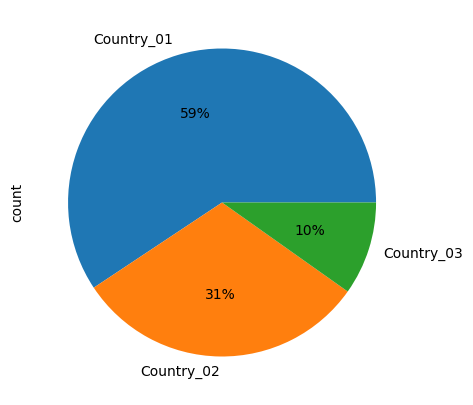

In [30]:
print('Distributon of `Country` label')
print('--'*30)
_ = country_wise_val_count.plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (8, 5))

As per the piechart it's clear that Country_01 has most number of count compared to Country_02 and Country_03.

In [31]:
local_count = np.round(data['Local'].value_counts(normalize=True) * 100)
local_df = local_count.to_frame(name='Types_of_Locals')

In [32]:
import plotly.express as px

px.bar(local_df).update_layout(title="Local Count", xaxis_title="Locals", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

As per the barplot 'Local_03' has most number of accidents compared to 'Local_05' and 'Local_01'

In [33]:
Mining_count = data[data['Industry Sector'] == 'Mining'].shape[0]
Metals_count = data[data['Industry Sector'] == 'Metals'].shape[0]
Others_count = data[data['Industry Sector'] == 'Others'].shape[0]

Mining_count_pct = (Mining_count/total_row_count)*100
Metals_count_pct = (Metals_count/total_row_count)*100
Others_count_pct = (Others_count/total_row_count)*100

print(f'Mining count: {Mining_count} ({Mining_count_pct}%)')
print(f'Metals count: {Metals_count} ({Metals_count_pct}%)')
print(f'Others count: {Others_count} ({Others_count_pct}%)')

print('--'*30)
print('Distributon of `Industry Sector` label')
print('--'*30)

sector_count = np.round(data['Industry Sector'].value_counts(normalize=True) * 100)

sector_df = sector_count.to_frame(name='Types_of_Sectors')


px.bar(sector_df).update_layout(title="Industry Sector Count", xaxis_title="Sectors", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

Mining count: 237 (56.698564593301434%)
Metals count: 134 (32.057416267942585%)
Others count: 47 (11.24401913875598%)
------------------------------------------------------------
Distributon of `Industry Sector` label
------------------------------------------------------------


As per the barplot, Mining has the most number of

----------------------------------------
Value Counts for `Accident Level` label
----------------------------------------
Accident Level - I count: 309 i.e. 74.0%
Accident Level - II count: 40 i.e. 10.0%
Accident Level - III count: 31 i.e. 7.0%
Accident Level - IV count: 30 i.e. 7.0%
Accident Level - V count: 8 i.e. 2.0%
Accident Level - VI count: 0 i.e. 0.0%
------------------------------------------------------------
Value Counts for `Potential Accident Level
--------------------------------------------------------------------------------
Potential Accident Level - I count: 45 i.e. 11.0%
Potential Accident Level - II count: 95 i.e. 23.0%
Potential Accident Level - III count: 106 i.e. 25.0%
Potential Accident Level - IV count: 141 i.e. 34.0%
Potential Accident Level - V count: 30 i.e. 7.0%
Potential Accident Level - VI count: 1 i.e. 0.0%
------------------------------------------------------------
Distributon of `Accident Level` & `Potential Accident Level` label
---------------------

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
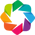

:Bars   [Severity,Levels]   (value)

In [34]:
print('--'*20)
print('Value Counts for `Accident Level` label')
print('--'*20)

accident_level_I_count = data[data['Accident Level'] == 'I'].shape[0]
accident_level_II_count = data[data['Accident Level'] == 'II'].shape[0]
accident_level_III_count = data[data['Accident Level'] == 'III'].shape[0]
accident_level_IV_count = data[data['Accident Level'] == 'IV'].shape[0]
accident_level_V_count = data[data['Accident Level'] == 'V'].shape[0]
accident_level_VI_count = data[data['Accident Level'] == 'VI'].shape[0]

print(f'Accident Level - I count: {accident_level_I_count} i.e. {round(accident_level_I_count/total_row_count*100, 0)}%')
print(f'Accident Level - II count: {accident_level_II_count} i.e. {round(accident_level_II_count/total_row_count*100, 0)}%')
print(f'Accident Level - III count: {accident_level_III_count} i.e. {round(accident_level_III_count/total_row_count*100, 0)}%')
print(f'Accident Level - IV count: {accident_level_IV_count} i.e. {round(accident_level_IV_count/total_row_count*100, 0)}%')
print(f'Accident Level - V count: {accident_level_V_count} i.e. {round(accident_level_V_count/total_row_count*100, 0)}%')
print(f'Accident Level - VI count: {accident_level_VI_count} i.e. {round(accident_level_VI_count/total_row_count*100, 0)}%')

print('--'*30); print('Value Counts for `Potential Accident Level'); print('--'*40)

potential_accident_level_I_count = data[data['Potential Accident Level'] == 'I'].shape[0]
potential_accident_level_II_count = data[data['Potential Accident Level'] == 'II'].shape[0]
potential_accident_level_III_count = data[data['Potential Accident Level'] == 'III'].shape[0]
potential_accident_level_IV_count = data[data['Potential Accident Level'] == 'IV'].shape[0]
potential_accident_level_V_count = data[data['Potential Accident Level'] == 'V'].shape[0]
potential_accident_level_VI_count = data[data['Potential Accident Level'] == 'VI'].shape[0]

print(f'Potential Accident Level - I count: {potential_accident_level_I_count} i.e. {round(potential_accident_level_I_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - II count: {potential_accident_level_II_count} i.e. {round(potential_accident_level_II_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - III count: {potential_accident_level_III_count} i.e. {round(potential_accident_level_III_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - IV count: {potential_accident_level_IV_count} i.e. {round(potential_accident_level_IV_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - V count: {potential_accident_level_V_count} i.e. {round(potential_accident_level_V_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - VI count: {potential_accident_level_VI_count} i.e. {round(potential_accident_level_VI_count/total_row_count*100, 0)}%')

print('--'*30); print('Distributon of `Accident Level` & `Potential Accident Level` label'); print('--'*40)

accident_level_count = np.round(data['Accident Level'].value_counts(normalize=True) * 100)
potential_accident_level_count = np.round(data['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
acc_df = accident_level_count.to_frame(name='Accident')
pot_df = potential_accident_level_count.to_frame(name='Potential')
ac_pot = pd.concat([acc_df, pot_df], axis=1,sort=False).fillna(0)
ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})

import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

hv.Bars(ac_pot, ['Severity', 'Levels'], 'value').opts(opts.Bars(color='red',title="Accident Levels Count", width=700, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=45, ylabel="Percentage", yformatter='%d%%'))


This comparative bar chart is depicting that most 'Accident' which have occured is of type I followed by type II and type III and others. Whereas, 'Potential Accident' could be highest at type IV followed by type III and type II.

In [35]:
Male_count = data[data['Gender'] == 'Male'].shape[0]
Female_count = data[data['Gender'] == 'Female'].shape[0]

Male_count_pct = (Male_count/total_row_count)*100
Female_count_pct = (Female_count/total_row_count)*100

print(f'Male count: {Male_count} i.e., ({Male_count_pct}%)')
print(f'Female count: {Female_count} i.e., ({Female_count_pct}%)')

gender_count = np.round(data['Gender'].value_counts(normalize=True) * 100)
gender_df = gender_count.to_frame(name='Male&FemalePct%')


px.bar(gender_df).update_layout(title="Gender Count", xaxis_title="Gender", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

Male count: 396 i.e., (94.73684210526315%)
Female count: 22 i.e., (5.263157894736842%)


In [36]:
third_party_count = data[data['Employment Type'] == 'Third Party'].shape[0]
employee_count = data[data['Employment Type'] == 'Employee'].shape[0]
third_remote_count = data[data['Employment Type'] == 'Third Party (Remote)'].shape[0]

third_party_count_pct = (third_party_count/total_row_count)*100
employee_count_pct = (employee_count/total_row_count)*100
third_remote_count_pct = (third_remote_count/total_row_count)*100

print(f'Third Party count: {third_party_count} i.e. {third_party_count_pct}%')
print(f'Employee count: {employee_count} i.e. {employee_count_pct}%')
print(f'Third Party (Remote) count: {third_remote_count} i.e. {third_remote_count_pct}%')

print('--'*30)
print('Distributon of `Employee type` label')
print('--'*30)

employee_type_count = np.round(data['Employment Type'].value_counts(normalize=True) * 100)
employee_type_df = employee_type_count.to_frame(name='Types_of_Employees')

px.bar(employee_type_df).update_layout(title="Employee Type Count", xaxis_title="Employee Type", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')


Third Party count: 185 i.e. 44.25837320574163%
Employee count: 178 i.e. 42.58373205741627%
Third Party (Remote) count: 55 i.e. 13.157894736842104%
------------------------------------------------------------
Distributon of `Employee type` label
------------------------------------------------------------


In [37]:
critical_risk_count = np.round(data['Critical Risk'].value_counts(normalize=True) * 100)
critical_risk_df = critical_risk_count.to_frame(name='Types_of_Risk')


px.bar(critical_risk_df[::-1]).update_layout(title="Critical Risk Count", xaxis_title="Critical Risks", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

From this plot, it is clear that barplot has maximum number of accidents as 'Others' followed by 'Pressed', 'Manual Tools' and others.

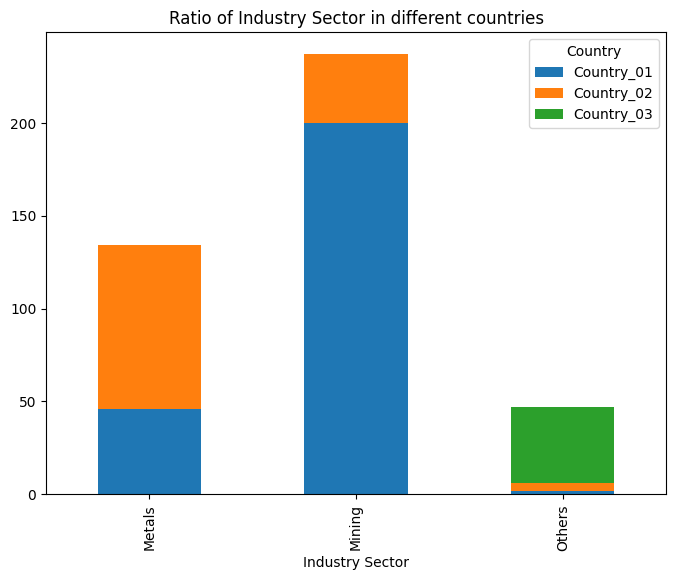

In [38]:
industry_sec_country_table = pd.crosstab(index = data['Industry Sector'], columns = data['Country'])
industry_sec_country_table.plot(kind = 'bar', figsize=(8,6), stacked = True)
plt.title("Ratio of Industry Sector in different countries")
plt.show()

###### Accidental injuries in 'Country_02' is the highest, then followed by 'Country_01' in Metals sector.
###### Accidental injuries in 'Country_01' is the highest, then followed by 'Country_02' in Mining sector.
###### Accidental injuries in 'Country_03' is the highest, then followed by 'Others' in Industry sector.

In [39]:
data_corr = data[['Year','Month','Day','WeekofYear']].copy()
data_corr.corr()

Year     Month       Day  WeekofYear
Year        1.000000 -0.416621 -0.001982   -0.418798
Month      -0.416621  1.000000  0.002133    0.964295
Day        -0.001982  0.002133  1.000000    0.060982
WeekofYear -0.418798  0.964295  0.060982    1.000000

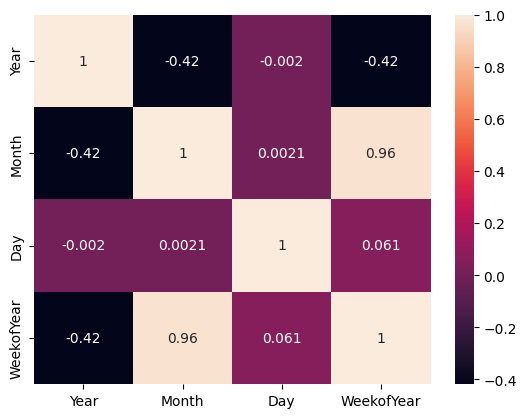

In [40]:
sns.heatmap(data_corr.corr(), annot=True);

'Day' and 'WeekofYear' has high positive correlation.

In [41]:
data.head()

Date of Occurance     Country     Local Industry Sector Accident Level  \
0        2016-01-01  Country_01  Local_01          Mining              I   
1        2016-01-02  Country_02  Local_02          Mining              I   
2        2016-01-06  Country_01  Local_03          Mining              I   
3        2016-01-08  Country_01  Local_04          Mining              I   
4        2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender       Employment Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

#### Step 5: NLP Pre-processing

In [42]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [43]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from tqdm import tqdm


from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
import random, re

In [45]:
from nltk.stem import WordNetLemmatizer

In [46]:
import spacy

In [47]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.9 MB/s eta 0:00:00


In [48]:
import contractions

In [49]:
def replace_words(text):
  text = text.split()
  new_text = []
  for word in text:
    if word in contractions.contractions_dict:
      new_text.append(contractions.fix(word))
    else:
      new_text.append(word)
  return " ".join(new_text)

In [50]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [51]:
def imp_lemmatize(text):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(text)
  lemmatized_tokens = [token.lemma_ for token in doc]
  return " ".join(lemmatized_tokens)


In [52]:
def remove_stopwords(text):
    new_text = []
    if text is not None:
       for word in text.split():
        if word in stop_words:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [53]:
def remove_whitespace(text):
      if text is not None:
        return " ".join(text.split())

In [54]:
def imp_stemming(text):
  from nltk.stem import PorterStemmer
  stemmer = PorterStemmer()
  return " ".join([stemmer.stem(word) for word in text.split()])


In [55]:
print('--'*30)
print('Converting description to lower case')
data['NLP_Preprocessed_Description'] = data['Description'].apply(lambda x : x.lower())
print('--'*30)
print('Replacing apostrophes to the standard lexicons')
data['NLP_Preprocessed_Description'] = data['NLP_Preprocessed_Description'].apply(lambda x : replace_words(x))
print('--'*30)
print('Removing punctuations')
data['NLP_Preprocessed_Description'] = data['NLP_Preprocessed_Description'].apply(lambda x: remove_punctuation(x))
print('--'*30)
print('Implementing Lemmatizer')
data['NLP_Preprocessed_Description'] = data['NLP_Preprocessed_Description'].apply(lambda x: imp_lemmatize(x))
print('--'*30)
print('Implementing Stemming')
data['NLP_Stemmed_Description'] = data['NLP_Preprocessed_Description'].apply(lambda x: imp_stemming(x))
print('--'*30)
#print('Removing multiple white-spaces between words')
#data['NLP_Preprocessed_Description'] = data['NLP_Preprocessed_Description'].apply(lambda x: remove_whitespace(x))
print('Removing multiple spaces between words')
data['NLP_Preprocessed_Description'] = data['NLP_Preprocessed_Description'].apply(lambda x: re.sub(r"\s\s+", " ", x))
print('--'*30)
print('Removing stop words')
data['NLP_Preprocessed_Description'] = data['NLP_Preprocessed_Description'].apply(lambda x: remove_stopwords(x))
print('--'*30)


------------------------------------------------------------
Converting description to lower case
------------------------------------------------------------
Replacing apostrophes to the standard lexicons
------------------------------------------------------------
Removing punctuations
------------------------------------------------------------
Implementing Lemmatizer
------------------------------------------------------------
Implementing Stemming
------------------------------------------------------------
Removing multiple spaces between words
------------------------------------------------------------
Removing stop words
------------------------------------------------------------


In [56]:
data['NLP_Stemmed_Description'] = data['NLP_Stemmed_Description'].apply(lambda x: remove_stopwords(x))

In [57]:
data['NLP_Stemmed_Description'] = data['NLP_Stemmed_Description'].apply(lambda x: re.sub("\s{2,}", " ", x))

In [58]:
data['NLP_Preprocessed_Description'] = data['NLP_Preprocessed_Description'].apply(lambda x: re.sub("\s{2,}", " ", x))

In [59]:
data.loc[0:5, ['NLP_Preprocessed_Description', 'NLP_Stemmed_Description']]

NLP_Preprocessed_Description  \
0   remove drill rod jumbo 08 maintenance supervi...   
1   activation sodium sulphide pump piping uncoup...   
2   substation milpo locate level 170 collaborato...   
3   945 approximately nv 1880 cx695 ob7 personnel...   
4  approximately 1145 circumstance mechanic antho...   
5   unloading operation ustulado bag need unclog ...   

                             NLP_Stemmed_Description  
0   remov drill rod jumbo 08 mainten supervisor p...  
1  dure activ sodium sulphid pump pipe uncoupl su...  
2   substat milpo locat level 170 collabor excav ...  
3   945 approxim nv 1880 cx695 ob7 personnel begi...  
4  approxim 1145 circumst mechan anthoni group le...  
5  dure unload oper ustulado bag need unclog disc...

In [60]:
data.head()

Date of Occurance     Country     Local Industry Sector Accident Level  \
0        2016-01-01  Country_01  Local_01          Mining              I   
1        2016-01-02  Country_02  Local_02          Mining              I   
2        2016-01-06  Country_01  Local_03          Mining              I   
3        2016-01-08  Country_01  Local_04          Mining              I   
4        2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender       Employment Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear                       NLP_Preprocessed_Description  \
0     Friday          53   remove drill rod jumbo 08 maintenance supervi...   
1   Saturday          53   activation sodium sulphide pump piping uncoup...   
2  Wednesday           1   substation milpo locate level 170 collaborato...   
3     Friday           1   945 approximately nv 1880 cx695 ob7 personnel...   
4     Sunday           1  approximately 1145 circumstance mechanic antho...   

                             NLP_Stemmed_Description  
0   remov drill rod jumbo 08 mainten supervisor p...  
1  dure activ sodium sulphid pump pipe uncoupl su...  
2   substat milpo locat level 170 collabor excav ...  
3   945 approxim nv 1880 cx695 ob7 personnel begi...  
4  approxim 1145 circumst mechan anthoni group le...

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 424
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date of Occurance             418 non-null    datetime64[ns]
 1   Country                       418 non-null    object        
 2   Local                         418 non-null    object        
 3   Industry Sector               418 non-null    object        
 4   Accident Level                418 non-null    object        
 5   Potential Accident Level      418 non-null    object        
 6   Gender                        418 non-null    object        
 7   Employment Type               418 non-null    object        
 8   Critical Risk                 418 non-null    object        
 9   Description                   418 non-null    object        
 10  Year                          418 non-null    int64         
 11  Month                         418 non

In [62]:
print('--'*30)
print('Get the number of words, find the maximum number of words and print the maximum number of words')
print('Number of words ranges from 10 to 98.')
print('--'*30)

data['num_words'] = data['NLP_Preprocessed_Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['num_words'].min()))
print('Maximum number of words: {}'.format(data['num_words'].max()))
print('Line with maximum number of words: {}'.format(data[data['num_words'] == data['num_words'].max()]['NLP_Preprocessed_Description'].values[0]))

------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 10 to 98.
------------------------------------------------------------
Minimum number of words: 10
Maximum number of words: 98
Line with maximum number of words:  perform sleeve removal maneuver hole 600 meter deep general da silva press one side lock nut rod together jack hold entire weight rod maneuver lock procedure effective weight rod secure steel wire rope probe winch moment driller pedro release brake winch inefficacy locking one side chestnut without aid monkey cause sliding rod auxiliary prepare manual unlocking rod hold faucet key firmly probe tower composition shift stem slide hand shift downward cause left hand strike base probe tower structure cause cut 4th 5th quirodactyl employee take hospital go medical care wound suture 16 stitch remove 10 day activity


In [63]:
print('--'*30)
print('Get the number of words, find the maximum number of words and print the maximum number of words')
print('Number of words ranges from 11 to 104.')
print('--'*30)

data['num_words_stem'] = data['NLP_Stemmed_Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['num_words_stem'].min()))
print('Maximum number of words: {}'.format(data['num_words_stem'].max()))
print('Line with maximum number of words: {}'.format(data[data['num_words_stem'] == data['num_words_stem'].max()]['NLP_Stemmed_Description'].values[0]))

------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 11 to 104.
------------------------------------------------------------
Minimum number of words: 11
Maximum number of words: 104
Line with maximum number of words:  perform sleev remov maneuv hole 600 meter deep gener da silva press onli one side lock nut rod togeth jack hold entir weight rod maneuv lock procedur effect weight rod onli secur steel wire rope probe winch moment driller pedro releas brake winch inefficaci lock onli one side chestnut without aid monkey caus slide rod auxiliari prepar manual unlock rod hold faucet key firmli probe tower composit shift stem slide hi hand shift downward caus hi left hand strike base probe tower structur caus cut 4th 5th quirodactyl employe take hospit go medic care wound sutur 16 stitch remov 10 day hi activ


In [64]:
data.loc[0:5, ['num_words', 'num_words_stem']]

num_words  num_words_stem
0         39              42
1         29              29
2         31              31
3         52              52
4         48              48
5         27              28

In [65]:
data.head(1)

Date of Occurance     Country     Local Industry Sector Accident Level  \
0        2016-01-01  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employment Type Critical Risk  \
0                       IV   Male     Third Party       Pressed   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   

  Weekday  WeekofYear                       NLP_Preprocessed_Description  \
0  Friday          53   remove drill rod jumbo 08 maintenance supervi...   

                             NLP_Stemmed_Description  num_words  \
0   remov drill rod jumbo 08 mainten supervisor p...         39   

   num_words_stem  
0              42

In [66]:
data = data.drop(['NLP_Stemmed_Description', 'num_words_stem'], axis=1)

In [67]:
data.head(1)

Date of Occurance     Country     Local Industry Sector Accident Level  \
0        2016-01-01  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employment Type Critical Risk  \
0                       IV   Male     Third Party       Pressed   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   

  Weekday  WeekofYear                       NLP_Preprocessed_Description  \
0  Friday          53   remove drill rod jumbo 08 maintenance supervi...   

   num_words  
0         39

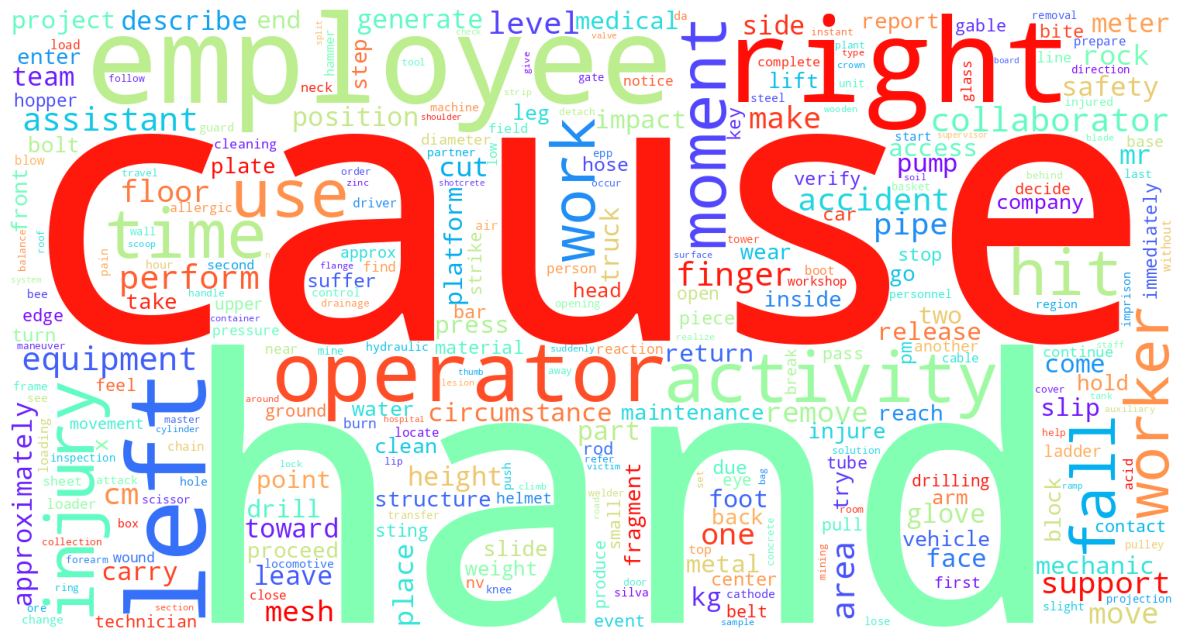

In [68]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='white', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(data['NLP_Preprocessed_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [69]:
print('--'*30)
print('Five point summary for number of words')
display(data['num_words'].describe().round(0).astype(int))

print('99% quantilie: {}'.format(data['num_words'].quantile(0.99)))
print('--'*30)

------------------------------------------------------------
Five point summary for number of words


count    418
mean      35
std       17
min       10
25%       22
50%       33
75%       45
max       98
Name: num_words, dtype: int64

99% quantilie: 84.65999999999997
------------------------------------------------------------


Numerical Vector conversion - Glove Word Embeddings




In [70]:
embeddings_index = {}
embedding_file = '/content/drive/My Drive/AIML/Capstone/glove.6B.200d.txt'
f = open(embedding_file)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:24, 16332.61it/s]

Found 400000 word vectors.


In [71]:
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [72]:
import nltk
nltk.download('punkt_tab')
ind_glove_df = [sent2vec(x) for x in tqdm(data['NLP_Preprocessed_Description'])]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
100%|██████████| 418/418 [00:00<00:00, 2455.34it/s]


In [73]:
ind_glove_df[0]

array([ 1.08487615e-02,  1.06118418e-01,  4.73346969e-04, -4.94335294e-02,
        1.47543782e-02,  5.37704155e-02, -1.03866242e-01, -3.63657884e-02,
       -4.34468947e-02,  5.22227660e-02, -5.53123793e-03,  1.56564172e-02,
        1.04888819e-01, -3.31042195e-03,  9.03587714e-02, -3.03397812e-02,
       -4.15456332e-02, -2.61472501e-02,  7.32292756e-02, -1.51423197e-02,
       -3.57751623e-02,  6.12410307e-01,  7.39615858e-02,  1.06792767e-02,
        4.52736095e-02,  5.58275208e-02, -3.20271924e-02,  2.05762591e-02,
       -2.86698304e-02, -5.96111268e-02,  3.98746245e-02, -5.45726977e-02,
        1.24686575e-02, -2.31735855e-02,  1.69898085e-02, -1.72713920e-02,
       -8.55427608e-02, -6.89015687e-02, -6.43945336e-02,  3.30707692e-02,
        7.60044083e-02,  2.69752685e-02,  8.07287171e-03,  7.41695017e-02,
        3.22605036e-02,  6.69533163e-02,  5.22008166e-02,  1.27492240e-04,
        4.65123504e-02,  6.58635646e-02,  5.24897315e-02,  1.06448112e-02,
       -7.22783878e-02, -

Numerical Vector conversion - Word2Vec Embeddings

In [74]:
from gensim.models import Word2Vec

In [75]:
def w2v(sentences):
    model = Word2Vec(sentences, min_count=1)
    return model


In [76]:
sentences = data['NLP_Preprocessed_Description']

model = w2v(sentences)

print(model)

words = list(model.wv.index_to_key)
print(words)

model.save('model.bin')

new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=49, vector_size=100, alpha=0.025>
[' ', 'e', 'r', 'a', 't', 'o', 'i', 'n', 'l', 'c', 's', 'p', 'm', 'u', 'd', 'h', 'g', 'f', 'y', 'b', 'v', 'k', 'w', '0', '1', 'x', 'j', '2', '5', '4', '3', 'q', '8', '7', '6', 'z', '9', '\u200b', '°', 'á', 'I', 'é', 'ã', 'â', 'ó', 'í', 'ô', 'ú', '¼']
Word2Vec<vocab=49, vector_size=100, alpha=0.025>


Numerical Vector conversion - TFIDF Features

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(data['NLP_Preprocessed_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names_out()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

In [79]:
ind_tfidf_df.head()

TFIDF_activity  TFIDF_cause  TFIDF_employee  TFIDF_hand  TFIDF_injury  \
0             0.0     0.000000             0.0    1.000000      0.000000   
1             0.0     0.000000             0.0    0.000000      0.000000   
2             0.0     0.438111             0.0    0.486826      0.546256   
3             0.0     0.334934             0.0    0.744353      0.417611   
4             0.0     0.511998             0.0    0.000000      0.638381   

   TFIDF_left  TFIDF_operator  TFIDF_right  TFIDF_time  TFIDF_use  ...  \
0    0.000000             0.0     0.000000         0.0        0.0  ...   
1    0.000000             0.0     0.000000         0.0        1.0  ...   
2    0.522172             0.0     0.000000         0.0        0.0  ...   
3    0.399199             0.0     0.000000         0.0        0.0  ...   
4    0.000000             0.0     0.574741         0.0        0.0  ...   

   TFIDF_accident employee use  TFIDF_cause injury time  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     0.0                      0.0   
4                     0.0                      0.0   

   TFIDF_generate injury time  TFIDF_hand cause injury  \
0                         0.0                 0.000000   
1                         0.0                 0.000000   
2                         0.0                 0.000000   
3                         0.0                 0.680994   
4                         0.0                 0.000000   

   TFIDF_injury time accident  TFIDF_left hand cause  TFIDF_right hand cause  \
0                         0.0               0.000000                     0.0   
1                         0.0               0.000000                     0.0   
2                         0.0               0.000000                     0.0   
3                         0.0               0.732289                     0.0   
4                         0.0               0.000000                     0.0   

   TFIDF_time accident employee  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  

[5 rows x 30 columns]

Numerical Vector conversion - FastText

In [80]:
from gensim.models import FastText
from gensim.test.utils import common_texts

In [81]:
def ft(sentences):
    model = FastText(sentences, min_count=1)
    return model

In [82]:
corpus = data['NLP_Preprocessed_Description']

model = ft(corpus)

#print(model)

#words = list(model.wv.index_to_key)
#print(words)

word_embedding = model.wv['activation']

similar_words = model.wv.most_similar('activation')

print("Most similar words to 'activation':", similar_words)

Most similar words to 'activation': [('¼', 0.0965999886393547), ('5', 0.0876171663403511), ('2', 0.08749371021986008), ('0', 0.0867205262184143), ('4', 0.08520285785198212), ('1', 0.08507933467626572), ('3', 0.0835423395037651), ('8', 0.08295014500617981), ('9', 0.08120720833539963), ('x', 0.0808107927441597)]


In [83]:
print(model)

words = list(model.wv.index_to_key)
print(words)

FastText<vocab=49, vector_size=100, alpha=0.025>
[' ', 'e', 'r', 'a', 't', 'o', 'i', 'n', 'l', 'c', 's', 'p', 'm', 'u', 'd', 'h', 'g', 'f', 'y', 'b', 'v', 'k', 'w', '0', '1', 'x', 'j', '2', '5', '4', '3', 'q', '8', '7', '6', 'z', '9', '\u200b', '°', 'á', 'I', 'é', 'ã', 'â', 'ó', 'í', 'ô', 'ú', '¼']


#### Step 6: Feature Engineering

Label Encoding

In [84]:
data['Employment Type'].unique()

array(['Third Party', 'Employee', 'Third Party (Remote)'], dtype=object)

In [85]:
data['Employment Type'] = data['Employment Type'].str.replace(' ', '_')
data['Employment Type'].value_counts()

Employment Type
Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: count, dtype: int64

In [86]:
data['Critical Risk'] = data['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
data['Critical Risk'].value_counts().head()

Critical Risk
Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: count, dtype: int64

In [87]:
data.head()

Date of Occurance     Country     Local Industry Sector Accident Level  \
0        2016-01-01  Country_01  Local_01          Mining              I   
1        2016-01-02  Country_02  Local_02          Mining              I   
2        2016-01-06  Country_01  Local_03          Mining              I   
3        2016-01-08  Country_01  Local_04          Mining              I   
4        2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender       Employment Type        Critical Risk  \
0                       IV   Male           Third_Party              Pressed   
1                       IV   Male              Employee  Pressurized_Systems   
2                      III   Male  Third_Party_(Remote)         Manual_Tools   
3                        I   Male           Third_Party               Others   
4                       IV   Male           Third_Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear                       NLP_Preprocessed_Description  \
0     Friday          53   remove drill rod jumbo 08 maintenance supervi...   
1   Saturday          53   activation sodium sulphide pump piping uncoup...   
2  Wednesday           1   substation milpo locate level 170 collaborato...   
3     Friday           1   945 approximately nv 1880 cx695 ob7 personnel...   
4     Sunday           1  approximately 1145 circumstance mechanic antho...   

   num_words  
0         39  
1         29  
2         31  
3         52  
4         48

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

In [89]:
# Create Industry DataFrame
industry_feature_encod_df = pd.DataFrame()

data['Weekday'] = data['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
industry_feature_encod_df['Weekday'] = LabelEncoder().fit_transform(data['Weekday']).astype(np.int8)

industry_feature_encod_df['Accident Level'] = LabelEncoder().fit_transform(data['Accident Level']).astype(np.int8)
industry_feature_encod_df['Potential Accident Level'] = LabelEncoder().fit_transform(data['Potential Accident Level']).astype(np.int8)


In [90]:
from tensorflow.python.keras.utils import np_utils
dmy_y = np_utils.to_categorical(industry_feature_encod_df['Accident Level'])
dmy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [91]:
industry_feature_encod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Weekday                   418 non-null    int8 
 1   Accident Level            418 non-null    int8 
 2   Potential Accident Level  418 non-null    int8 
dtypes: int8(3)
memory usage: 1.3 KB


In [92]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=d833f0bba8308f96afd7b8b753619fb4afd0e8718aac736361314fffea59a701
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [93]:
data.head(1)

Date of Occurance     Country     Local Industry Sector Accident Level  \
0        2016-01-01  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employment Type Critical Risk  \
0                       IV   Male     Third_Party       Pressed   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   

   Weekday  WeekofYear                       NLP_Preprocessed_Description  \
0  eFriday          53   remove drill rod jumbo 08 maintenance supervi...   

   num_words  
0         39

In [94]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(data['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(data['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(data['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(data['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(data['Employment Type'], columns=['Employment Type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(data['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
industry_feature_encod_df = industry_feature_encod_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

industry_feature_encod_df.head()



Weekday  Accident Level  Potential Accident Level  Country_02  Country_03  \
0        4               0                         3       False       False   
1        5               0                         3        True       False   
2        2               0                         2       False       False   
3        4               0                         0       False       False   
4        6               3                         3       False       False   

   Local_02  Local_03  Local_04  Local_05  Local_06  ...  CR_Projection  \
0     False     False     False     False     False  ...          False   
1      True     False     False     False     False  ...          False   
2     False      True     False     False     False  ...          False   
3     False     False      True     False     False  ...          False   
4     False     False      True     False     False  ...          False   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                  False                False                       False   
1                  False                False                       False   
2                  False                False                       False   
3                  False                False                       False   
4                  False                False                       False   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                       False               False       False   
1                       False               False       False   
2                       False               False       False   
3                       False               False       False   
4                       False               False       False   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                             False                False                False  
1                             False                False                False  
2                             False                False                False  
3                             False                False                False  
4                             False                False                False  

[5 rows x 53 columns]

In [95]:
industry_feature_encod_df = industry_feature_encod_df.drop(['Weekday', 'Accident Level', 'Potential Accident Level'], axis=1)

In [96]:
industry_feature_encod_df.head()

Country_02  Country_03  Local_02  Local_03  Local_04  Local_05  Local_06  \
0       False       False     False     False     False     False     False   
1        True       False      True     False     False     False     False   
2       False       False     False      True     False     False     False   
3       False       False     False     False      True     False     False   
4       False       False     False     False      True     False     False   

   Local_07  Local_08  Local_09  ...  CR_Projection  CR_Projection/Burning  \
0     False     False     False  ...          False                  False   
1     False     False     False  ...          False                  False   
2     False     False     False  ...          False                  False   
3     False     False     False  ...          False                  False   
4     False     False     False  ...          False                  False   

   CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                False                       False   
1                False                       False   
2                False                       False   
3                False                       False   
4                False                       False   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                       False               False       False   
1                       False               False       False   
2                       False               False       False   
3                       False               False       False   
4                       False               False       False   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                             False                False                False  
1                             False                False                False  
2                             False                False                False  
3                             False                False                False  
4                             False                False                False  

[5 rows x 50 columns]

In [97]:
industry_feature_encod_df = industry_feature_encod_df.apply(lambda x: x.apply(lambda y: 1 if y else 0))

In [98]:
# Label encoding
industry_feature_encod_df = data[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(industry_feature_encod_df.reset_index(drop=True))

In [99]:
industry_feature_encod_df.head()

Year  Month  Day  WeekofYear  Country_02  Country_03  Local_02  Local_03  \
0  2016      1    1          53           0           0         0         0   
1  2016      1    2          53           1           0         1         0   
2  2016      1    6           1           0           0         0         1   
3  2016      1    8           1           0           0         0         0   
4  2016      1   10           1           0           0         0         0   

   Local_04  Local_05  ...  CR_Projection  CR_Projection/Burning  \
0         0         0  ...              0                      0   
1         0         0  ...              0                      0   
2         0         0  ...              0                      0   
3         1         0  ...              0                      0   
4         1         0  ...              0                      0   

   CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                    0                           0   
1                    0                           0   
2                    0                           0   
3                    0                           0   
4                    0                           0   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                           0                   0           0   
1                           0                   0           0   
2                           0                   0           0   
3                           0                   0           0   
4                           0                   0           0   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                                 0                    0                    0  
1                                 0                    0                    0  
2                                 0                    0                    0  
3                                 0                    0                    0  
4                                 0                    0                    0  

[5 rows x 54 columns]

In [100]:
#industry_feature_encod_df['Weekday'] = LabelEncoder().fit_transform(data['Weekday']).astype(np.int8)
industry_feature_encod_df.insert(0, 'Weekday', LabelEncoder().fit_transform(data['Weekday']).astype(np.int8))
industry_feature_encod_df.insert(1, 'Accident Level', LabelEncoder().fit_transform(data['Accident Level']).astype(np.int8))
industry_feature_encod_df.insert(2, 'Potential Accident Level', LabelEncoder().fit_transform(data['Potential Accident Level']).astype(np.int8))

#industry_feature_encod_df['Accident Level'] = LabelEncoder().fit_transform(data['Accident Level']).astype(np.int8)
#industry_feature_encod_df['Potential Accident Level'] = LabelEncoder().fit_transform(data['Potential Accident Level']).astype(np.int8)

In [101]:
industry_feature_encod_df.head()

Weekday  Accident Level  Potential Accident Level  Year  Month  Day  \
0        4               0                         3  2016      1    1   
1        5               0                         3  2016      1    2   
2        2               0                         2  2016      1    6   
3        4               0                         0  2016      1    8   
4        6               3                         3  2016      1   10   

   WeekofYear  Country_02  Country_03  Local_02  ...  CR_Projection  \
0          53           0           0         0  ...              0   
1          53           1           0         1  ...              0   
2           1           0           0         0  ...              0   
3           1           0           0         0  ...              0   
4           1           0           0         0  ...              0   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                      0                    0                           0   
1                      0                    0                           0   
2                      0                    0                           0   
3                      0                    0                           0   
4                      0                    0                           0   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                           0                   0           0   
1                           0                   0           0   
2                           0                   0           0   
3                           0                   0           0   
4                           0                   0           0   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                                 0                    0                    0  
1                                 0                    0                    0  
2                                 0                    0                    0  
3                                 0                    0                    0  
4                                 0                    0                    0  

[5 rows x 57 columns]

In [102]:
np.any(np.isnan(industry_feature_encod_df))

False

In [103]:
industry_feature_df = industry_feature_encod_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))

In [104]:
industry_feature_df.head()

Weekday  Accident Level  Potential Accident Level  Year  Month  Day  \
0        4               0                         3  2016      1    1   
1        5               0                         3  2016      1    2   
2        2               0                         2  2016      1    6   
3        4               0                         0  2016      1    8   
4        6               3                         3  2016      1   10   

   WeekofYear  Country_02  Country_03  Local_02  ...        20        21  \
0          53           0           0         0  ... -0.035775  0.612410   
1          53           1           0         1  ... -0.115222  0.568339   
2           1           0           0         0  ... -0.006106  0.576659   
3           1           0           0         0  ...  0.003002  0.584850   
4           1           0           0         0  ...  0.026440  0.602891   

         22        23        24        25        26        27        28  \
0  0.073962  0.010679  0.045274  0.055828 -0.032027  0.020576 -0.028670   
1 -0.061734 -0.075676  0.133199 -0.103053 -0.068707  0.013540  0.011536   
2  0.042123 -0.011710  0.048437 -0.000289 -0.007488 -0.004909 -0.073158   
3  0.040569 -0.044020  0.026559  0.037091  0.007268 -0.008357 -0.116423   
4  0.032175 -0.037830  0.023722 -0.001859  0.026882  0.045352 -0.073881   

         29  
0 -0.059611  
1  0.039988  
2 -0.063621  
3 -0.006853  
4 -0.004644  

[5 rows x 87 columns]

In [105]:
industry_feature_df = industry_feature_encod_df.join(ind_tfidf_df.reset_index(drop=True))

In [106]:
industry_feature_df.head()

Weekday  Accident Level  Potential Accident Level  Year  Month  Day  \
0        4               0                         3  2016      1    1   
1        5               0                         3  2016      1    2   
2        2               0                         2  2016      1    6   
3        4               0                         0  2016      1    8   
4        6               3                         3  2016      1   10   

   WeekofYear  Country_02  Country_03  Local_02  ...  \
0          53           0           0         0  ...   
1          53           1           0         1  ...   
2           1           0           0         0  ...   
3           1           0           0         0  ...   
4           1           0           0         0  ...   

   TFIDF_accident employee use  TFIDF_cause injury time  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     0.0                      0.0   
4                     0.0                      0.0   

   TFIDF_generate injury time  TFIDF_hand cause injury  \
0                         0.0                 0.000000   
1                         0.0                 0.000000   
2                         0.0                 0.000000   
3                         0.0                 0.680994   
4                         0.0                 0.000000   

   TFIDF_injury time accident  TFIDF_left hand cause  TFIDF_right hand cause  \
0                         0.0               0.000000                     0.0   
1                         0.0               0.000000                     0.0   
2                         0.0               0.000000                     0.0   
3                         0.0               0.732289                     0.0   
4                         0.0               0.000000                     0.0   

   TFIDF_time accident employee  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  

[5 rows x 87 columns]

In [107]:
# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore

from scipy.stats import randint as sp_randint

# save models
import pickle

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




In [108]:
X = industry_feature_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = industry_feature_df['Accident Level']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [110]:
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dmy_y, test_size = 0.20, random_state = 1, stratify = y)

In [111]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,85)
y_train shape : (334,)
X_test shape : (84,85)
y_test shape : (84,)


In [112]:
industry_feature_df['Accident Level'].value_counts()

Accident Level
0    309
1     40
2     31
3     30
4      8
Name: count, dtype: int64

In [113]:
X_train.columns

Index(['Weekday', 'Year', 'Month', 'Day', 'WeekofYear', 'Country_02',
       'Country_03', 'Local_02', 'Local_03', 'Local_04', 'Local_05',
       'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10', 'Local_11',
       'Local_12', 'Male', 'IS_Mining', 'IS_Others', 'EmpType_Third_Party',
       'EmpType_Third_Party_(Remote)', 'CR_Blocking_and_isolation_of_energies',
       'CR_Burn', 'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools', 'CR_Proj

In [114]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
df_smote.columns = X_train.columns.append(pd.Index(['Accident Level']))

In [115]:
df_smote.columns

Index(['Weekday', 'Year', 'Month', 'Day', 'WeekofYear', 'Country_02',
       'Country_03', 'Local_02', 'Local_03', 'Local_04', 'Local_05',
       'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10', 'Local_11',
       'Local_12', 'Male', 'IS_Mining', 'IS_Others', 'EmpType_Third_Party',
       'EmpType_Third_Party_(Remote)', 'CR_Blocking_and_isolation_of_energies',
       'CR_Burn', 'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools', 'CR_Proj

In [116]:
X_train_smote = df_smote.iloc[:,:-1]
y_train_smote = df_smote.iloc[:,-1:]

In [117]:
X_train_smote.head()

Weekday  Year  Month  Day  WeekofYear  Country_02  Country_03  Local_02  \
0        3  2016      9    1          35           1           0         0   
1        1  2016     11   29          48           1           0         0   
2        5  2016      1   16           2           1           0         0   
3        3  2016      4    7          14           0           0         0   
4        0  2017      2   27           9           0           0         0   

   Local_03  Local_04  ...  TFIDF_accident employee use  \
0         0         0  ...                          0.0   
1         0         0  ...                          0.0   
2         0         0  ...                          0.0   
3         1         0  ...                          0.0   
4         1         0  ...                          0.0   

   TFIDF_cause injury time  TFIDF_finger left hand  TFIDF_finger right hand  \
0                      0.0                     0.0                      0.0   
1                      0.0                     0.0                      0.0   
2                      0.0                     0.0                      0.0   
3                      0.0                     0.0                      0.0   
4                      0.0                     0.0                      0.0   

   TFIDF_generate injury time  TFIDF_hand cause injury  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   

   TFIDF_injury time accident  TFIDF_left hand cause  TFIDF_right hand cause  \
0                         0.0                    0.0                     0.0   
1                         0.0                    0.0                     0.0   
2                         0.0                    0.0                     0.0   
3                         0.0                    0.0                     0.0   
4                         0.0                    0.0                     0.0   

   TFIDF_time accident employee  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  

[5 rows x 85 columns]

In [118]:
y_train_smote['Accident Level'].value_counts()

Accident Level
1    247
0    247
3    247
2    247
4    247
Name: count, dtype: int64

<Axes: xlabel='Accident Level', ylabel='count'>

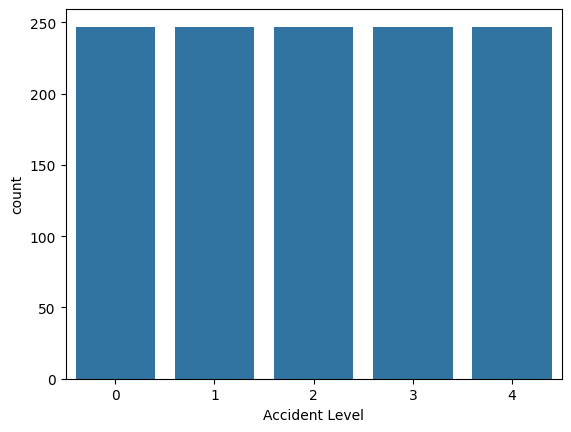

In [119]:
sns.countplot(x ='Accident Level', data = y_train_smote)

In [120]:
y_train_smote_dummy = np_utils.to_categorical(y_train_smote['Accident Level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [121]:
X_train.head()

Weekday  Year  Month  Day  WeekofYear  Country_02  Country_03  Local_02  \
202        3  2016      9    1          35           1           0         0   
258        1  2016     11   29          48           1           0         0   
6          5  2016      1   16           2           1           0         0   
84         3  2016      4    7          14           0           0         0   
338        0  2017      2   27           9           0           0         0   

     Local_03  Local_04  ...  TFIDF_accident employee use  \
202         0         0  ...                          0.0   
258         0         0  ...                          0.0   
6           0         0  ...                          0.0   
84          1         0  ...                          0.0   
338         1         0  ...                          0.0   

     TFIDF_cause injury time  TFIDF_finger left hand  TFIDF_finger right hand  \
202                      0.0                     0.0                      0.0   
258                      0.0                     0.0                      0.0   
6                        0.0                     0.0                      0.0   
84                       0.0                     0.0                      0.0   
338                      0.0                     0.0                      0.0   

     TFIDF_generate injury time  TFIDF_hand cause injury  \
202                         0.0                      0.0   
258                         0.0                      0.0   
6                           0.0                      0.0   
84                          0.0                      0.0   
338                         0.0                      0.0   

     TFIDF_injury time accident  TFIDF_left hand cause  \
202                         0.0                    0.0   
258                         0.0                    0.0   
6                           0.0                    0.0   
84                          0.0                    0.0   
338                         0.0                    0.0   

     TFIDF_right hand cause  TFIDF_time accident employee  
202                     0.0                           0.0  
258                     0.0                           0.0  
6                       0.0                           0.0  
84                      0.0                           0.0  
338                     0.0                           0.0  

[5 rows x 85 columns]

In [122]:
scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:5] = pipeline.fit_transform(X_train.iloc[:,:5])

X_test.iloc[:,:5] = pipeline.fit_transform(X_test.iloc[:,:5])

<ipython-input-122-8a50146d6dec>:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.0754959  -0.9975096   1.14850139  0.0754959  -1.53401235  0.0754959
 -0.9975096   0.61199864  0.0754959   0.0754959   1.68500414  1.68500414
  1.14850139  0.61199864  0.0754959   0.61199864  1.68500414  0.0754959
  0.0754959  -1.53401235  0.61199864 -0.46100685  0.0754959  -0.9975096
 -0.9975096  -0.46100685  0.61199864 -1.53401235 -0.9975096  -0.9975096
  0.0754959  -1.53401235  0.0754959   0.61199864 -0.9975096   0.61199864
 -0.9975096   1.68500414 -0.9975096   0.0754959  -1.53401235  0.61199864
 -0.9975096  -0.9975096  -0.9975096  -0.46100685  0.61199864 -0.46100685
  0.61199864 -0.46100685  1.14850139  0.0754959   0.61199864  1.14850139
 -0.9975096   0.0754959   0.61199864  0.0754959   0.61199864  1.68500414
 -0.9975096   0.0754959   0.0754959   1.68500414  1.68500414  0.61199864
  1.68500414 -0.9975096   1.14850139  1.685004

In [123]:
X_train.head()

Weekday      Year     Month       Day  WeekofYear  Country_02  \
202  0.075496 -0.700765  1.168926 -1.673853    0.996914           1   
258 -0.997510 -0.700765  1.802213  1.559083    1.934247           1   
6    1.148501 -0.700765 -1.364221  0.058077   -1.382469           1   
84   0.075496 -0.700765 -0.414291 -0.981081   -0.517238           0   
338 -1.534012  1.427012 -1.047578  1.328159   -0.877751           0   

     Country_03  Local_02  Local_03  Local_04  ...  \
202           0         0         0         0  ...   
258           0         0         0         0  ...   
6             0         0         0         0  ...   
84            0         0         1         0  ...   
338           0         0         1         0  ...   

     TFIDF_accident employee use  TFIDF_cause injury time  \
202                          0.0                      0.0   
258                          0.0                      0.0   
6                            0.0                      0.0   
84                           0.0                      0.0   
338                          0.0                      0.0   

     TFIDF_finger left hand  TFIDF_finger right hand  \
202                     0.0                      0.0   
258                     0.0                      0.0   
6                       0.0                      0.0   
84                      0.0                      0.0   
338                     0.0                      0.0   

     TFIDF_generate injury time  TFIDF_hand cause injury  \
202                         0.0                      0.0   
258                         0.0                      0.0   
6                           0.0                      0.0   
84                          0.0                      0.0   
338                         0.0                      0.0   

     TFIDF_injury time accident  TFIDF_left hand cause  \
202                         0.0                    0.0   
258                         0.0                    0.0   
6                           0.0                    0.0   
84                          0.0                    0.0   
338                         0.0                    0.0   

     TFIDF_right hand cause  TFIDF_time accident employee  
202                     0.0                           0.0  
258                     0.0                           0.0  
6                       0.0                           0.0  
84                      0.0                           0.0  
338                     0.0                           0.0  

[5 rows x 85 columns]

In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 202 to 315
Data columns (total 85 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Weekday                                       334 non-null    float64
 1   Year                                          334 non-null    float64
 2   Month                                         334 non-null    float64
 3   Day                                           334 non-null    float64
 4   WeekofYear                                    334 non-null    float64
 5   Country_02                                    334 non-null    int64  
 6   Country_03                                    334 non-null    int64  
 7   Local_02                                      334 non-null    int64  
 8   Local_03                                      334 non-null    int64  
 9   Local_04                                      334 non-null    int64 

In [125]:
covMatrix = np.cov(X_train,rowvar=False)
print(covMatrix)

[[ 1.00300300e+00  4.27794381e-02 -9.05547475e-02 ...  5.16883065e-03
  -1.65662145e-03  1.05076114e-03]
 [ 4.27794381e-02  1.00300300e+00 -4.24727770e-01 ... -2.09142269e-03
  -4.79370898e-03 -5.08449160e-03]
 [-9.05547475e-02 -4.24727770e-01  1.00300300e+00 ...  7.11213420e-03
   4.60528643e-03  6.66545121e-03]
 ...
 [ 5.16883065e-03 -2.09142269e-03  7.11213420e-03 ...  7.04473393e-03
  -6.99137197e-05 -1.67345342e-04]
 [-1.65662145e-03 -4.79370898e-03  4.60528643e-03 ... -6.99137197e-05
   5.46082097e-03 -1.11672863e-04]
 [ 1.05076114e-03 -5.08449160e-03  6.66545121e-03 ... -1.67345342e-04
  -1.11672863e-04  1.33276989e-02]]


In [126]:
e_vals, e_vecs = np.linalg.eig(covMatrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-9.57794079e-02+0.00000000e+00j  7.29779231e-01+0.00000000e+00j
   5.59610634e-01+0.00000000e+00j ...  4.69975097e-18-9.70750172e-18j
   4.69975097e-18+9.70750172e-18j  0.00000000e+00+0.00000000e+00j]
 [-4.24145864e-01+0.00000000e+00j  1.63216047e-02+0.00000000e+00j
  -2.77316322e-01+0.00000000e+00j ...  3.46309281e-16-1.87809934e-16j
   3.46309281e-16+1.87809934e-16j  0.00000000e+00+0.00000000e+00j]
 [ 6.26881401e-01+0.00000000e+00j  5.17468320e-03+0.00000000e+00j
  -4.41863179e-03+0.00000000e+00j ... -1.12122705e-16-4.91126810e-16j
  -1.12122705e-16+4.91126810e-16j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 4.20027303e-03+0.00000000e+00j  4.86471977e-03+0.00000000e+00j
   6.31800022e-03+0.00000000e+00j ...  3.24236604e-16-6.08643281e-16j
   3.24236604e-16+6.08643281e-16j  0.00000000e+00+0.00000000e+00j]
 [ 3.28514912e-03+0.00000000e+00j -4.14831309e-03+0.00000000e+00j
   4.50872859e-03+0.00000000e+00j ... -2.34606481e-16+1.66080579e-16j
  -2.34606481e-16-1.66080579e-16j

In [127]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.50729431+0.00000000e+00j  39.13691107+0.00000000e+00j
  50.267793  +0.00000000e+00j  58.66140149+0.00000000e+00j
  65.15022494+0.00000000e+00j  70.10134345+0.00000000e+00j
  72.76203191+0.00000000e+00j  74.93733249+0.00000000e+00j
  76.98377906+0.00000000e+00j  78.72368408+0.00000000e+00j
  80.2965764 +0.00000000e+00j  81.73811545+0.00000000e+00j
  83.08706837+0.00000000e+00j  84.2296695 +0.00000000e+00j
  85.27834863+0.00000000e+00j  86.23152977+0.00000000e+00j
  87.11850145+0.00000000e+00j  87.92150593+0.00000000e+00j
  88.68901703+0.00000000e+00j  89.38188779+0.00000000e+00j
  90.03145937+0.00000000e+00j  90.64240216+0.00000000e+00j
  91.23294641+0.00000000e+00j  91.76272868+0.00000000e+00j
  92.24596832+0.00000000e+00j  92.68366698+0.00000000e+00j
  93.10054536+0.00000000e+00j  93.50278556+0.00000000e+00j
  93.87787588+0.00000000e+00j  94.23655176+0.00000000e+00j
  94.58534167+0.00000000e+00j  94.93092712+0.00000000e+00j
  95.24296561+0.00000000e+

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:766: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



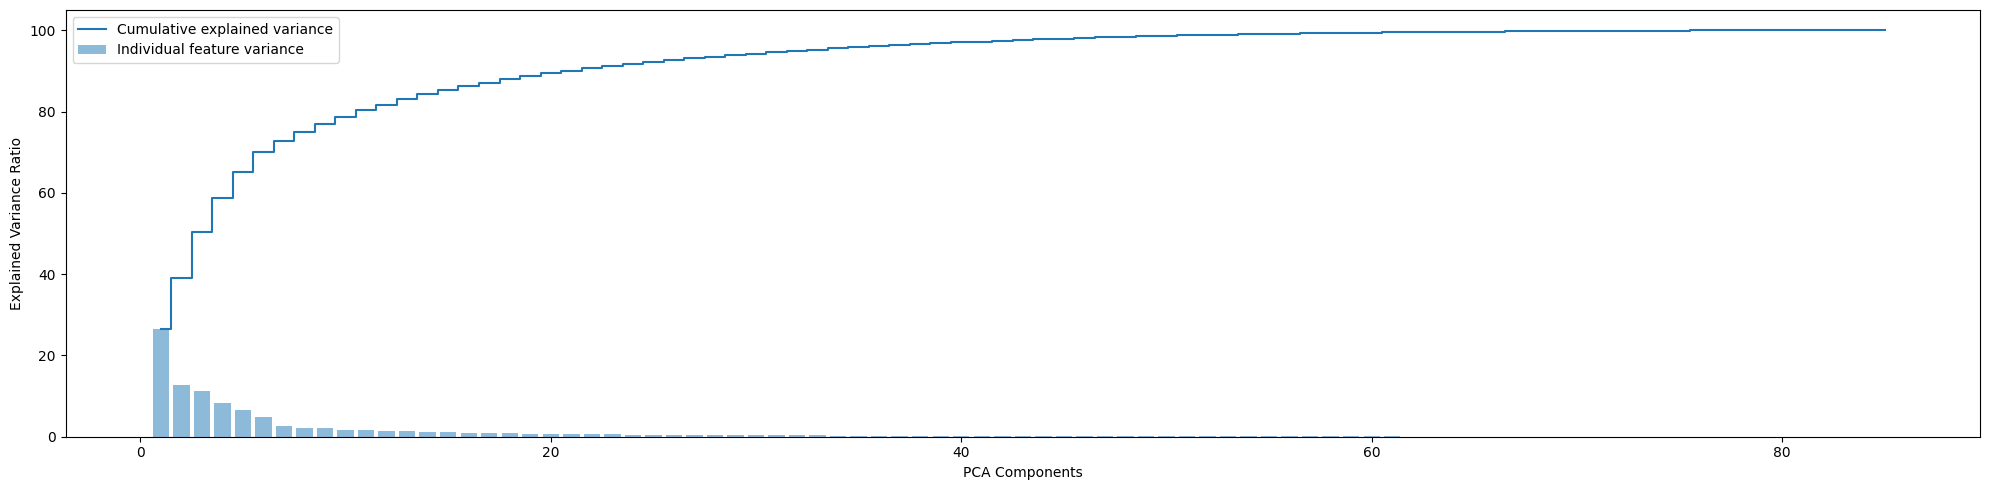

In [128]:
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual feature variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PCA Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [129]:
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [130]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(334, 21)
(84, 21)


In [131]:
pca = PCA(n_components=21)
pca.fit(X_train)

PCA(n_components=21)

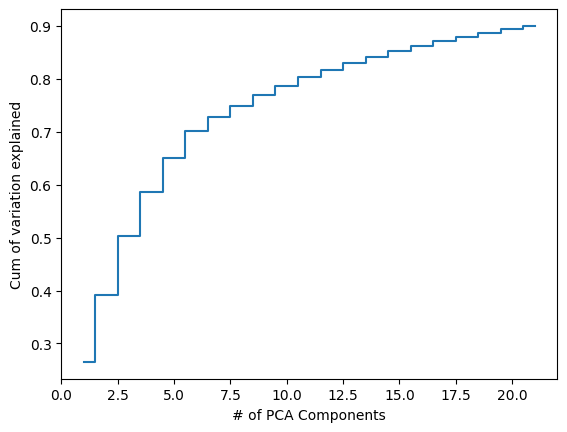

In [132]:
plt.step(list(range(1,22)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

#### Step 7: ML Model Building Phase - I

In [133]:
X_train.head()

Weekday      Year     Month       Day  WeekofYear  Country_02  \
202  0.075496 -0.700765  1.168926 -1.673853    0.996914           1   
258 -0.997510 -0.700765  1.802213  1.559083    1.934247           1   
6    1.148501 -0.700765 -1.364221  0.058077   -1.382469           1   
84   0.075496 -0.700765 -0.414291 -0.981081   -0.517238           0   
338 -1.534012  1.427012 -1.047578  1.328159   -0.877751           0   

     Country_03  Local_02  Local_03  Local_04  ...  \
202           0         0         0         0  ...   
258           0         0         0         0  ...   
6             0         0         0         0  ...   
84            0         0         1         0  ...   
338           0         0         1         0  ...   

     TFIDF_accident employee use  TFIDF_cause injury time  \
202                          0.0                      0.0   
258                          0.0                      0.0   
6                            0.0                      0.0   
84                           0.0                      0.0   
338                          0.0                      0.0   

     TFIDF_finger left hand  TFIDF_finger right hand  \
202                     0.0                      0.0   
258                     0.0                      0.0   
6                       0.0                      0.0   
84                      0.0                      0.0   
338                     0.0                      0.0   

     TFIDF_generate injury time  TFIDF_hand cause injury  \
202                         0.0                      0.0   
258                         0.0                      0.0   
6                           0.0                      0.0   
84                          0.0                      0.0   
338                         0.0                      0.0   

     TFIDF_injury time accident  TFIDF_left hand cause  \
202                         0.0                    0.0   
258                         0.0                    0.0   
6                           0.0                    0.0   
84                          0.0                    0.0   
338                         0.0                    0.0   

     TFIDF_right hand cause  TFIDF_time accident employee  
202                     0.0                           0.0  
258                     0.0                           0.0  
6                       0.0                           0.0  
84                      0.0                           0.0  
338                     0.0                           0.0  

[5 rows x 85 columns]

In [134]:
import warnings
warnings.filterwarnings('ignore')


In [135]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [136]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, coef_type, index, scale, report, save_model):

    if report == "yes":
        print (model)
        print ("----------------------------------------------------------------")

    if method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

    if coef_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")

        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    result = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score,
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score,
                              'Multi-Class Logloss': mc_logloss}, index=[index])

    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))

    return result

In [137]:
import lightgbm as lgb

In [138]:
import time

In [139]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):

    start = time.time()  # note the start time

    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBMClassifier':
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv,
                                       scoring = mll_scorer, error_score=0)
    else:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,
                                 scoring = mll_scorer, error_score=0)

    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")

    return model_grid_result.best_estimator_

#### Evaluation using Classifier with Actual Data

LogisticRegression(multi_class='multinomial', random_state=1)
----------------------------------------------------------------


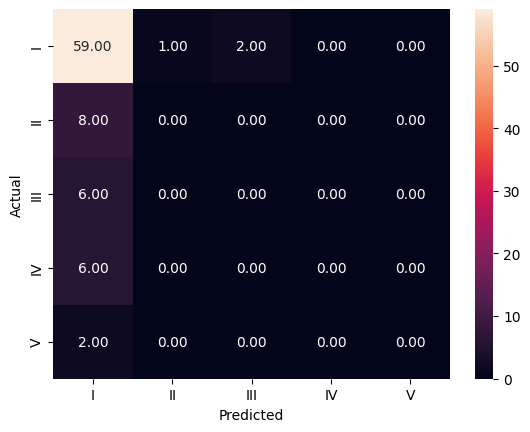

              precision    recall  f1-score   support

           0       0.73      0.95      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.70      0.61        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1  LogisticRegression        0.742515       0.702381   0.537625  0.702381   

   F1-Score  Multi-Class Logloss  
1  0.609058             0.914438

In [140]:
result = pd.DataFrame()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
result = train_test_model(lr, 'LogisticRegression', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')
result

RidgeClassifier(random_state=1)
----------------------------------------------------------------


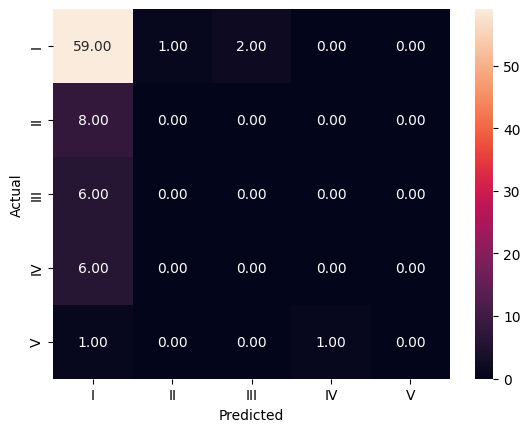

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.70      0.61        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1  LogisticRegression        0.742515       0.702381   0.537625  0.702381   
2     RidgeClassifier        0.763473       0.702381   0.544345  0.702381   

   F1-Score  Multi-Class Logloss  
1  0.609058             0.914438  
2  0.613347             1.000000

In [141]:
rc = RidgeClassifier(random_state = 1)
rc_df = train_test_model(rc, 'RidgeClassifier', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')
result = pd.concat([result,rc_df])
result

KNeighborsClassifier(n_neighbors=3)
----------------------------------------------------------------


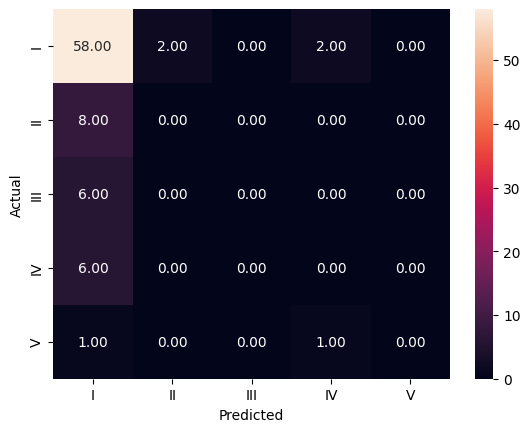

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.69        84
   macro avg       0.15      0.19      0.16        84
weighted avg       0.54      0.69      0.61        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1  LogisticRegression        0.742515       0.702381   0.537625  0.702381   
2     RidgeClassifier        0.763473       0.702381   0.544345  0.702381   
3       KNNClassifier        0.757485       0.690476   0.541893  0.690476   

   F1-Score  Multi-Class Logloss  
1  0.609058             0.914438  
2  0.613347             1.000000  
3  0.607227             7.282090

In [142]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn_df = train_test_model(knn, 'KNNClassifier', X_train, X_test, y_train, y_test, 'none', 3, 'no', 'yes', 'no')
result = pd.concat([result,knn_df])
result

In [143]:
from sklearn import svm

SVC(probability=True)
----------------------------------------------------------------


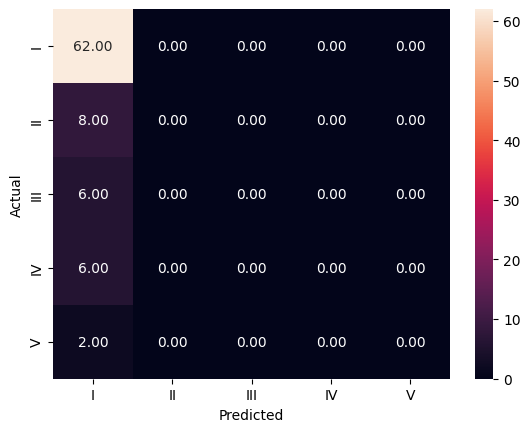

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1  LogisticRegression        0.742515       0.702381   0.537625  0.702381   
2     RidgeClassifier        0.763473       0.702381   0.544345  0.702381   
3       KNNClassifier        0.757485       0.690476   0.541893  0.690476   
4                 SVC        0.739521       0.738095   0.544785  0.738095   

   F1-Score  Multi-Class Logloss  
1  0.609058             0.914438  
2  0.613347             1.000000  
3  0.607227             7.282090  
4  0.626875             0.906771

In [144]:
clf = svm.SVC(kernel = 'rbf', probability=True)
svm_df = train_test_model(clf, 'SVC', X_train, X_test, y_train, y_test, 'none', 4, 'no', 'yes', 'no')
result = pd.concat([result,svm_df])
result

DecisionTreeClassifier(random_state=1)
----------------------------------------------------------------


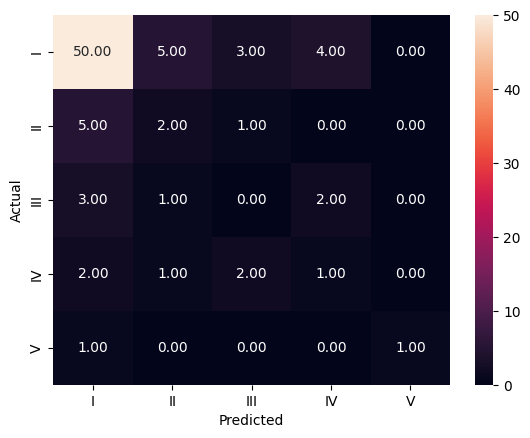

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        62
           1       0.22      0.25      0.24         8
           2       0.00      0.00      0.00         6
           3       0.14      0.17      0.15         6
           4       1.00      0.50      0.67         2

    accuracy                           0.64        84
   macro avg       0.44      0.34      0.37        84
weighted avg       0.66      0.64      0.65        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.742515       0.702381   0.537625  0.702381   
2         RidgeClassifier        0.763473       0.702381   0.544345  0.702381   
3           KNNClassifier        0.757485       0.690476   0.541893  0.690476   
4                     SVC        0.739521       0.738095   0.544785  0.738095   
5  DecisionTreeClassifier        0.994012       0.642857   0.660174  0.642857   

   F1-Score  Multi-Class Logloss  
1  0.609058             0.914438  
2  0.613347             1.000000  
3  0.607227             7.282090  
4  0.626875             0.906771  
5  0.649348            12.335277

In [145]:
dtc = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtc_df = train_test_model(dtc, 'DecisionTreeClassifier', X_train, X_test, y_train, y_test, 'none', 5, 'no', 'yes', 'no')
result = pd.concat([result,dtc_df])
result

RandomForestClassifier(n_estimators=10, random_state=1)
----------------------------------------------------------------


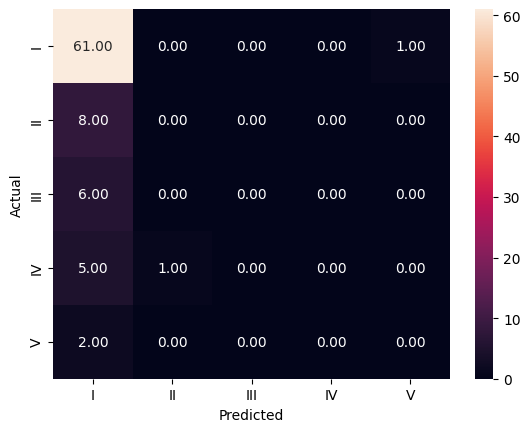

              precision    recall  f1-score   support

           0       0.74      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.73      0.63        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.742515       0.702381   0.537625  0.702381   
2         RidgeClassifier        0.763473       0.702381   0.544345  0.702381   
3           KNNClassifier        0.757485       0.690476   0.541893  0.690476   
4                     SVC        0.739521       0.738095   0.544785  0.738095   
5  DecisionTreeClassifier        0.994012       0.642857   0.660174  0.642857   
6  RandomForestClassifier        0.970060       0.726190   0.549071  0.726190   

   F1-Score  Multi-Class Logloss  
1  0.609058             0.914438  
2  0.613347             1.000000  
3  0.607227             7.282090  
4  0.626875             0.906771  
5  0.649348            12.335277  
6  0.625331             3.502112

In [146]:
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = train_test_model(rfc_model, 'RandomForestClassifier', X_train, X_test, y_train, y_test, 'none', 6, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
result = pd.concat([result,rf_df])
result

BaggingClassifier(max_samples=0.75, n_estimators=30, oob_score=True,
                  random_state=1)
----------------------------------------------------------------


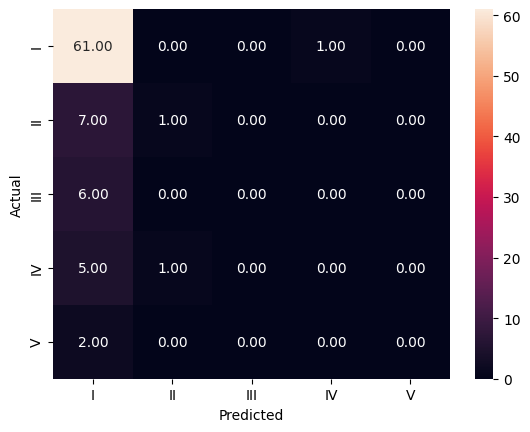

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        62
           1       0.50      0.12      0.20         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.25      0.22      0.21        84
weighted avg       0.60      0.74      0.65        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.742515       0.702381   0.537625  0.702381   
2         RidgeClassifier        0.763473       0.702381   0.544345  0.702381   
3           KNNClassifier        0.757485       0.690476   0.541893  0.690476   
4                     SVC        0.739521       0.738095   0.544785  0.738095   
5  DecisionTreeClassifier        0.994012       0.642857   0.660174  0.642857   
6  RandomForestClassifier        0.970060       0.726190   0.549071  0.726190   
7       BaggingClassifier        0.964072       0.738095   0.603469  0.738095   

   F1-Score  Multi-Class Logloss  
1  0.609058             0.914438  
2  0.613347             1.000000  
3  0.607227             7.282090  
4  0.626875             0.906771  
5  0.649348            12.335277  
6  0.625331             3.502112  
7  0.648751             2.345994

In [147]:
bc = BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)
bc_df = train_test_model(bc, 'BaggingClassifier', X_train, X_test, y_train, y_test, 'none', 7, 'no', 'yes', 'no')
result = pd.concat([result,bc_df])
result

AdaBoostClassifier(learning_rate=0.25, n_estimators=100, random_state=1)
----------------------------------------------------------------


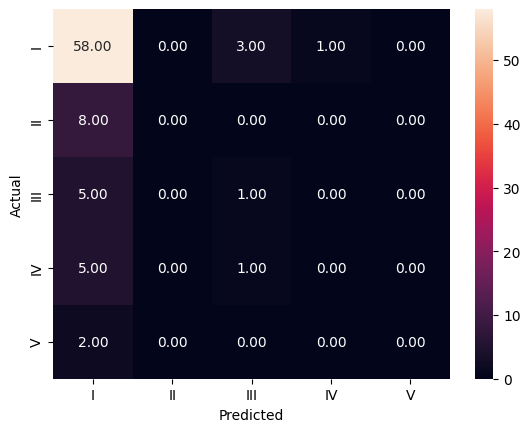

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        62
           1       0.00      0.00      0.00         8
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.19      0.22      0.20        84
weighted avg       0.56      0.70      0.62        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.742515       0.702381   0.537625  0.702381   
2         RidgeClassifier        0.763473       0.702381   0.544345  0.702381   
3           KNNClassifier        0.757485       0.690476   0.541893  0.690476   
4                     SVC        0.739521       0.738095   0.544785  0.738095   
5  DecisionTreeClassifier        0.994012       0.642857   0.660174  0.642857   
6  RandomForestClassifier        0.970060       0.726190   0.549071  0.726190   
7       BaggingClassifier        0.964072       0.738095   0.603469  0.738095   
8      AdaBoostClassifier        0.691617       0.702381   0.563126  0.702381   

   F1-Score  Multi-Class Logloss  
1  0.609058             0.914438  
2  0.613347             1.000000  
3  0.607227             7.282090  
4  0.626875             0.906771  
5  0.649348            12.335277  
6  0.625331             3.502112  
7  0.648751             2.345994  
8  0.624552             1.276574

In [148]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)
abc_df = train_test_model(abc, 'AdaBoostClassifier', X_train, X_test, y_train, y_test, 'none', 8, 'no', 'yes', 'no')
result = pd.concat([result,abc_df])
result

GradientBoostingClassifier(n_estimators=50, random_state=1,
                           validation_fraction=0.2)
----------------------------------------------------------------


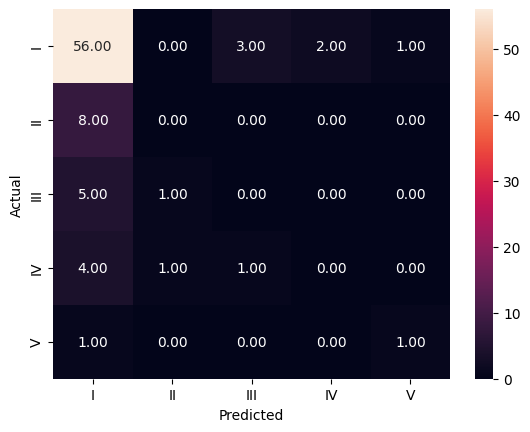

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.50      0.50      0.50         2

    accuracy                           0.68        84
   macro avg       0.25      0.28      0.26        84
weighted avg       0.57      0.68      0.62        84



Method  Train Accuracy  Test Accuracy  Precision  \
1          LogisticRegression        0.742515       0.702381   0.537625   
2             RidgeClassifier        0.763473       0.702381   0.544345   
3               KNNClassifier        0.757485       0.690476   0.541893   
4                         SVC        0.739521       0.738095   0.544785   
5      DecisionTreeClassifier        0.994012       0.642857   0.660174   
6      RandomForestClassifier        0.970060       0.726190   0.549071   
7           BaggingClassifier        0.964072       0.738095   0.603469   
8          AdaBoostClassifier        0.691617       0.702381   0.563126   
9  GradientBoostingClassifier        0.931138       0.678571   0.570463   

     Recall  F1-Score  Multi-Class Logloss  
1  0.702381  0.609058             0.914438  
2  0.702381  0.613347             1.000000  
3  0.690476  0.607227             7.282090  
4  0.738095  0.626875             0.906771  
5  0.642857  0.649348            12.335277  
6  0.726190  0.625331             3.502112  
7  0.738095  0.648751             2.345994  
8  0.702381  0.624552             1.276574  
9  0.678571  0.619748             0.956228

In [149]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, validation_fraction=0.2, random_state=1)
gbc_df = train_test_model(gbc, 'GradientBoostingClassifier', X_train, X_test, y_train, y_test, 'none', 9, 'no', 'yes', 'no')
result = pd.concat([result,gbc_df])
result

LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=1)
----------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 33
[LightGBM] [Info] Start training from score -0.301753
[LightGBM] [Info] Start training from score -2.345405
[LightGBM] [Info] Start training from score -2.592265
[LightGBM] [Info] Start training from score -2.633087
[LightGBM] [Info] Start training from score -4.019382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

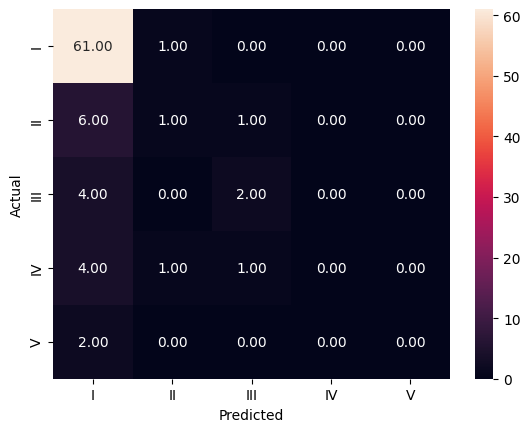

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        62
           1       0.33      0.12      0.18         8
           2       0.50      0.33      0.40         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.76        84
   macro avg       0.33      0.29      0.29        84
weighted avg       0.65      0.76      0.69        84



Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.742515       0.702381   0.537625   
2              RidgeClassifier        0.763473       0.702381   0.544345   
3                KNNClassifier        0.757485       0.690476   0.541893   
4                          SVC        0.739521       0.738095   0.544785   
5       DecisionTreeClassifier        0.994012       0.642857   0.660174   
6       RandomForestClassifier        0.970060       0.726190   0.549071   
7            BaggingClassifier        0.964072       0.738095   0.603469   
8           AdaBoostClassifier        0.691617       0.702381   0.563126   
9   GradientBoostingClassifier        0.931138       0.678571   0.570463   
10              LGBMClassifier        0.991018       0.761905   0.652185   

      Recall  F1-Score  Multi-Class Logloss  
1   0.702381  0.609058             0.914438  
2   0.702381  0.613347             1.000000  
3   0.690476  0.607227             7.282090  
4   0.738095  0.626875             0.906771  
5   0.642857  0.649348            12.335277  
6   0.726190  0.625331             3.502112  
7   0.738095  0.648751             2.345994  
8   0.702381  0.624552             1.276574  
9   0.678571  0.619748             0.956228  
10  0.761905  0.693712             1.359249

In [150]:
lgbm = LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")
lgbm_df = train_test_model(lgbm, 'LGBMClassifier', X_train, X_test, y_train, y_test, 'none', 10, 'no', 'yes', 'no')
result = pd.concat([result,lgbm_df])
result

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)
----------------------------------------------------------------


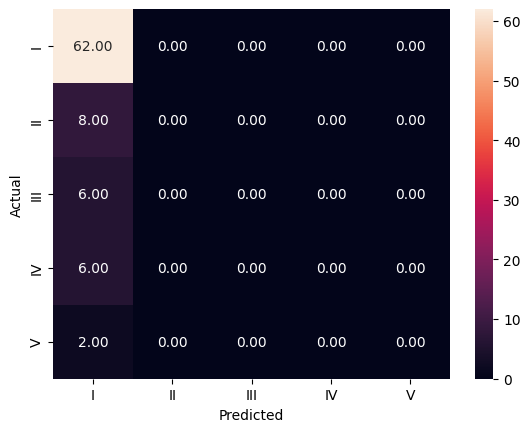

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.742515       0.702381   0.537625   
2              RidgeClassifier        0.763473       0.702381   0.544345   
3                KNNClassifier        0.757485       0.690476   0.541893   
4                          SVC        0.739521       0.738095   0.544785   
5       DecisionTreeClassifier        0.994012       0.642857   0.660174   
6       RandomForestClassifier        0.970060       0.726190   0.549071   
7            BaggingClassifier        0.964072       0.738095   0.603469   
8           AdaBoostClassifier        0.691617       0.702381   0.563126   
9   GradientBoostingClassifier        0.931138       0.678571   0.570463   
10              LGBMClassifier        0.991018       0.761905   0.652185   
11               XGBClassifier        0.778443       0.738095   0.544785   

      Recall  F1-Score  Multi-Class Logloss  
1   0.702381  0.609058             0.914438  
2   0.702381  0.613347             1.000000  
3   0.690476  0.607227             7.282090  
4   0.738095  0.626875             0.906771  
5   0.642857  0.649348            12.335277  
6   0.726190  0.625331             3.502112  
7   0.738095  0.648751             2.345994  
8   0.702381  0.624552             1.276574  
9   0.678571  0.619748             0.956228  
10  0.761905  0.693712             1.359249  
11  0.738095  0.626875             0.896493

In [151]:
xgb = XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, colsample_bytree = 0.5)
xgb_df = train_test_model(xgb, 'XGBClassifier', X_train, X_test, y_train, y_test, 'none', 11, 'no', 'yes', 'no')
result = pd.concat([result,xgb_df])
result

#### Evaluation using Classifier with Smote Data

LogisticRegression(multi_class='multinomial', random_state=1)
----------------------------------------------------------------


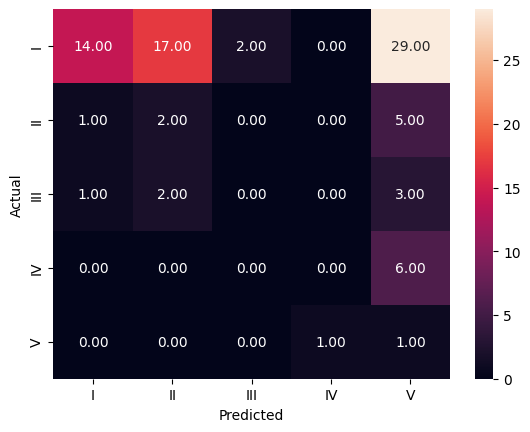

              precision    recall  f1-score   support

           0       0.88      0.23      0.36        62
           1       0.10      0.25      0.14         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.20        84
   macro avg       0.20      0.20      0.11        84
weighted avg       0.66      0.20      0.28        84



Method  Train Accuracy  Test Accuracy  Precision  \
1               LogisticRegression        0.742515       0.702381   0.537625   
2                  RidgeClassifier        0.763473       0.702381   0.544345   
3                    KNNClassifier        0.757485       0.690476   0.541893   
4                              SVC        0.739521       0.738095   0.544785   
5           DecisionTreeClassifier        0.994012       0.642857   0.660174   
6           RandomForestClassifier        0.970060       0.726190   0.549071   
7                BaggingClassifier        0.964072       0.738095   0.603469   
8               AdaBoostClassifier        0.691617       0.702381   0.563126   
9       GradientBoostingClassifier        0.931138       0.678571   0.570463   
10                  LGBMClassifier        0.991018       0.761905   0.652185   
11                   XGBClassifier        0.778443       0.738095   0.544785   
12  Logistic Regression with SMOTE        0.417004       0.202381   0.655445   

      Recall  F1-Score  Multi-Class Logloss  
1   0.702381  0.609058             0.914438  
2   0.702381  0.613347             1.000000  
3   0.690476  0.607227             7.282090  
4   0.738095  0.626875             0.906771  
5   0.642857  0.649348            12.335277  
6   0.726190  0.625331             3.502112  
7   0.738095  0.648751             2.345994  
8   0.702381  0.624552             1.276574  
9   0.678571  0.619748             0.956228  
10  0.761905  0.693712             1.359249  
11  0.738095  0.626875             0.896493  
12  0.202381  0.279129             1.615448

In [152]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)

lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 12, 'no', 'yes', 'no')

result = pd.concat([result,lr_smote_df])
result

KNeighborsClassifier(n_neighbors=3)
----------------------------------------------------------------


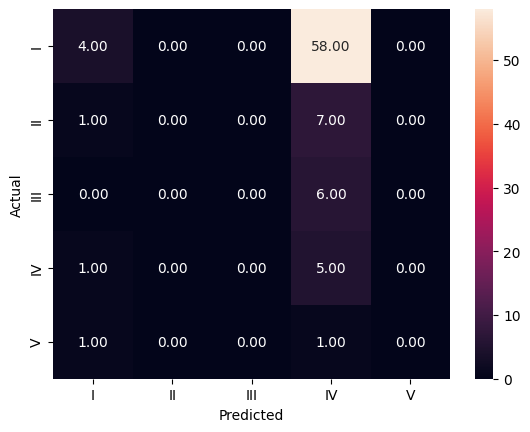

              precision    recall  f1-score   support

           0       0.57      0.06      0.12        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.06      0.83      0.12         6
           4       0.00      0.00      0.00         2

    accuracy                           0.11        84
   macro avg       0.13      0.18      0.05        84
weighted avg       0.43      0.11      0.09        84



Method  Train Accuracy  Test Accuracy  Precision  \
1               LogisticRegression        0.742515       0.702381   0.537625   
2                  RidgeClassifier        0.763473       0.702381   0.544345   
3                    KNNClassifier        0.757485       0.690476   0.541893   
4                              SVC        0.739521       0.738095   0.544785   
5           DecisionTreeClassifier        0.994012       0.642857   0.660174   
6           RandomForestClassifier        0.970060       0.726190   0.549071   
7                BaggingClassifier        0.964072       0.738095   0.603469   
8               AdaBoostClassifier        0.691617       0.702381   0.563126   
9       GradientBoostingClassifier        0.931138       0.678571   0.570463   
10                  LGBMClassifier        0.991018       0.761905   0.652185   
11                   XGBClassifier        0.778443       0.738095   0.544785   
12  Logistic Regression with SMOTE        0.417004       0.202381   0.655445   
13   KNN Classification with SMOTE        0.908502       0.107143   0.426407   

      Recall  F1-Score  Multi-Class Logloss  
1   0.702381  0.609058             0.914438  
2   0.702381  0.613347             1.000000  
3   0.690476  0.607227             7.282090  
4   0.738095  0.626875             0.906771  
5   0.642857  0.649348            12.335277  
6   0.726190  0.625331             3.502112  
7   0.738095  0.648751             2.345994  
8   0.702381  0.624552             1.276574  
9   0.678571  0.619748             0.956228  
10  0.761905  0.693712             1.359249  
11  0.738095  0.626875             0.896493  
12  0.202381  0.279129             1.615448  
13  0.107143  0.094182             9.379561

In [153]:
knns = KNeighborsClassifier(n_neighbors = 3)
knns_df = train_test_model(knns, 'KNN Classification with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 13, 'no', 'yes', 'no')
result = pd.concat([result,knns_df])
result

SVC(probability=True)
----------------------------------------------------------------


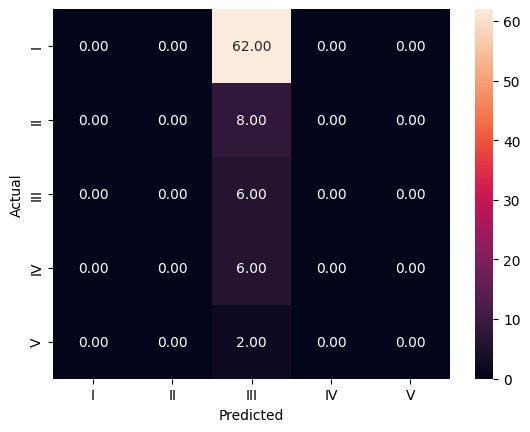

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.00      0.00      0.00         8
           2       0.07      1.00      0.13         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.07        84
   macro avg       0.01      0.20      0.03        84
weighted avg       0.01      0.07      0.01        84



Method  Train Accuracy  Test Accuracy  Precision  \
1               LogisticRegression        0.742515       0.702381   0.537625   
2                  RidgeClassifier        0.763473       0.702381   0.544345   
3                    KNNClassifier        0.757485       0.690476   0.541893   
4                              SVC        0.739521       0.738095   0.544785   
5           DecisionTreeClassifier        0.994012       0.642857   0.660174   
6           RandomForestClassifier        0.970060       0.726190   0.549071   
7                BaggingClassifier        0.964072       0.738095   0.603469   
8               AdaBoostClassifier        0.691617       0.702381   0.563126   
9       GradientBoostingClassifier        0.931138       0.678571   0.570463   
10                  LGBMClassifier        0.991018       0.761905   0.652185   
11                   XGBClassifier        0.778443       0.738095   0.544785   
12  Logistic Regression with SMOTE        0.417004       0.202381   0.655445   
13   KNN Classification with SMOTE        0.908502       0.107143   0.426407   
14                  SVC with SMOTE        0.295547       0.071429   0.005102   

      Recall  F1-Score  Multi-Class Logloss  
1   0.702381  0.609058             0.914438  
2   0.702381  0.613347             1.000000  
3   0.690476  0.607227             7.282090  
4   0.738095  0.626875             0.906771  
5   0.642857  0.649348            12.335277  
6   0.726190  0.625331             3.502112  
7   0.738095  0.648751             2.345994  
8   0.702381  0.624552             1.276574  
9   0.678571  0.619748             0.956228  
10  0.761905  0.693712             1.359249  
11  0.738095  0.626875             0.896493  
12  0.202381  0.279129             1.615448  
13  0.107143  0.094182             9.379561  
14  0.071429  0.009524             1.574050

In [154]:
clf_c = svm.SVC(kernel = 'rbf', probability=True)
svmc_df = train_test_model(clf_c, 'SVC with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 14, 'no', 'yes', 'no')
result = pd.concat([result,svmc_df])
result

DecisionTreeClassifier(random_state=1)
----------------------------------------------------------------


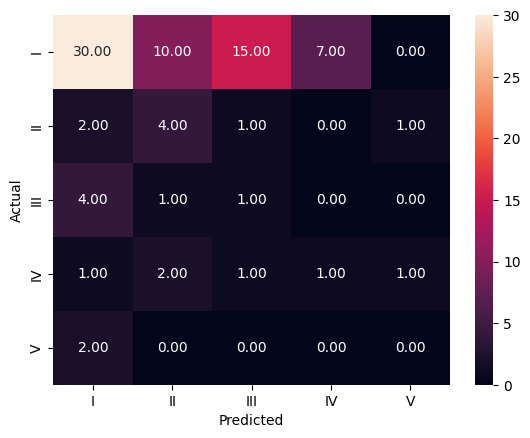

              precision    recall  f1-score   support

           0       0.77      0.48      0.59        62
           1       0.24      0.50      0.32         8
           2       0.06      0.17      0.08         6
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         2

    accuracy                           0.43        84
   macro avg       0.24      0.26      0.23        84
weighted avg       0.60      0.43      0.49        84



Method  Train Accuracy  Test Accuracy  \
1                  LogisticRegression        0.742515       0.702381   
2                     RidgeClassifier        0.763473       0.702381   
3                       KNNClassifier        0.757485       0.690476   
4                                 SVC        0.739521       0.738095   
5              DecisionTreeClassifier        0.994012       0.642857   
6              RandomForestClassifier        0.970060       0.726190   
7                   BaggingClassifier        0.964072       0.738095   
8                  AdaBoostClassifier        0.691617       0.702381   
9          GradientBoostingClassifier        0.931138       0.678571   
10                     LGBMClassifier        0.991018       0.761905   
11                      XGBClassifier        0.778443       0.738095   
12     Logistic Regression with SMOTE        0.417004       0.202381   
13      KNN Classification with SMOTE        0.908502       0.107143   
14                     SVC with SMOTE        0.295547       0.071429   
15  DecisionTreeClassifier with SMOTE        0.998381       0.428571   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444

In [155]:
dtc_s = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtcs_df = train_test_model(dtc_s, 'DecisionTreeClassifier with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 15, 'no', 'yes', 'no')
result = pd.concat([result,dtcs_df])
result

RandomForestClassifier(n_estimators=10, random_state=1)
----------------------------------------------------------------


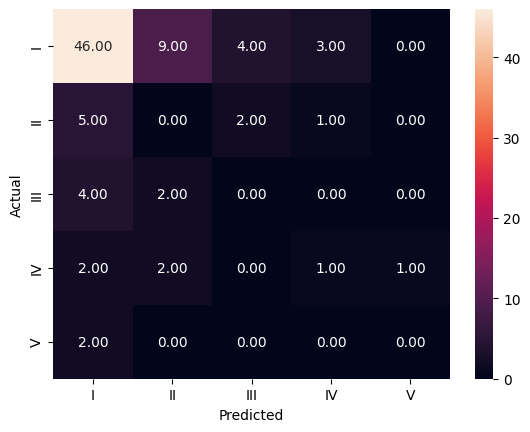

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         2

    accuracy                           0.56        84
   macro avg       0.20      0.18      0.19        84
weighted avg       0.59      0.56      0.57        84



Method  Train Accuracy  Test Accuracy  \
1                  LogisticRegression        0.742515       0.702381   
2                     RidgeClassifier        0.763473       0.702381   
3                       KNNClassifier        0.757485       0.690476   
4                                 SVC        0.739521       0.738095   
5              DecisionTreeClassifier        0.994012       0.642857   
6              RandomForestClassifier        0.970060       0.726190   
7                   BaggingClassifier        0.964072       0.738095   
8                  AdaBoostClassifier        0.691617       0.702381   
9          GradientBoostingClassifier        0.931138       0.678571   
10                     LGBMClassifier        0.991018       0.761905   
11                      XGBClassifier        0.778443       0.738095   
12     Logistic Regression with SMOTE        0.417004       0.202381   
13      KNN Classification with SMOTE        0.908502       0.107143   
14                     SVC with SMOTE        0.295547       0.071429   
15  DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16  RandomForestClassifier with SMOTE        0.995951       0.559524   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319

In [156]:
rfc_s_model = RandomForestClassifier(n_estimators=10, random_state=1)

rfs_df = train_test_model(rfc_s_model, 'RandomForestClassifier with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 16, 'no', 'yes', 'no')

result = pd.concat([result,rfs_df])
result

BaggingClassifier(max_samples=0.75, n_estimators=30, oob_score=True,
                  random_state=1)
----------------------------------------------------------------


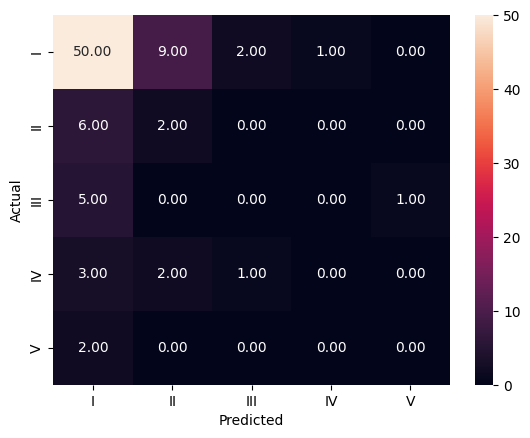

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        62
           1       0.15      0.25      0.19         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.62        84
   macro avg       0.18      0.21      0.19        84
weighted avg       0.57      0.62      0.59        84



Method  Train Accuracy  Test Accuracy  \
1                  LogisticRegression        0.742515       0.702381   
2                     RidgeClassifier        0.763473       0.702381   
3                       KNNClassifier        0.757485       0.690476   
4                                 SVC        0.739521       0.738095   
5              DecisionTreeClassifier        0.994012       0.642857   
6              RandomForestClassifier        0.970060       0.726190   
7                   BaggingClassifier        0.964072       0.738095   
8                  AdaBoostClassifier        0.691617       0.702381   
9          GradientBoostingClassifier        0.931138       0.678571   
10                     LGBMClassifier        0.991018       0.761905   
11                      XGBClassifier        0.778443       0.738095   
12     Logistic Regression with SMOTE        0.417004       0.202381   
13      KNN Classification with SMOTE        0.908502       0.107143   
14                     SVC with SMOTE        0.295547       0.071429   
15  DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16  RandomForestClassifier with SMOTE        0.995951       0.559524   
17       BaggingClassifier with SMOTE        0.993522       0.619048   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079

In [157]:
bc_s = BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)
bc_s_df = train_test_model(bc_s, 'BaggingClassifier with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 17, 'no', 'yes', 'no')
result = pd.concat([result,bc_s_df])
result

AdaBoostClassifier(learning_rate=0.25, n_estimators=100, random_state=1)
----------------------------------------------------------------


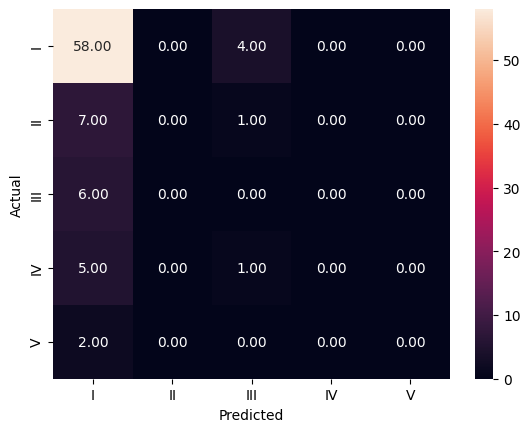

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.69        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.69      0.61        84



Method  Train Accuracy  Test Accuracy  \
1                  LogisticRegression        0.742515       0.702381   
2                     RidgeClassifier        0.763473       0.702381   
3                       KNNClassifier        0.757485       0.690476   
4                                 SVC        0.739521       0.738095   
5              DecisionTreeClassifier        0.994012       0.642857   
6              RandomForestClassifier        0.970060       0.726190   
7                   BaggingClassifier        0.964072       0.738095   
8                  AdaBoostClassifier        0.691617       0.702381   
9          GradientBoostingClassifier        0.931138       0.678571   
10                     LGBMClassifier        0.991018       0.761905   
11                      XGBClassifier        0.778443       0.738095   
12     Logistic Regression with SMOTE        0.417004       0.202381   
13      KNN Classification with SMOTE        0.908502       0.107143   
14                     SVC with SMOTE        0.295547       0.071429   
15  DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16  RandomForestClassifier with SMOTE        0.995951       0.559524   
17       BaggingClassifier with SMOTE        0.993522       0.619048   
18      AdaBoostClassifier with SMOTE        0.541700       0.690476   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110

In [158]:
abc_s = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)
abc_s_df = train_test_model(abc_s, 'AdaBoostClassifier with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 18, 'no', 'yes', 'no')
result = pd.concat([result,abc_s_df])
result

GradientBoostingClassifier(n_estimators=50, random_state=1,
                           validation_fraction=0.2)
----------------------------------------------------------------


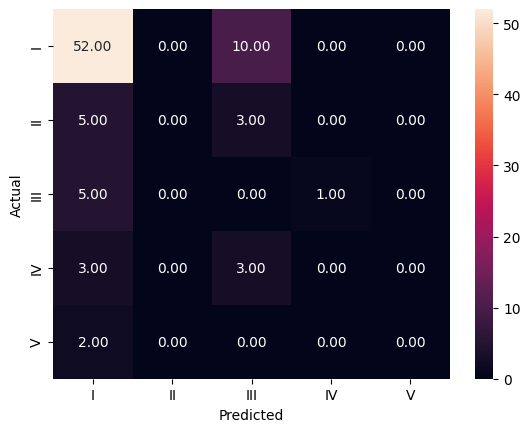

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.62        84
   macro avg       0.16      0.17      0.16        84
weighted avg       0.57      0.62      0.60        84



Method  Train Accuracy  Test Accuracy  \
1                      LogisticRegression        0.742515       0.702381   
2                         RidgeClassifier        0.763473       0.702381   
3                           KNNClassifier        0.757485       0.690476   
4                                     SVC        0.739521       0.738095   
5                  DecisionTreeClassifier        0.994012       0.642857   
6                  RandomForestClassifier        0.970060       0.726190   
7                       BaggingClassifier        0.964072       0.738095   
8                      AdaBoostClassifier        0.691617       0.702381   
9              GradientBoostingClassifier        0.931138       0.678571   
10                         LGBMClassifier        0.991018       0.761905   
11                          XGBClassifier        0.778443       0.738095   
12         Logistic Regression with SMOTE        0.417004       0.202381   
13          KNN Classification with SMOTE        0.908502       0.107143   
14                         SVC with SMOTE        0.295547       0.071429   
15      DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16      RandomForestClassifier with SMOTE        0.995951       0.559524   
17           BaggingClassifier with SMOTE        0.993522       0.619048   
18          AdaBoostClassifier with SMOTE        0.541700       0.690476   
19  GradientBoostingClassifier with SMOTE        0.961943       0.619048   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110  
19   0.572850  0.619048  0.595054             1.093869

In [159]:
gbc_s = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, validation_fraction=0.2, random_state=1)
gbcs_df = train_test_model(gbc_s, 'GradientBoostingClassifier with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 19, 'no', 'yes', 'no')
result = pd.concat([result,gbcs_df])
result

LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=1)
----------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2897
[LightGBM] [Info] Number of data points in the train set: 1235, number of used features: 48
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

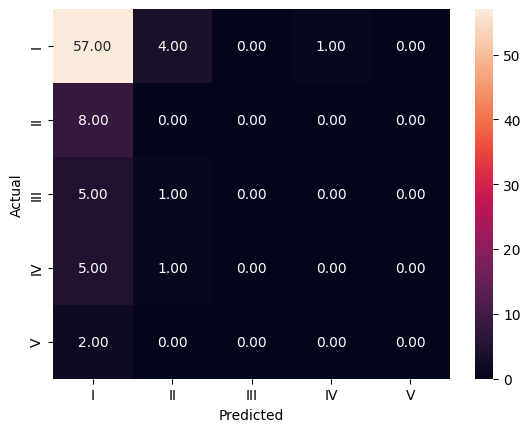

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        84
   macro avg       0.15      0.18      0.16        84
weighted avg       0.55      0.68      0.61        84



Method  Train Accuracy  Test Accuracy  \
1                      LogisticRegression        0.742515       0.702381   
2                         RidgeClassifier        0.763473       0.702381   
3                           KNNClassifier        0.757485       0.690476   
4                                     SVC        0.739521       0.738095   
5                  DecisionTreeClassifier        0.994012       0.642857   
6                  RandomForestClassifier        0.970060       0.726190   
7                       BaggingClassifier        0.964072       0.738095   
8                      AdaBoostClassifier        0.691617       0.702381   
9              GradientBoostingClassifier        0.931138       0.678571   
10                         LGBMClassifier        0.991018       0.761905   
11                          XGBClassifier        0.778443       0.738095   
12         Logistic Regression with SMOTE        0.417004       0.202381   
13          KNN Classification with SMOTE        0.908502       0.107143   
14                         SVC with SMOTE        0.295547       0.071429   
15      DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16      RandomForestClassifier with SMOTE        0.995951       0.559524   
17           BaggingClassifier with SMOTE        0.993522       0.619048   
18          AdaBoostClassifier with SMOTE        0.541700       0.690476   
19  GradientBoostingClassifier with SMOTE        0.961943       0.619048   
20              LGBMClassifier with SMOTE        0.997571       0.678571   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110  
19   0.572850  0.619048  0.595054             1.093869  
20   0.546382  0.678571  0.605344             1.670949

In [160]:
lgbm_s = LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")
lgbm_s_df = train_test_model(lgbm_s, 'LGBMClassifier with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 20, 'no', 'yes', 'no')
result = pd.concat([result,lgbm_s_df])
result

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)
----------------------------------------------------------------


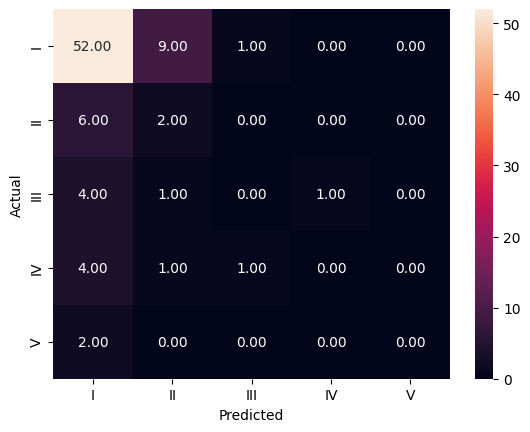

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        62
           1       0.15      0.25      0.19         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.64        84
   macro avg       0.18      0.22      0.20        84
weighted avg       0.58      0.64      0.61        84



Method  Train Accuracy  Test Accuracy  \
1                      LogisticRegression        0.742515       0.702381   
2                         RidgeClassifier        0.763473       0.702381   
3                           KNNClassifier        0.757485       0.690476   
4                                     SVC        0.739521       0.738095   
5                  DecisionTreeClassifier        0.994012       0.642857   
6                  RandomForestClassifier        0.970060       0.726190   
7                       BaggingClassifier        0.964072       0.738095   
8                      AdaBoostClassifier        0.691617       0.702381   
9              GradientBoostingClassifier        0.931138       0.678571   
10                         LGBMClassifier        0.991018       0.761905   
11                          XGBClassifier        0.778443       0.738095   
12         Logistic Regression with SMOTE        0.417004       0.202381   
13          KNN Classification with SMOTE        0.908502       0.107143   
14                         SVC with SMOTE        0.295547       0.071429   
15      DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16      RandomForestClassifier with SMOTE        0.995951       0.559524   
17           BaggingClassifier with SMOTE        0.993522       0.619048   
18          AdaBoostClassifier with SMOTE        0.541700       0.690476   
19  GradientBoostingClassifier with SMOTE        0.961943       0.619048   
20              LGBMClassifier with SMOTE        0.997571       0.678571   
21               XGBClassifier with SMOTE        0.981377       0.642857   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110  
19   0.572850  0.619048  0.595054             1.093869  
20   0.546382  0.678571  0.605344             1.670949  
21   0.579078  0.642857  0.608617             1.035439

In [161]:
xgb_s = XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, colsample_bytree = 0.5)
xgb_s_df = train_test_model(xgb_s, 'XGBClassifier with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 21, 'no', 'yes', 'no')
result = pd.concat([result,xgb_s_df])
result

In [162]:
# define regressor models
models=[['LogisticRegression',LogisticRegression()],
    ['Ridge',RidgeClassifier()],
    ['KNeighborsClassifier',KNeighborsClassifier()],
    ['SVC',SVC()],
    ['RandomForestClassifier',RandomForestClassifier()],
    ['BaggingClassifier',BaggingClassifier()],
    ['AdaBoostClassifier',AdaBoostClassifier()],
    ['GradientBoostingClassifier',GradientBoostingClassifier()],
    ['LGBMClassifier',LGBMClassifier(verbose=False)],
    ['XGBClassifier',XGBClassifier()]
]

# define model parameters

lr_param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'penalty': ['l2'],
                 #'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                 'C': [100, 10, 1.0, 0.1, 0.01]}
                 #'class_weight':['none','balanced'],
                 #'multi_class':['ovr', 'multinomial']}
ridge_param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'class_weight':['none','balanced'],
                    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
#lasso_param_grid = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
knn_param_grid = {'n_neighbors': range(3, 21, 2),
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan', 'minkowski']}
svc_param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
                 'C': [50, 10, 1.0, 0.1, 0.01],
                 'gamma': ['scale'],
                 'decision_function_shape': ['ovo', 'ovr']}
rf_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_features': ['sqrt', 'log2']}
                 #'class_weight':['balanced','balanced_subsample','none']}
bag_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_samples': np.arange(0.7, 0.8, 0.05)}
                 #'class_weight':['balanced','balanced_subsample','none']}
adb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
gb_param_grid = {
                  'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 0.2],
                  'max_depth': [3, 5, 7]}
lightgbm_param_grid = {
                        'num_leaves': [31, 63, 127],
                        'max_depth': [-1, 3, 5],
                        'subsample': [0.8, 1.0],
                        'colsample_bytree': [0.8, 1.0]
                      }
xgb_param_grid = {
                   'min_child_weight': [1, 5, 10],
                   'gamma': [0.5, 1, 1.5, 2, 5],
                   'subsample': [0.6, 0.8, 1.0],
                   'colsample_bytree': [0.6, 0.8, 1.0],
                   'max_depth': [3, 4, 5]
                 }

In [163]:

for name, classifier in models:
    if name == 'LogisticRegression':
        lr_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lr_param_grid)
   # elif name == 'Ridge':
   #     ridge_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lasso_param_grid)
    elif name == 'KNeighborsClassifier':
        knn_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, knn_param_grid)
    elif name == 'SVC':
        svc_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, svc_param_grid)
    elif name == 'RandomForestClassifier':
        rf_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, rf_param_grid)
    elif name == 'BaggingClassifier':
        bag_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, bag_param_grid)
    elif name == 'AdaBoostClassifier':
        adb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, adb_param_grid)
    #elif name == 'GradientBoostingClassifier':
        #gb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, gb_param_grid)
    #elif name == 'LGBMClassifier':
        #lightgbm_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lightgbm_param_grid)
    #elif name == 'XGBClassifier':
        #xgb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, xgb_param_grid)

Best F1_Score: -0.906307 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
-0.906307 (0.062011) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
95% Confidence interval range: (-1.0303 %, -0.7823 %)
Total duration 44.2499144077301 

Best F1_Score: -2.279648 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
-2.279648 (0.967486) with: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
95% Confidence interval range: (-4.2146 %, -0.3447 %)
Total duration 18.05597472190857 

Best F1_Score: 0.000000 using {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
0.000000 (0.000000) with: {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
95% Confidence interval range: (0.0000 %, 0.0000 %)
Total duration 21.784589052200317 

Best F1_Score: -0.995349 using {'max_features': 'sqrt', 'n_estimators': 1000}
-0.995349 (0.206101) with: {'max_features': 'sqrt', 'n_estimators': 1000}
95% Confidence interval ran

LogisticRegression(C=0.01, solver='saga')
----------------------------------------------------------------


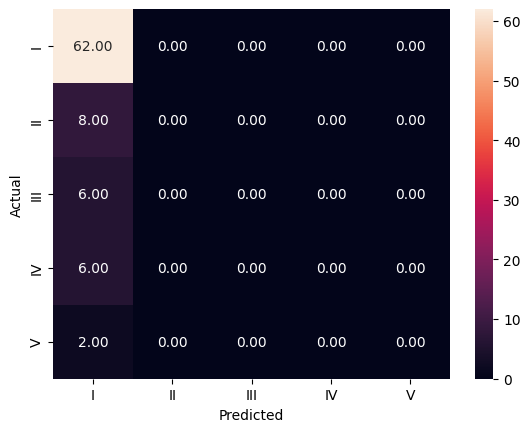

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



Method  Train Accuracy  Test Accuracy  \
1                      LogisticRegression        0.742515       0.702381   
2                         RidgeClassifier        0.763473       0.702381   
3                           KNNClassifier        0.757485       0.690476   
4                                     SVC        0.739521       0.738095   
5                  DecisionTreeClassifier        0.994012       0.642857   
6                  RandomForestClassifier        0.970060       0.726190   
7                       BaggingClassifier        0.964072       0.738095   
8                      AdaBoostClassifier        0.691617       0.702381   
9              GradientBoostingClassifier        0.931138       0.678571   
10                         LGBMClassifier        0.991018       0.761905   
11                          XGBClassifier        0.778443       0.738095   
12         Logistic Regression with SMOTE        0.417004       0.202381   
13          KNN Classification with SMOTE        0.908502       0.107143   
14                         SVC with SMOTE        0.295547       0.071429   
15      DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16      RandomForestClassifier with SMOTE        0.995951       0.559524   
17           BaggingClassifier with SMOTE        0.993522       0.619048   
18          AdaBoostClassifier with SMOTE        0.541700       0.690476   
19  GradientBoostingClassifier with SMOTE        0.961943       0.619048   
20              LGBMClassifier with SMOTE        0.997571       0.678571   
21               XGBClassifier with SMOTE        0.981377       0.642857   
22  Logistic Regression with GridSearchCV        0.739521       0.738095   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110  
19   0.572850  0.619048  0.595054             1.093869  
20   0.546382  0.678571  0.605344             1.670949  
21   0.579078  0.642857  0.608617             1.035439  
22   0.544785  0.738095  0.626875             0.892560

In [164]:
lrg = LogisticRegression(C = 0.01 , penalty = 'l2', solver = 'saga')

lrg_df = train_test_model(lrg, 'Logistic Regression with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 22, 'no', 'yes', 'no')

result = pd.concat([result,lrg_df])
result

KNeighborsClassifier(metric='manhattan', n_neighbors=19)
----------------------------------------------------------------


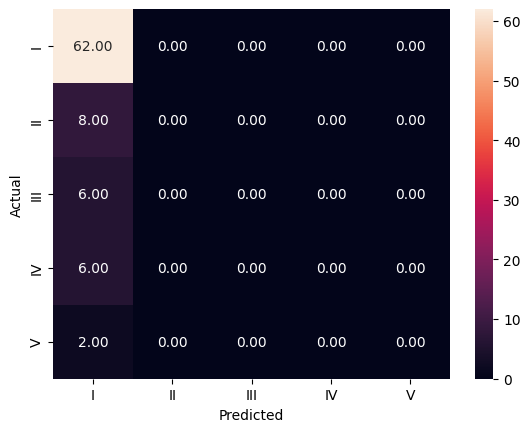

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



Method  Train Accuracy  Test Accuracy  \
1                      LogisticRegression        0.742515       0.702381   
2                         RidgeClassifier        0.763473       0.702381   
3                           KNNClassifier        0.757485       0.690476   
4                                     SVC        0.739521       0.738095   
5                  DecisionTreeClassifier        0.994012       0.642857   
6                  RandomForestClassifier        0.970060       0.726190   
7                       BaggingClassifier        0.964072       0.738095   
8                      AdaBoostClassifier        0.691617       0.702381   
9              GradientBoostingClassifier        0.931138       0.678571   
10                         LGBMClassifier        0.991018       0.761905   
11                          XGBClassifier        0.778443       0.738095   
12         Logistic Regression with SMOTE        0.417004       0.202381   
13          KNN Classification with SMOTE        0.908502       0.107143   
14                         SVC with SMOTE        0.295547       0.071429   
15      DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16      RandomForestClassifier with SMOTE        0.995951       0.559524   
17           BaggingClassifier with SMOTE        0.993522       0.619048   
18          AdaBoostClassifier with SMOTE        0.541700       0.690476   
19  GradientBoostingClassifier with SMOTE        0.961943       0.619048   
20              LGBMClassifier with SMOTE        0.997571       0.678571   
21               XGBClassifier with SMOTE        0.981377       0.642857   
22  Logistic Regression with GridSearchCV        0.739521       0.738095   
23   KNN Classification with GridSearchCV        0.739521       0.738095   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110  
19   0.572850  0.619048  0.595054             1.093869  
20   0.546382  0.678571  0.605344             1.670949  
21   0.579078  0.642857  0.608617             1.035439  
22   0.544785  0.738095  0.626875             0.892560  
23   0.544785  0.738095  0.626875             1.603823

In [165]:
knng = KNeighborsClassifier(metric = 'manhattan',n_neighbors = 19, weights = 'uniform')
knng_df = train_test_model(knng, 'KNN Classification with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 23, 'no', 'yes', 'no')
result = pd.concat([result,knng_df])
result

SVC(C=50, decision_function_shape='ovo', kernel='poly', probability=True)
----------------------------------------------------------------


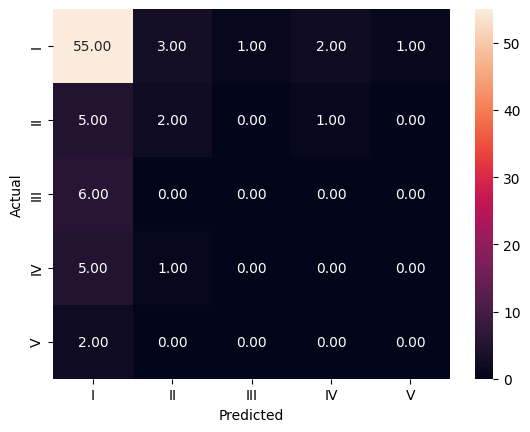

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        62
           1       0.33      0.25      0.29         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        84
   macro avg       0.22      0.23      0.22        84
weighted avg       0.59      0.68      0.63        84



Method  Train Accuracy  Test Accuracy  \
1                      LogisticRegression        0.742515       0.702381   
2                         RidgeClassifier        0.763473       0.702381   
3                           KNNClassifier        0.757485       0.690476   
4                                     SVC        0.739521       0.738095   
5                  DecisionTreeClassifier        0.994012       0.642857   
6                  RandomForestClassifier        0.970060       0.726190   
7                       BaggingClassifier        0.964072       0.738095   
8                      AdaBoostClassifier        0.691617       0.702381   
9              GradientBoostingClassifier        0.931138       0.678571   
10                         LGBMClassifier        0.991018       0.761905   
11                          XGBClassifier        0.778443       0.738095   
12         Logistic Regression with SMOTE        0.417004       0.202381   
13          KNN Classification with SMOTE        0.908502       0.107143   
14                         SVC with SMOTE        0.295547       0.071429   
15      DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16      RandomForestClassifier with SMOTE        0.995951       0.559524   
17           BaggingClassifier with SMOTE        0.993522       0.619048   
18          AdaBoostClassifier with SMOTE        0.541700       0.690476   
19  GradientBoostingClassifier with SMOTE        0.961943       0.619048   
20              LGBMClassifier with SMOTE        0.997571       0.678571   
21               XGBClassifier with SMOTE        0.981377       0.642857   
22  Logistic Regression with GridSearchCV        0.739521       0.738095   
23   KNN Classification with GridSearchCV        0.739521       0.738095   
24                  SVC with GridSearchCV        0.994012       0.678571   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110  
19   0.572850  0.619048  0.595054             1.093869  
20   0.546382  0.678571  0.605344             1.670949  
21   0.579078  0.642857  0.608617             1.035439  
22   0.544785  0.738095  0.626875             0.892560  
23   0.544785  0.738095  0.626875             1.603823  
24   0.587845  0.678571  0.628622             0.925828

In [166]:
clfg = svm.SVC(C= 50,decision_function_shape = 'ovo', gamma ='scale', kernel='poly', probability=True)
svmg_df = train_test_model(clfg, 'SVC with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 24, 'no', 'yes', 'no')
result = pd.concat([result,svmg_df])
result

RandomForestClassifier(max_features='log2', n_estimators=1000, random_state=1)
----------------------------------------------------------------


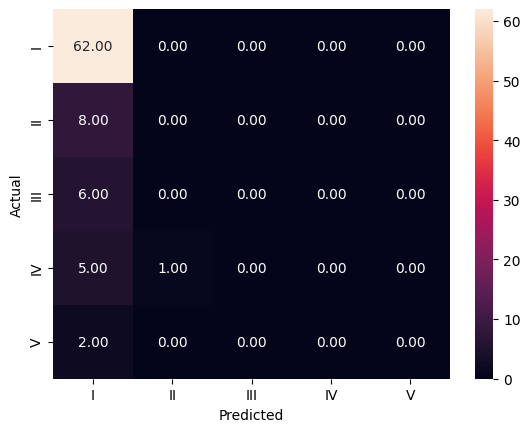

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.74      0.63        84



Method  Train Accuracy  Test Accuracy  \
1                         LogisticRegression        0.742515       0.702381   
2                            RidgeClassifier        0.763473       0.702381   
3                              KNNClassifier        0.757485       0.690476   
4                                        SVC        0.739521       0.738095   
5                     DecisionTreeClassifier        0.994012       0.642857   
6                     RandomForestClassifier        0.970060       0.726190   
7                          BaggingClassifier        0.964072       0.738095   
8                         AdaBoostClassifier        0.691617       0.702381   
9                 GradientBoostingClassifier        0.931138       0.678571   
10                            LGBMClassifier        0.991018       0.761905   
11                             XGBClassifier        0.778443       0.738095   
12            Logistic Regression with SMOTE        0.417004       0.202381   
13             KNN Classification with SMOTE        0.908502       0.107143   
14                            SVC with SMOTE        0.295547       0.071429   
15         DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16         RandomForestClassifier with SMOTE        0.995951       0.559524   
17              BaggingClassifier with SMOTE        0.993522       0.619048   
18             AdaBoostClassifier with SMOTE        0.541700       0.690476   
19     GradientBoostingClassifier with SMOTE        0.961943       0.619048   
20                 LGBMClassifier with SMOTE        0.997571       0.678571   
21                  XGBClassifier with SMOTE        0.981377       0.642857   
22     Logistic Regression with GridSearchCV        0.739521       0.738095   
23      KNN Classification with GridSearchCV        0.739521       0.738095   
24                     SVC with GridSearchCV        0.994012       0.678571   
25  RandomForestClassifier with GridSearchCV        0.994012       0.738095   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110  
19   0.572850  0.619048  0.595054             1.093869  
20   0.546382  0.678571  0.605344             1.670949  
21   0.579078  0.642857  0.608617             1.035439  
22   0.544785  0.738095  0.626875             0.892560  
23   0.544785  0.738095  0.626875             1.603823  
24   0.587845  0.678571  0.628622             0.925828  
25   0.551348  0.738095  0.631199             0.895673

In [167]:
rfc_g_model = RandomForestClassifier(max_features = 'log2', n_estimators=1000, random_state=1)

rfsg_df = train_test_model(rfc_g_model, 'RandomForestClassifier with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 25, 'no', 'yes', 'no')

result = pd.concat([result,rfsg_df])
result

BaggingClassifier(max_samples=0.75, n_estimators=1000, random_state=1)
----------------------------------------------------------------


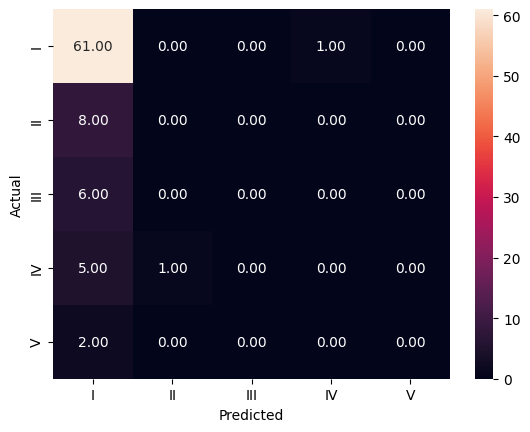

              precision    recall  f1-score   support

           0       0.74      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.73      0.63        84



Method  Train Accuracy  Test Accuracy  \
1                         LogisticRegression        0.742515       0.702381   
2                            RidgeClassifier        0.763473       0.702381   
3                              KNNClassifier        0.757485       0.690476   
4                                        SVC        0.739521       0.738095   
5                     DecisionTreeClassifier        0.994012       0.642857   
6                     RandomForestClassifier        0.970060       0.726190   
7                          BaggingClassifier        0.964072       0.738095   
8                         AdaBoostClassifier        0.691617       0.702381   
9                 GradientBoostingClassifier        0.931138       0.678571   
10                            LGBMClassifier        0.991018       0.761905   
11                             XGBClassifier        0.778443       0.738095   
12            Logistic Regression with SMOTE        0.417004       0.202381   
13             KNN Classification with SMOTE        0.908502       0.107143   
14                            SVC with SMOTE        0.295547       0.071429   
15         DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16         RandomForestClassifier with SMOTE        0.995951       0.559524   
17              BaggingClassifier with SMOTE        0.993522       0.619048   
18             AdaBoostClassifier with SMOTE        0.541700       0.690476   
19     GradientBoostingClassifier with SMOTE        0.961943       0.619048   
20                 LGBMClassifier with SMOTE        0.997571       0.678571   
21                  XGBClassifier with SMOTE        0.981377       0.642857   
22     Logistic Regression with GridSearchCV        0.739521       0.738095   
23      KNN Classification with GridSearchCV        0.739521       0.738095   
24                     SVC with GridSearchCV        0.994012       0.678571   
25  RandomForestClassifier with GridSearchCV        0.994012       0.738095   
26       BaggingClassifier with GridSearchCV        0.994012       0.726190   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110  
19   0.572850  0.619048  0.595054             1.093869  
20   0.546382  0.678571  0.605344             1.670949  
21   0.579078  0.642857  0.608617             1.035439  
22   0.544785  0.738095  0.626875             0.892560  
23   0.544785  0.738095  0.626875             1.603823  
24   0.587845  0.678571  0.628622             0.925828  
25   0.551348  0.738095  0.631199             0.895673  
26   0.549071  0.726190  0.625331             0.921658

In [168]:
bc_g = BaggingClassifier(n_estimators=1000, max_samples=0.75, random_state=1)
bc_g_df = train_test_model(bc_g, 'BaggingClassifier with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 26, 'no', 'yes', 'no')
result = pd.concat([result,bc_g_df])
result

AdaBoostClassifier(learning_rate=0.1, n_estimators=30, random_state=1)
----------------------------------------------------------------


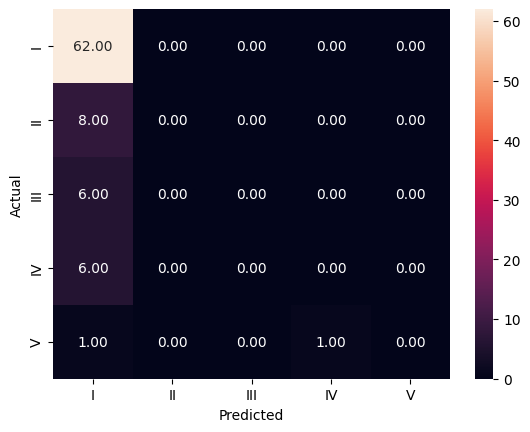

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.74      0.63        84



Method  Train Accuracy  Test Accuracy  \
1                         LogisticRegression        0.742515       0.702381   
2                            RidgeClassifier        0.763473       0.702381   
3                              KNNClassifier        0.757485       0.690476   
4                                        SVC        0.739521       0.738095   
5                     DecisionTreeClassifier        0.994012       0.642857   
6                     RandomForestClassifier        0.970060       0.726190   
7                          BaggingClassifier        0.964072       0.738095   
8                         AdaBoostClassifier        0.691617       0.702381   
9                 GradientBoostingClassifier        0.931138       0.678571   
10                            LGBMClassifier        0.991018       0.761905   
11                             XGBClassifier        0.778443       0.738095   
12            Logistic Regression with SMOTE        0.417004       0.202381   
13             KNN Classification with SMOTE        0.908502       0.107143   
14                            SVC with SMOTE        0.295547       0.071429   
15         DecisionTreeClassifier with SMOTE        0.998381       0.428571   
16         RandomForestClassifier with SMOTE        0.995951       0.559524   
17              BaggingClassifier with SMOTE        0.993522       0.619048   
18             AdaBoostClassifier with SMOTE        0.541700       0.690476   
19     GradientBoostingClassifier with SMOTE        0.961943       0.619048   
20                 LGBMClassifier with SMOTE        0.997571       0.678571   
21                  XGBClassifier with SMOTE        0.981377       0.642857   
22     Logistic Regression with GridSearchCV        0.739521       0.738095   
23      KNN Classification with GridSearchCV        0.739521       0.738095   
24                     SVC with GridSearchCV        0.994012       0.678571   
25  RandomForestClassifier with GridSearchCV        0.994012       0.738095   
26       BaggingClassifier with GridSearchCV        0.994012       0.726190   
27      AdaBoostClassifier with GridSearchCV        0.742515       0.738095   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.537625  0.702381  0.609058             0.914438  
2    0.544345  0.702381  0.613347             1.000000  
3    0.541893  0.690476  0.607227             7.282090  
4    0.544785  0.738095  0.626875             0.906771  
5    0.660174  0.642857  0.649348            12.335277  
6    0.549071  0.726190  0.625331             3.502112  
7    0.603469  0.738095  0.648751             2.345994  
8    0.563126  0.702381  0.624552             1.276574  
9    0.570463  0.678571  0.619748             0.956228  
10   0.652185  0.761905  0.693712             1.359249  
11   0.544785  0.738095  0.626875             0.896493  
12   0.655445  0.202381  0.279129             1.615448  
13   0.426407  0.107143  0.094182             9.379561  
14   0.005102  0.071429  0.009524             1.574050  
15   0.603071  0.428571  0.485105            19.736444  
16   0.589750  0.559524  0.574183             2.621319  
17   0.573815  0.619048  0.594777             1.390079  
18   0.548840  0.690476  0.611565             1.320110  
19   0.572850  0.619048  0.595054             1.093869  
20   0.546382  0.678571  0.605344             1.670949  
21   0.579078  0.642857  0.608617             1.035439  
22   0.544785  0.738095  0.626875             0.892560  
23   0.544785  0.738095  0.626875             1.603823  
24   0.587845  0.678571  0.628622             0.925828  
25   0.551348  0.738095  0.631199             0.895673  
26   0.549071  0.726190  0.625331             0.921658  
27   0.551348  0.738095  0.631199             1.089369

In [169]:
abc_g = AdaBoostClassifier(n_estimators=30, learning_rate=0.1, random_state=1)
abc_g_df = train_test_model(abc_g, 'AdaBoostClassifier with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 27, 'no', 'yes', 'no')
result = pd.concat([result,abc_g_df])
result

In [170]:
industry_feature_df.shape

(418, 87)

In [171]:
industry_feature_df['Potential Accident Level'].replace( 5, 4, inplace=True)

In [172]:
industry_feature_df_final = industry_feature_df.drop(['Accident Level', 'Potential Accident Level'], axis=1)

In [173]:
lgbm_pred = lgbm.predict(industry_feature_df_final)
#rfc_pred = rfc_g_model.predict(industry_feature_df_final)

In [174]:
lgbm_pred
#rfc_pred

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [175]:
industry_feature_df_final['Accident_Output'] = np.array(lgbm_pred)

In [176]:
industry_feature_df_final.head()

Weekday  Year  Month  Day  WeekofYear  Country_02  Country_03  Local_02  \
0        4  2016      1    1          53           0           0         0   
1        5  2016      1    2          53           1           0         1   
2        2  2016      1    6           1           0           0         0   
3        4  2016      1    8           1           0           0         0   
4        6  2016      1   10           1           0           0         0   

   Local_03  Local_04  ...  TFIDF_cause injury time  TFIDF_finger left hand  \
0         0         0  ...                      0.0                     0.0   
1         0         0  ...                      0.0                     0.0   
2         1         0  ...                      0.0                     0.0   
3         0         1  ...                      0.0                     0.0   
4         0         1  ...                      0.0                     0.0   

   TFIDF_finger right hand  TFIDF_generate injury time  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   

   TFIDF_hand cause injury  TFIDF_injury time accident  TFIDF_left hand cause  \
0                 0.000000                         0.0               0.000000   
1                 0.000000                         0.0               0.000000   
2                 0.000000                         0.0               0.000000   
3                 0.680994                         0.0               0.732289   
4                 0.000000                         0.0               0.000000   

   TFIDF_right hand cause  TFIDF_time accident employee  Accident_Output  
0                     0.0                           0.0                0  
1                     0.0                           0.0                0  
2                     0.0                           0.0                0  
3                     0.0                           0.0                0  
4                     0.0                           0.0                0  

[5 rows x 86 columns]

In [177]:
industry_feature_df['Potential Accident Level'].value_counts()

Potential Accident Level
3    141
2    106
1     95
0     45
4     31
Name: count, dtype: int64

#### Step 8: ML Model Building Phase - II

In [178]:
y = industry_feature_df['Potential Accident Level']

In [179]:
y.value_counts()

Potential Accident Level
3    141
2    106
1     95
0     45
4     31
Name: count, dtype: int64

In [180]:
X = industry_feature_df_final

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [182]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,86)
y_train shape : (334,)
X_test shape : (84,86)
y_test shape : (84,)


In [183]:
scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:5] = pipeline.fit_transform(X_train.iloc[:,:5])

X_test.iloc[:,:5] = pipeline.fit_transform(X_test.iloc[:,:5])

In [184]:
y

0      3
1      3
2      2
3      0
4      3
      ..
413    2
414    1
415    1
416    1
417    1
Name: Potential Accident Level, Length: 418, dtype: int8

In [185]:
industry_feature_df['Potential Accident Level'].value_counts()

Potential Accident Level
3    141
2    106
1     95
0     45
4     31
Name: count, dtype: int64

In [186]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
df_smote.columns = X_train.columns.append(pd.Index(['Potential Accident Level']))

In [187]:
df_smote.columns

Index(['Weekday', 'Year', 'Month', 'Day', 'WeekofYear', 'Country_02',
       'Country_03', 'Local_02', 'Local_03', 'Local_04', 'Local_05',
       'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10', 'Local_11',
       'Local_12', 'Male', 'IS_Mining', 'IS_Others', 'EmpType_Third_Party',
       'EmpType_Third_Party_(Remote)', 'CR_Blocking_and_isolation_of_energies',
       'CR_Burn', 'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools', 'CR_Proj

In [188]:
X_train_smote = df_smote.iloc[:,:-1]
y_train_smote = df_smote.iloc[:,-1:]

In [189]:
X_train_smote.head()

Weekday      Year     Month       Day  WeekofYear  Country_02  Country_03  \
0 -0.411120 -0.700765  1.503082  1.253912    1.594006           0           0   
1 -0.951725  1.427012  0.238524  0.557642    0.297407           0           0   
2  0.129486  1.427012  0.238524  1.602048    0.369440           1           0   
3 -0.411120 -0.700765  0.870803  1.021822    0.945707           0           0   
4 -1.492331 -0.700765 -0.393754 -1.299080   -0.494959           1           0   

   Local_02  Local_03  Local_04  ...  TFIDF_cause injury time  \
0         0         0         0  ...                      0.0   
1         0         0         0  ...                      0.0   
2         1         0         0  ...                      0.0   
3         0         0         0  ...                      0.0   
4         0         0         0  ...                      0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     0.0                      0.0   
4                     0.0                      0.0   

   TFIDF_generate injury time  TFIDF_hand cause injury  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   

   TFIDF_injury time accident  TFIDF_left hand cause  TFIDF_right hand cause  \
0                         0.0                    0.0                     0.0   
1                         0.0                    0.0                     0.0   
2                         0.0                    0.0                     0.0   
3                         0.0                    0.0                     0.0   
4                         0.0                    0.0                     0.0   

   TFIDF_time accident employee  Accident_Output  
0                           0.0                2  
1                           0.0                0  
2                           0.0                0  
3                           0.0                0  
4                           0.0                0  

[5 rows x 86 columns]

<Axes: xlabel='Potential Accident Level', ylabel='count'>

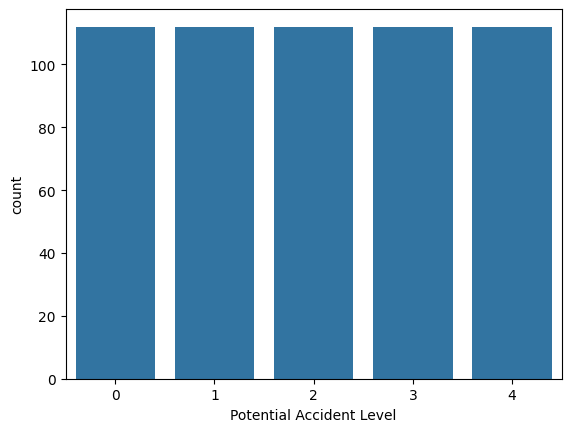

In [190]:
sns.countplot(x ='Potential Accident Level', data = y_train_smote)

In [191]:
y_train_smote_dummy = np_utils.to_categorical(y_train_smote['Potential Accident Level'])
y_train_smote_dummy

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

LogisticRegression(multi_class='multinomial', random_state=1)
----------------------------------------------------------------


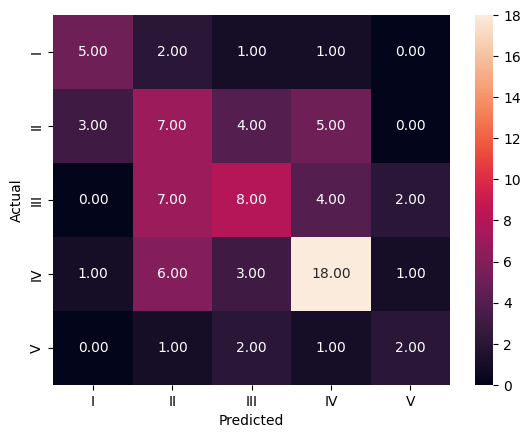

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.30      0.37      0.33        19
           2       0.44      0.38      0.41        21
           3       0.62      0.62      0.62        29
           4       0.40      0.33      0.36         6

    accuracy                           0.48        84
   macro avg       0.47      0.45      0.46        84
weighted avg       0.48      0.48      0.48        84



Method  Train Accuracy  Test Accuracy  Precision   Recall  \
1  LogisticRegression        0.628743        0.47619   0.482333  0.47619   

   F1-Score  Multi-Class Logloss  
1  0.477744             1.308967

In [192]:
result_2 = pd.DataFrame()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
result_2 = train_test_model(lr, 'LogisticRegression', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')
result_2

RidgeClassifier(random_state=1)
----------------------------------------------------------------


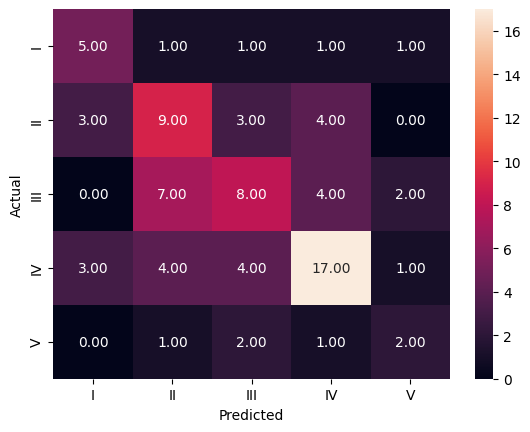

              precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.41      0.47      0.44        19
           2       0.44      0.38      0.41        21
           3       0.63      0.59      0.61        29
           4       0.33      0.33      0.33         6

    accuracy                           0.49        84
   macro avg       0.45      0.47      0.46        84
weighted avg       0.49      0.49      0.49        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1  LogisticRegression        0.628743       0.476190   0.482333  0.476190   
2     RidgeClassifier        0.640719       0.488095   0.493527  0.488095   

   F1-Score  Multi-Class Logloss  
1  0.477744             1.308967  
2  0.488857             1.000000

In [193]:
rc = RidgeClassifier(random_state = 1)
rc_df = train_test_model(rc, 'RidgeClassifier', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,rc_df])
result_2

KNeighborsClassifier(n_neighbors=3)
----------------------------------------------------------------


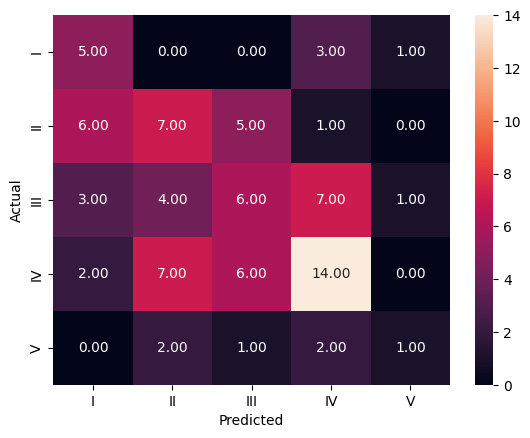

              precision    recall  f1-score   support

           0       0.31      0.56      0.40         9
           1       0.35      0.37      0.36        19
           2       0.33      0.29      0.31        21
           3       0.52      0.48      0.50        29
           4       0.33      0.17      0.22         6

    accuracy                           0.39        84
   macro avg       0.37      0.37      0.36        84
weighted avg       0.40      0.39      0.39        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1  LogisticRegression        0.628743       0.476190   0.482333  0.476190   
2     RidgeClassifier        0.640719       0.488095   0.493527  0.488095   
3       KNNClassifier        0.670659       0.392857   0.398804  0.392857   

   F1-Score  Multi-Class Logloss  
1  0.477744             1.308967  
2  0.488857             1.000000  
3  0.389469            11.992172

In [194]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn_df = train_test_model(knn, 'KNNClassifier', X_train, X_test, y_train, y_test, 'none', 3, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,knn_df])
result_2

SVC(probability=True)
----------------------------------------------------------------


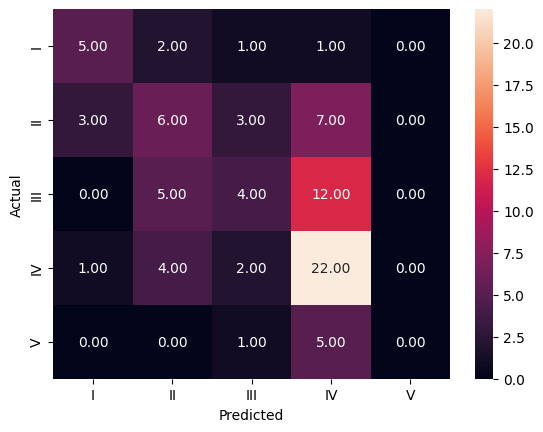

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.35      0.32      0.33        19
           2       0.36      0.19      0.25        21
           3       0.47      0.76      0.58        29
           4       0.00      0.00      0.00         6

    accuracy                           0.44        84
   macro avg       0.35      0.36      0.34        84
weighted avg       0.39      0.44      0.40        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1  LogisticRegression        0.628743       0.476190   0.482333  0.476190   
2     RidgeClassifier        0.640719       0.488095   0.493527  0.488095   
3       KNNClassifier        0.670659       0.392857   0.398804  0.392857   
4                 SVC        0.607784       0.440476   0.391866  0.440476   

   F1-Score  Multi-Class Logloss  
1  0.477744             1.308967  
2  0.488857             1.000000  
3  0.389469            11.992172  
4  0.397295             1.312624

In [195]:
clf = svm.SVC(kernel = 'rbf', probability=True)
svm_df = train_test_model(clf, 'SVC', X_train, X_test, y_train, y_test, 'none', 4, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,svm_df])
result_2

DecisionTreeClassifier(random_state=1)
----------------------------------------------------------------


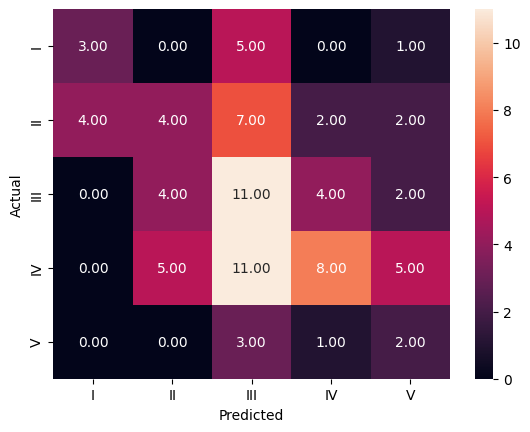

              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.31      0.21      0.25        19
           2       0.30      0.52      0.38        21
           3       0.53      0.28      0.36        29
           4       0.17      0.33      0.22         6

    accuracy                           0.33        84
   macro avg       0.35      0.34      0.32        84
weighted avg       0.39      0.33      0.33        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.628743       0.476190   0.482333  0.476190   
2         RidgeClassifier        0.640719       0.488095   0.493527  0.488095   
3           KNNClassifier        0.670659       0.392857   0.398804  0.392857   
4                     SVC        0.607784       0.440476   0.391866  0.440476   
5  DecisionTreeClassifier        0.997006       0.333333   0.385872  0.333333   

   F1-Score  Multi-Class Logloss  
1  0.477744             1.308967  
2  0.488857             1.000000  
3  0.389469            11.992172  
4  0.397295             1.312624  
5  0.332968            23.025851

In [196]:
dtc = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtc_df = train_test_model(dtc, 'DecisionTreeClassifier', X_train, X_test, y_train, y_test, 'none', 5, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,dtc_df])
result_2

RandomForestClassifier(n_estimators=10, random_state=1)
----------------------------------------------------------------


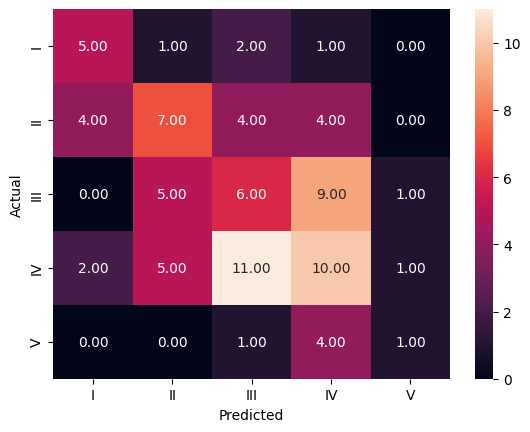

              precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.39      0.37      0.38        19
           2       0.25      0.29      0.27        21
           3       0.36      0.34      0.35        29
           4       0.33      0.17      0.22         6

    accuracy                           0.35        84
   macro avg       0.36      0.34      0.34        84
weighted avg       0.35      0.35      0.34        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.628743       0.476190   0.482333  0.476190   
2         RidgeClassifier        0.640719       0.488095   0.493527  0.488095   
3           KNNClassifier        0.670659       0.392857   0.398804  0.392857   
4                     SVC        0.607784       0.440476   0.391866  0.440476   
5  DecisionTreeClassifier        0.997006       0.333333   0.385872  0.333333   
6  RandomForestClassifier        0.988024       0.345238   0.346273  0.345238   

   F1-Score  Multi-Class Logloss  
1  0.477744             1.308967  
2  0.488857             1.000000  
3  0.389469            11.992172  
4  0.397295             1.312624  
5  0.332968            23.025851  
6  0.342833             4.800119

In [197]:
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)
rf_df = train_test_model(rfc_model, 'RandomForestClassifier', X_train, X_test, y_train, y_test, 'none', 6, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,rf_df])
result_2

BaggingClassifier(max_samples=0.75, n_estimators=30, oob_score=True,
                  random_state=1)
----------------------------------------------------------------


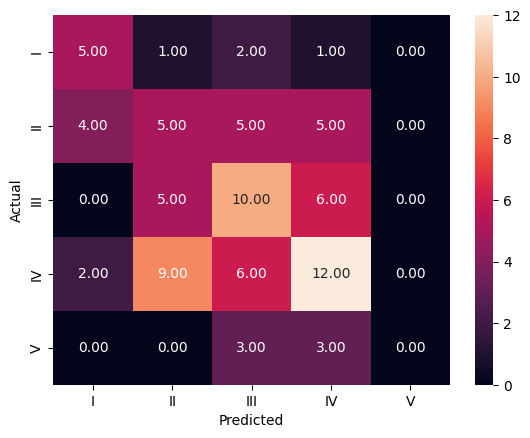

              precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.25      0.26      0.26        19
           2       0.38      0.48      0.43        21
           3       0.44      0.41      0.43        29
           4       0.00      0.00      0.00         6

    accuracy                           0.38        84
   macro avg       0.31      0.34      0.32        84
weighted avg       0.35      0.38      0.37        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.628743       0.476190   0.482333  0.476190   
2         RidgeClassifier        0.640719       0.488095   0.493527  0.488095   
3           KNNClassifier        0.670659       0.392857   0.398804  0.392857   
4                     SVC        0.607784       0.440476   0.391866  0.440476   
5  DecisionTreeClassifier        0.997006       0.333333   0.385872  0.333333   
6  RandomForestClassifier        0.988024       0.345238   0.346273  0.345238   
7       BaggingClassifier        0.994012       0.380952   0.354842  0.380952   

   F1-Score  Multi-Class Logloss  
1  0.477744             1.308967  
2  0.488857             1.000000  
3  0.389469            11.992172  
4  0.397295             1.312624  
5  0.332968            23.025851  
6  0.342833             4.800119  
7  0.365911             3.257853

In [198]:
bc = BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)
bc_df = train_test_model(bc, 'BaggingClassifier', X_train, X_test, y_train, y_test, 'none', 7, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,bc_df])
result_2

AdaBoostClassifier(learning_rate=0.25, n_estimators=100, random_state=1)
----------------------------------------------------------------


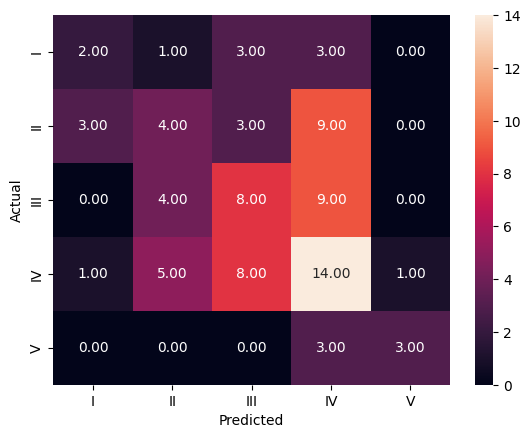

              precision    recall  f1-score   support

           0       0.33      0.22      0.27         9
           1       0.29      0.21      0.24        19
           2       0.36      0.38      0.37        21
           3       0.37      0.48      0.42        29
           4       0.75      0.50      0.60         6

    accuracy                           0.37        84
   macro avg       0.42      0.36      0.38        84
weighted avg       0.37      0.37      0.36        84



Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.628743       0.476190   0.482333  0.476190   
2         RidgeClassifier        0.640719       0.488095   0.493527  0.488095   
3           KNNClassifier        0.670659       0.392857   0.398804  0.392857   
4                     SVC        0.607784       0.440476   0.391866  0.440476   
5  DecisionTreeClassifier        0.997006       0.333333   0.385872  0.333333   
6  RandomForestClassifier        0.988024       0.345238   0.346273  0.345238   
7       BaggingClassifier        0.994012       0.380952   0.354842  0.380952   
8      AdaBoostClassifier        0.443114       0.369048   0.372014  0.369048   

   F1-Score  Multi-Class Logloss  
1  0.477744             1.308967  
2  0.488857             1.000000  
3  0.389469            11.992172  
4  0.397295             1.312624  
5  0.332968            23.025851  
6  0.342833             4.800119  
7  0.365911             3.257853  
8  0.363564             1.488130

In [199]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)
abc_df = train_test_model(abc, 'AdaBoostClassifier', X_train, X_test, y_train, y_test, 'none', 8, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,abc_df])
result_2

GradientBoostingClassifier(n_estimators=50, random_state=1,
                           validation_fraction=0.2)
----------------------------------------------------------------


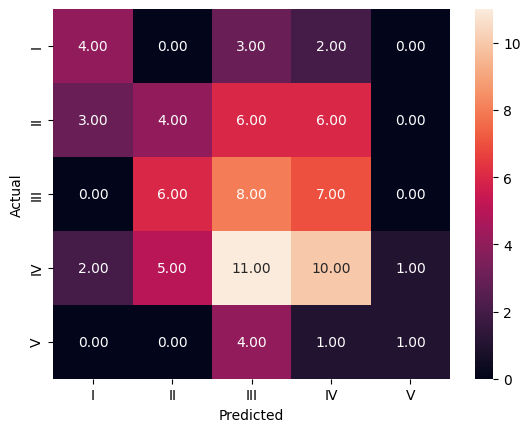

              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.27      0.21      0.24        19
           2       0.25      0.38      0.30        21
           3       0.38      0.34      0.36        29
           4       0.50      0.17      0.25         6

    accuracy                           0.32        84
   macro avg       0.37      0.31      0.32        84
weighted avg       0.34      0.32      0.32        84



Method  Train Accuracy  Test Accuracy  Precision  \
1          LogisticRegression        0.628743       0.476190   0.482333   
2             RidgeClassifier        0.640719       0.488095   0.493527   
3               KNNClassifier        0.670659       0.392857   0.398804   
4                         SVC        0.607784       0.440476   0.391866   
5      DecisionTreeClassifier        0.997006       0.333333   0.385872   
6      RandomForestClassifier        0.988024       0.345238   0.346273   
7           BaggingClassifier        0.994012       0.380952   0.354842   
8          AdaBoostClassifier        0.443114       0.369048   0.372014   
9  GradientBoostingClassifier        0.925150       0.321429   0.338935   

     Recall  F1-Score  Multi-Class Logloss  
1  0.476190  0.477744             1.308967  
2  0.488095  0.488857             1.000000  
3  0.392857  0.389469            11.992172  
4  0.440476  0.397295             1.312624  
5  0.333333  0.332968            23.025851  
6  0.345238  0.342833             4.800119  
7  0.380952  0.365911             3.257853  
8  0.369048  0.363564             1.488130  
9  0.321429  0.319710             1.536135

In [200]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, validation_fraction=0.2, random_state=1)
gbc_df = train_test_model(gbc, 'GradientBoostingClassifier', X_train, X_test, y_train, y_test, 'none', 9, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,gbc_df])
result_2

LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=1)
----------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 34
[LightGBM] [Info] Start training from score -2.227622
[LightGBM] [Info] Start training from score -1.480408
[LightGBM] [Info] Start training from score -1.368490
[LightGBM] [Info] Start training from score -1.092642
[LightGBM] [Info] Start training from score -2.592265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

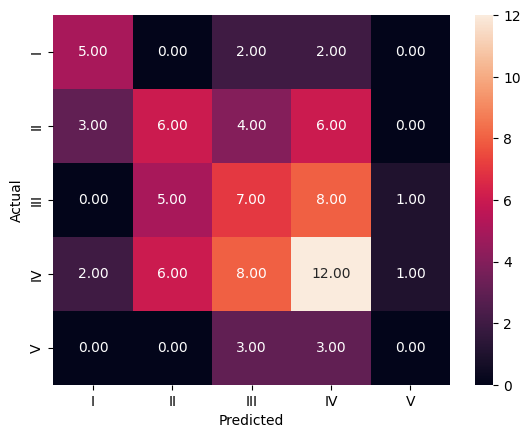

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.35      0.32      0.33        19
           2       0.29      0.33      0.31        21
           3       0.39      0.41      0.40        29
           4       0.00      0.00      0.00         6

    accuracy                           0.36        84
   macro avg       0.31      0.32      0.31        84
weighted avg       0.34      0.36      0.35        84



Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.628743       0.476190   0.482333   
2              RidgeClassifier        0.640719       0.488095   0.493527   
3                KNNClassifier        0.670659       0.392857   0.398804   
4                          SVC        0.607784       0.440476   0.391866   
5       DecisionTreeClassifier        0.997006       0.333333   0.385872   
6       RandomForestClassifier        0.988024       0.345238   0.346273   
7            BaggingClassifier        0.994012       0.380952   0.354842   
8           AdaBoostClassifier        0.443114       0.369048   0.372014   
9   GradientBoostingClassifier        0.925150       0.321429   0.338935   
10              LGBMClassifier        0.997006       0.357143   0.339961   

      Recall  F1-Score  Multi-Class Logloss  
1   0.476190  0.477744             1.308967  
2   0.488095  0.488857             1.000000  
3   0.392857  0.389469            11.992172  
4   0.440476  0.397295             1.312624  
5   0.333333  0.332968            23.025851  
6   0.345238  0.342833             4.800119  
7   0.380952  0.365911             3.257853  
8   0.369048  0.363564             1.488130  
9   0.321429  0.319710             1.536135  
10  0.357143  0.347661             2.049167

In [201]:
lgbm = LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")
lgbm_df = train_test_model(lgbm, 'LGBMClassifier', X_train, X_test, y_train, y_test, 'none', 10, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,lgbm_df])
result_2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)
----------------------------------------------------------------


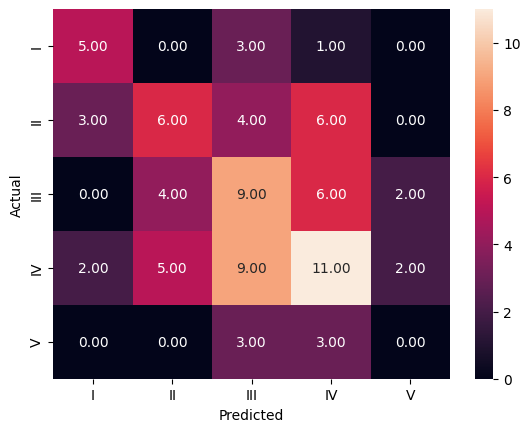

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.40      0.32      0.35        19
           2       0.32      0.43      0.37        21
           3       0.41      0.38      0.39        29
           4       0.00      0.00      0.00         6

    accuracy                           0.37        84
   macro avg       0.33      0.34      0.33        84
weighted avg       0.37      0.37      0.36        84



Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.628743       0.476190   0.482333   
2              RidgeClassifier        0.640719       0.488095   0.493527   
3                KNNClassifier        0.670659       0.392857   0.398804   
4                          SVC        0.607784       0.440476   0.391866   
5       DecisionTreeClassifier        0.997006       0.333333   0.385872   
6       RandomForestClassifier        0.988024       0.345238   0.346273   
7            BaggingClassifier        0.994012       0.380952   0.354842   
8           AdaBoostClassifier        0.443114       0.369048   0.372014   
9   GradientBoostingClassifier        0.925150       0.321429   0.338935   
10              LGBMClassifier        0.997006       0.357143   0.339961   
11               XGBClassifier        0.802395       0.369048   0.365057   

      Recall  F1-Score  Multi-Class Logloss  
1   0.476190  0.477744             1.308967  
2   0.488095  0.488857             1.000000  
3   0.392857  0.389469            11.992172  
4   0.440476  0.397295             1.312624  
5   0.333333  0.332968            23.025851  
6   0.345238  0.342833             4.800119  
7   0.380952  0.365911             3.257853  
8   0.369048  0.363564             1.488130  
9   0.321429  0.319710             1.536135  
10  0.357143  0.347661             2.049167  
11  0.369048  0.363689             1.365465

In [202]:
xgb = XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, colsample_bytree = 0.5)
xgb_df = train_test_model(xgb, 'XGBClassifier', X_train, X_test, y_train, y_test, 'none', 11, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,xgb_df])
result_2

In [203]:
for name, classifier in models:
    if name == 'LogisticRegression':
        lr_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lr_param_grid)
   # elif name == 'Ridge':
   #     ridge_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lasso_param_grid)
    elif name == 'KNeighborsClassifier':
        knn_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, knn_param_grid)
    elif name == 'SVC':
        svc_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, svc_param_grid)
    elif name == 'RandomForestClassifier':
        rf_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, rf_param_grid)
    elif name == 'BaggingClassifier':
        bag_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, bag_param_grid)
    elif name == 'AdaBoostClassifier':
        adb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, adb_param_grid)
    #elif name == 'GradientBoostingClassifier':
        #gb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, gb_param_grid)
    #elif name == 'LGBMClassifier':
        #lightgbm_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lightgbm_param_grid)
    #elif name == 'XGBClassifier':
        #xgb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, xgb_param_grid)

Best F1_Score: -1.326519 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
-1.326519 (0.075004) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
95% Confidence interval range: (-1.4765 %, -1.1765 %)
Total duration 44.42688751220703 

Best F1_Score: -2.215887 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
-2.215887 (0.753131) with: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
95% Confidence interval range: (-3.7221 %, -0.7096 %)
Total duration 15.185614824295044 

Best F1_Score: 0.000000 using {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
0.000000 (0.000000) with: {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
95% Confidence interval range: (0.0000 %, 0.0000 %)
Total duration 21.08329153060913 

Best F1_Score: -1.257589 using {'max_features': 'log2', 'n_estimators': 1000}
-1.257589 (0.102175) with: {'max_features': 'log2', 'n_estimators': 1000}
95% Confidence interval ra

LogisticRegression(C=0.1)
----------------------------------------------------------------


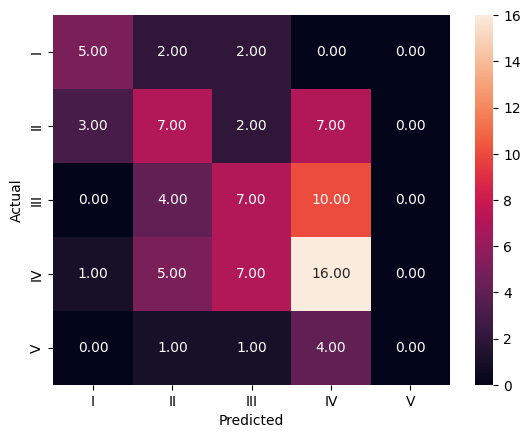

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.37      0.37      0.37        19
           2       0.37      0.33      0.35        21
           3       0.43      0.55      0.48        29
           4       0.00      0.00      0.00         6

    accuracy                           0.42        84
   macro avg       0.34      0.36      0.35        84
weighted avg       0.38      0.42      0.40        84



Method  Train Accuracy  Test Accuracy  \
1                      LogisticRegression        0.628743       0.476190   
2                         RidgeClassifier        0.640719       0.488095   
3                           KNNClassifier        0.670659       0.392857   
4                                     SVC        0.607784       0.440476   
5                  DecisionTreeClassifier        0.997006       0.333333   
6                  RandomForestClassifier        0.988024       0.345238   
7                       BaggingClassifier        0.994012       0.380952   
8                      AdaBoostClassifier        0.443114       0.369048   
9              GradientBoostingClassifier        0.925150       0.321429   
10                         LGBMClassifier        0.997006       0.357143   
11                          XGBClassifier        0.802395       0.369048   
12  Logistic Regression with GridSearchCV        0.535928       0.416667   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.482333  0.476190  0.477744             1.308967  
2    0.493527  0.488095  0.488857             1.000000  
3    0.398804  0.392857  0.389469            11.992172  
4    0.391866  0.440476  0.397295             1.312624  
5    0.385872  0.333333  0.332968            23.025851  
6    0.346273  0.345238  0.342833             4.800119  
7    0.354842  0.380952  0.365911             3.257853  
8    0.372014  0.369048  0.363564             1.488130  
9    0.338935  0.321429  0.319710             1.536135  
10   0.339961  0.357143  0.347661             2.049167  
11   0.365057  0.369048  0.363689             1.365465  
12   0.384255  0.416667  0.397745             1.278308

In [204]:
lrg = LogisticRegression(C = 0.1 , penalty = 'l2', solver = 'lbfgs')
lrg_df = train_test_model(lrg, 'Logistic Regression with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 12, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,lrg_df])
result_2

KNeighborsClassifier(metric='manhattan', n_neighbors=19)
----------------------------------------------------------------


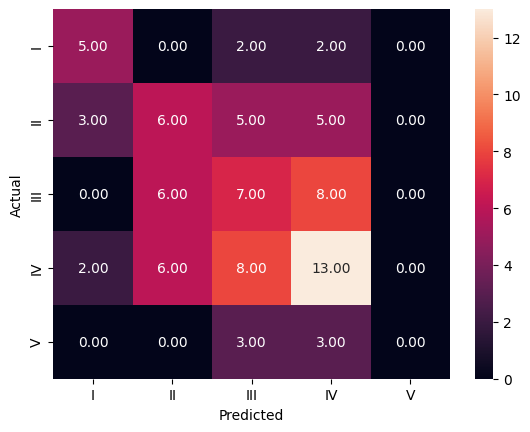

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.33      0.32      0.32        19
           2       0.28      0.33      0.30        21
           3       0.42      0.45      0.43        29
           4       0.00      0.00      0.00         6

    accuracy                           0.37        84
   macro avg       0.31      0.33      0.32        84
weighted avg       0.34      0.37      0.36        84



Method  Train Accuracy  Test Accuracy  \
1                      LogisticRegression        0.628743       0.476190   
2                         RidgeClassifier        0.640719       0.488095   
3                           KNNClassifier        0.670659       0.392857   
4                                     SVC        0.607784       0.440476   
5                  DecisionTreeClassifier        0.997006       0.333333   
6                  RandomForestClassifier        0.988024       0.345238   
7                       BaggingClassifier        0.994012       0.380952   
8                      AdaBoostClassifier        0.443114       0.369048   
9              GradientBoostingClassifier        0.925150       0.321429   
10                         LGBMClassifier        0.997006       0.357143   
11                          XGBClassifier        0.802395       0.369048   
12  Logistic Regression with GridSearchCV        0.535928       0.416667   
13   KNN Classification with GridSearchCV        0.476048       0.369048   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.482333  0.476190  0.477744             1.308967  
2    0.493527  0.488095  0.488857             1.000000  
3    0.398804  0.392857  0.389469            11.992172  
4    0.391866  0.440476  0.397295             1.312624  
5    0.385872  0.333333  0.332968            23.025851  
6    0.346273  0.345238  0.342833             4.800119  
7    0.354842  0.380952  0.365911             3.257853  
8    0.372014  0.369048  0.363564             1.488130  
9    0.338935  0.321429  0.319710             1.536135  
10   0.339961  0.357143  0.347661             2.049167  
11   0.365057  0.369048  0.363689             1.365465  
12   0.384255  0.416667  0.397745             1.278308  
13   0.343746  0.369048  0.355440             2.443731

In [205]:
knng = KNeighborsClassifier(metric = 'manhattan',n_neighbors = 19, weights = 'uniform')
knng_df = train_test_model(knng, 'KNN Classification with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 13, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,knng_df])
result_2

SVC(C=50, decision_function_shape='ovo', kernel='poly', probability=True)
----------------------------------------------------------------


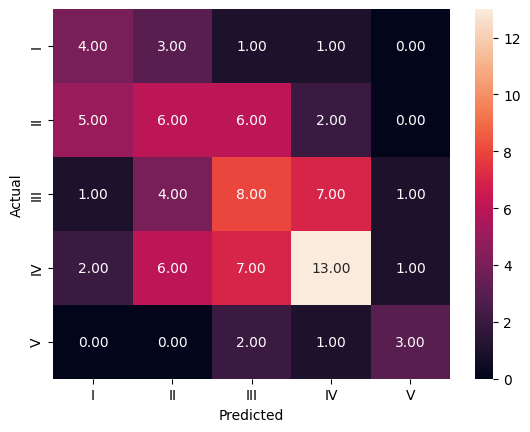

              precision    recall  f1-score   support

           0       0.33      0.44      0.38         9
           1       0.32      0.32      0.32        19
           2       0.33      0.38      0.36        21
           3       0.54      0.45      0.49        29
           4       0.60      0.50      0.55         6

    accuracy                           0.40        84
   macro avg       0.42      0.42      0.42        84
weighted avg       0.42      0.40      0.41        84



Method  Train Accuracy  Test Accuracy  \
1                      LogisticRegression        0.628743       0.476190   
2                         RidgeClassifier        0.640719       0.488095   
3                           KNNClassifier        0.670659       0.392857   
4                                     SVC        0.607784       0.440476   
5                  DecisionTreeClassifier        0.997006       0.333333   
6                  RandomForestClassifier        0.988024       0.345238   
7                       BaggingClassifier        0.994012       0.380952   
8                      AdaBoostClassifier        0.443114       0.369048   
9              GradientBoostingClassifier        0.925150       0.321429   
10                         LGBMClassifier        0.997006       0.357143   
11                          XGBClassifier        0.802395       0.369048   
12  Logistic Regression with GridSearchCV        0.535928       0.416667   
13   KNN Classification with GridSearchCV        0.476048       0.369048   
14                  SVC with GridSearchCV        0.997006       0.404762   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.482333  0.476190  0.477744             1.308967  
2    0.493527  0.488095  0.488857             1.000000  
3    0.398804  0.392857  0.389469            11.992172  
4    0.391866  0.440476  0.397295             1.312624  
5    0.385872  0.333333  0.332968            23.025851  
6    0.346273  0.345238  0.342833             4.800119  
7    0.354842  0.380952  0.365911             3.257853  
8    0.372014  0.369048  0.363564             1.488130  
9    0.338935  0.321429  0.319710             1.536135  
10   0.339961  0.357143  0.347661             2.049167  
11   0.365057  0.369048  0.363689             1.365465  
12   0.384255  0.416667  0.397745             1.278308  
13   0.343746  0.369048  0.355440             2.443731  
14   0.420337  0.404762  0.409457             1.366742

In [206]:
clfg = svm.SVC(C= 50,decision_function_shape = 'ovo', gamma ='scale', kernel='poly', probability=True)
svmg_df = train_test_model(clfg, 'SVC with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 14, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,svmg_df])
result_2

RandomForestClassifier(n_estimators=1000)
----------------------------------------------------------------


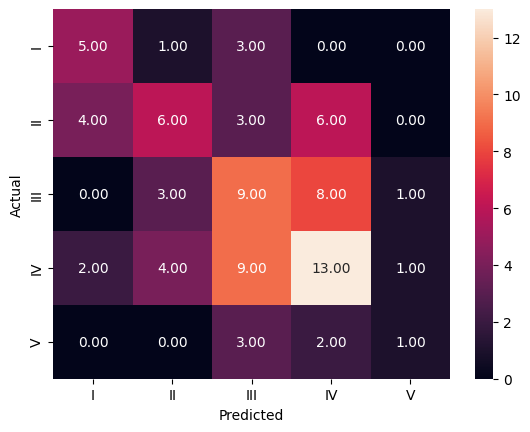

              precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.43      0.32      0.36        19
           2       0.33      0.43      0.38        21
           3       0.45      0.45      0.45        29
           4       0.33      0.17      0.22         6

    accuracy                           0.40        84
   macro avg       0.40      0.38      0.38        84
weighted avg       0.41      0.40      0.40        84



Method  Train Accuracy  Test Accuracy  \
1                         LogisticRegression        0.628743       0.476190   
2                            RidgeClassifier        0.640719       0.488095   
3                              KNNClassifier        0.670659       0.392857   
4                                        SVC        0.607784       0.440476   
5                     DecisionTreeClassifier        0.997006       0.333333   
6                     RandomForestClassifier        0.988024       0.345238   
7                          BaggingClassifier        0.994012       0.380952   
8                         AdaBoostClassifier        0.443114       0.369048   
9                 GradientBoostingClassifier        0.925150       0.321429   
10                            LGBMClassifier        0.997006       0.357143   
11                             XGBClassifier        0.802395       0.369048   
12     Logistic Regression with GridSearchCV        0.535928       0.416667   
13      KNN Classification with GridSearchCV        0.476048       0.369048   
14                     SVC with GridSearchCV        0.997006       0.404762   
15  RandomForestClassifier with GridSearchCV        0.997006       0.404762   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.482333  0.476190  0.477744             1.308967  
2    0.493527  0.488095  0.488857             1.000000  
3    0.398804  0.392857  0.389469            11.992172  
4    0.391866  0.440476  0.397295             1.312624  
5    0.385872  0.333333  0.332968            23.025851  
6    0.346273  0.345238  0.342833             4.800119  
7    0.354842  0.380952  0.365911             3.257853  
8    0.372014  0.369048  0.363564             1.488130  
9    0.338935  0.321429  0.319710             1.536135  
10   0.339961  0.357143  0.347661             2.049167  
11   0.365057  0.369048  0.363689             1.365465  
12   0.384255  0.416667  0.397745             1.278308  
13   0.343746  0.369048  0.355440             2.443731  
14   0.420337  0.404762  0.409457             1.366742  
15   0.407545  0.404762  0.400207             1.379289

In [207]:
rfc_g_model = RandomForestClassifier(max_features = 'sqrt', n_estimators=1000)
rfsg_df = train_test_model(rfc_g_model, 'RandomForestClassifier with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 15, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,rfsg_df])
result_2

BaggingClassifier(max_samples=0.7, n_estimators=1000)
----------------------------------------------------------------


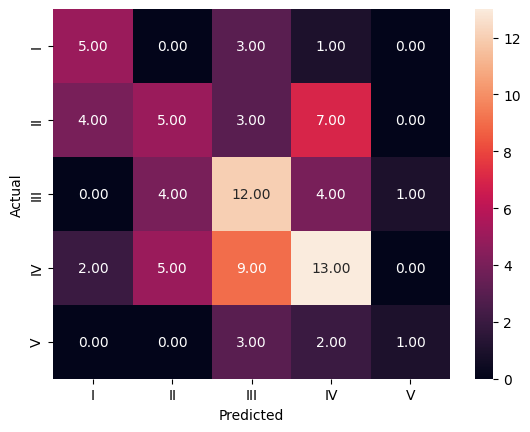

              precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.36      0.26      0.30        19
           2       0.40      0.57      0.47        21
           3       0.48      0.45      0.46        29
           4       0.50      0.17      0.25         6

    accuracy                           0.43        84
   macro avg       0.44      0.40      0.40        84
weighted avg       0.43      0.43      0.42        84



Method  Train Accuracy  Test Accuracy  \
1                         LogisticRegression        0.628743       0.476190   
2                            RidgeClassifier        0.640719       0.488095   
3                              KNNClassifier        0.670659       0.392857   
4                                        SVC        0.607784       0.440476   
5                     DecisionTreeClassifier        0.997006       0.333333   
6                     RandomForestClassifier        0.988024       0.345238   
7                          BaggingClassifier        0.994012       0.380952   
8                         AdaBoostClassifier        0.443114       0.369048   
9                 GradientBoostingClassifier        0.925150       0.321429   
10                            LGBMClassifier        0.997006       0.357143   
11                             XGBClassifier        0.802395       0.369048   
12     Logistic Regression with GridSearchCV        0.535928       0.416667   
13      KNN Classification with GridSearchCV        0.476048       0.369048   
14                     SVC with GridSearchCV        0.997006       0.404762   
15  RandomForestClassifier with GridSearchCV        0.997006       0.404762   
16       BaggingClassifier with GridSearchCV        0.997006       0.428571   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.482333  0.476190  0.477744             1.308967  
2    0.493527  0.488095  0.488857             1.000000  
3    0.398804  0.392857  0.389469            11.992172  
4    0.391866  0.440476  0.397295             1.312624  
5    0.385872  0.333333  0.332968            23.025851  
6    0.346273  0.345238  0.342833             4.800119  
7    0.354842  0.380952  0.365911             3.257853  
8    0.372014  0.369048  0.363564             1.488130  
9    0.338935  0.321429  0.319710             1.536135  
10   0.339961  0.357143  0.347661             2.049167  
11   0.365057  0.369048  0.363689             1.365465  
12   0.384255  0.416667  0.397745             1.278308  
13   0.343746  0.369048  0.355440             2.443731  
14   0.420337  0.404762  0.409457             1.366742  
15   0.407545  0.404762  0.400207             1.379289  
16   0.431424  0.428571  0.417907             1.435174

In [208]:
bc_g = BaggingClassifier(n_estimators=1000, max_samples=0.7)
bc_g_df = train_test_model(bc_g, 'BaggingClassifier with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 16, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,bc_g_df])
result_2

AdaBoostClassifier(learning_rate=0.1, n_estimators=30)
----------------------------------------------------------------


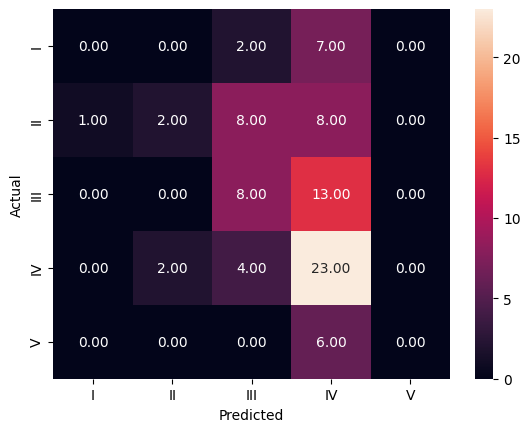

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.50      0.11      0.17        19
           2       0.36      0.38      0.37        21
           3       0.40      0.79      0.53        29
           4       0.00      0.00      0.00         6

    accuracy                           0.39        84
   macro avg       0.25      0.26      0.22        84
weighted avg       0.34      0.39      0.32        84



Method  Train Accuracy  Test Accuracy  \
1                         LogisticRegression        0.628743       0.476190   
2                            RidgeClassifier        0.640719       0.488095   
3                              KNNClassifier        0.670659       0.392857   
4                                        SVC        0.607784       0.440476   
5                     DecisionTreeClassifier        0.997006       0.333333   
6                     RandomForestClassifier        0.988024       0.345238   
7                          BaggingClassifier        0.994012       0.380952   
8                         AdaBoostClassifier        0.443114       0.369048   
9                 GradientBoostingClassifier        0.925150       0.321429   
10                            LGBMClassifier        0.997006       0.357143   
11                             XGBClassifier        0.802395       0.369048   
12     Logistic Regression with GridSearchCV        0.535928       0.416667   
13      KNN Classification with GridSearchCV        0.476048       0.369048   
14                     SVC with GridSearchCV        0.997006       0.404762   
15  RandomForestClassifier with GridSearchCV        0.997006       0.404762   
16       BaggingClassifier with GridSearchCV        0.997006       0.428571   
17      AdaBoostClassifier with GridSearchCV        0.398204       0.392857   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.482333  0.476190  0.477744             1.308967  
2    0.493527  0.488095  0.488857             1.000000  
3    0.398804  0.392857  0.389469            11.992172  
4    0.391866  0.440476  0.397295             1.312624  
5    0.385872  0.333333  0.332968            23.025851  
6    0.346273  0.345238  0.342833             4.800119  
7    0.354842  0.380952  0.365911             3.257853  
8    0.372014  0.369048  0.363564             1.488130  
9    0.338935  0.321429  0.319710             1.536135  
10   0.339961  0.357143  0.347661             2.049167  
11   0.365057  0.369048  0.363689             1.365465  
12   0.384255  0.416667  0.397745             1.278308  
13   0.343746  0.369048  0.355440             2.443731  
14   0.420337  0.404762  0.409457             1.366742  
15   0.407545  0.404762  0.400207             1.379289  
16   0.431424  0.428571  0.417907             1.435174  
17   0.343311  0.392857  0.317023             1.403170

In [209]:
abc_g = AdaBoostClassifier(n_estimators=30, learning_rate=0.1)
abc_g_df = train_test_model(abc_g, 'AdaBoostClassifier with GridSearchCV', X_train, X_test, y_train, y_test, 'none', 17, 'no', 'yes', 'no')
result_2 = pd.concat([result_2,abc_g_df])
result_2

#### Step 9: Design, train and test Neural networks classifiers



In [210]:
tf.get_logger().setLevel('ERROR')

In [211]:
def get_classification_metrics(model, X_test, y_test, target_type):

  yhat_probs = model.predict(X_test, verbose=0)

  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0)
    model_crmc = classification_report(y_test_dummy, yhat_classes)
    print(model_crmc)
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round()
    model_crml = classification_report(y_test_dummy, yhat_classes)
    print(model_crml)

  yhat_probs = yhat_probs[:, 0]

  accuracy = accuracy_score(y_test, yhat_classes)

  precision = precision_score(y_test, yhat_classes, average='micro')

  recall = recall_score(y_test, yhat_classes, average='micro')

  f1 = f1_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall, f1

In [212]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel


        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        return

In [213]:
from keras.models import Sequential
from keras.layers import Input, Embedding, Flatten, Dense, Dropout, LSTM, BatchNormalization, Bidirectional, GlobalMaxPool1D, Concatenate, Attention
from tensorflow.keras.layers import Conv1D, RepeatVector, SimpleRNN, Lambda
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras.utils import plot_model
from sklearn.ensemble import IsolationForest
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.text import Tokenizer

In [214]:
from tensorflow.python.framework.random_seed import set_random_seed

In [215]:
import os

In [216]:
os.environ['HV_DOC_HTML'] = 'true'

def _render(self, **kw):
  hv.extension('bokeh')
  return hv.Store.render(self)
hv.core.Dimensioned._repr_mimebundle_ = _render

In [217]:
os.environ['PYTHONHASHSEED']=str(7)

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(7)

   tf.random.set_seed(7)



!rm -R log/

rm: cannot remove 'log/': No such file or directory


In [335]:
reset_random_seeds()
param = 1e-4

model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(param),
                kernel_constraint=unit_norm()))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(param),
                kernel_constraint=unit_norm())) # Multilabel


opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train, y_train_dummy, target_type))

train_hist = model.fit(X_train, y_train_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - categorical_accuracy: 0.2956 - loss: 1.9483 - val_categorical_accuracy: 0.6905 - val_loss: 1.3812 - learning_rate: 0.0010
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.4070 - loss: 1.6136 - val_categorical_accuracy: 0.7381 - val_loss: 1.1627 - learning_rate: 0.0010
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.5418 - loss: 1.3825 - val_categorical_accuracy: 0.7381 - val_loss: 1.0502 - learning_rate: 0.0010
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.6203 - loss: 1.1840 - val_categorical_accuracy: 0.7381 - val_loss: 0.9830 - learning_rate: 0.0010
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.6484 - loss: 1.0404 - 

In [336]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 10)                  │             870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,192 (8.57 KB)

 Trainable params: 1,075 (4.20 KB)

 Non-trainable params: 40 (160.00 B)

 Optimizer params: 1,077 (4.21 KB)

In [337]:
_, train_accuracy = model.evaluate(X_train, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 72.62


In [338]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

   micro avg       0.73      0.71      0.72        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.71      0.62        84
 samples avg       0.71      0.71      0.71        84

Accuracy: 0.714286
Precision: 0.731707
Recall: 0.714286
F1 score: 0.722892


Here though Train/Test Accurancy and Precision, Recall and F1 score is good but at class level perforamce is not good.

Text(0.5, 1.0, 'Training and validation loss')

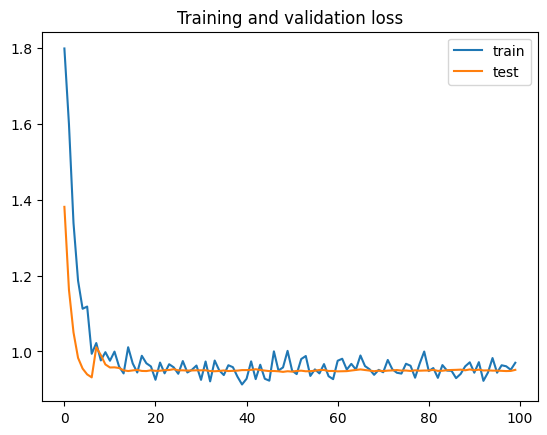

In [339]:
epochs = range(len(train_hist.history['loss']))

plt.plot(epochs, train_hist.history['loss'], label = 'train')
plt.plot(epochs, train_hist.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

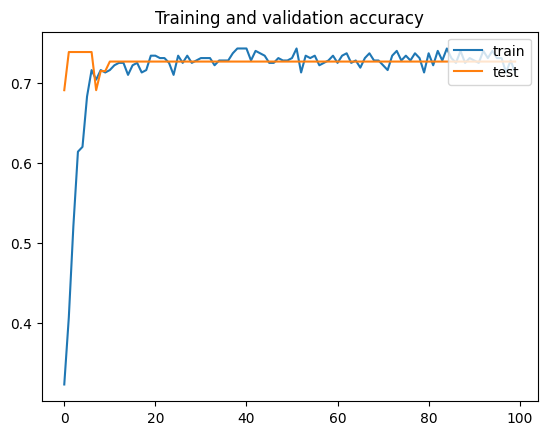

In [340]:
plt.plot(epochs, train_hist.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, train_hist.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [224]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.weights.h5")
print("Saved model weights to disk")

model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


In [225]:
reset_random_seeds()
param = 1e-4

model = Sequential()

model.add(Dense(10, input_dim=X_train_smote.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(param),
                kernel_constraint=unit_norm())) # Multilabel


opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train_smote, y_train_smote_dummy, target_type))

train_hist = model.fit(X_train_smote, y_train_smote_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - categorical_accuracy: 0.1919 - loss: 1.9077 - val_categorical_accuracy: 0.2024 - val_loss: 1.5729 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2088 - loss: 1.7503 - val_categorical_accuracy: 0.2143 - val_loss: 1.5701 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.2783 - loss: 1.6344 - val_categorical_accuracy: 0.2024 - val_loss: 1.6732 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2431 - loss: 1.6547 - val_categorical_accuracy: 0.1548 - val_loss: 1.8250 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2914 - loss: 1.6784 - 

In [226]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,192 (8.57 KB)

 Trainable params: 1,075 (4.20 KB)

 Non-trainable params: 40 (160.00 B)

 Optimizer params: 1,077 (4.21 KB)

In [227]:
_, train_accuracy = model.evaluate(X_train_smote, y_train_smote_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 46.61
Test accuracy: 14.29


In [228]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

   micro avg       0.00      0.00      0.00        84
   macro avg       0.00      0.00      0.00        84
weighted avg       0.00      0.00      0.00        84
 samples avg       0.00      0.00      0.00        84

Accuracy: 0.000000
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


Here with adding synthetic dat with SMOTE
the Train/Test Accurancy and Precision, Recall and F1 score became poor and  at class level perforamce is not good.

Text(0.5, 1.0, 'Training and validation loss')

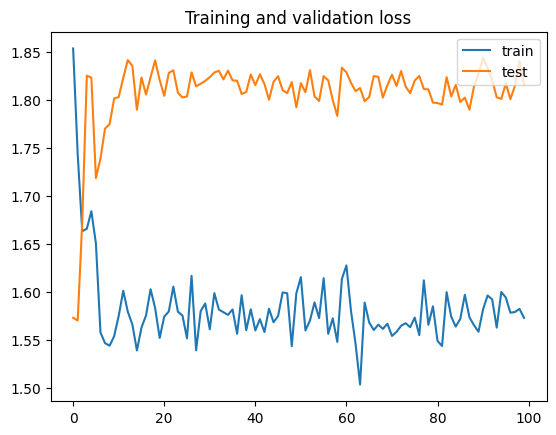

In [229]:
epochs = range(len(train_hist.history['loss']))

plt.plot(epochs, train_hist.history['loss'], label = 'train')
plt.plot(epochs, train_hist.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

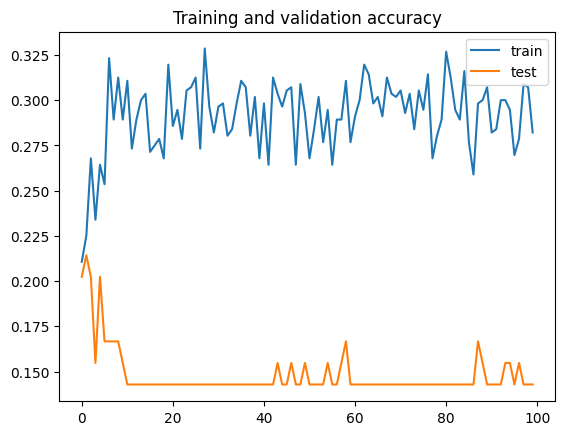

In [230]:
plt.plot(epochs, train_hist.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, train_hist.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [231]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.weights.h5")
print("Saved model weights to disk")

model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


Step 10 - ANN & RNN Classifier - Phase I

ANN Classifier

In [232]:
seed = 10
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [233]:
columns_to_drop = ['Accident Level', 'Potential Accident Level']
X_structured = industry_feature_df.drop(columns=columns_to_drop)
y = industry_feature_df['Accident Level']

In [234]:
descriptions = data['NLP_Preprocessed_Description']

In [235]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(descriptions)
description_sequences = tokenizer.texts_to_sequences(descriptions)
padded_descriptions = pad_sequences(description_sequences, maxlen=200)

In [236]:
#from tensorflow.python.keras.utils import np_utils
from keras.utils import to_categorical

In [237]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [238]:
smote = SMOTE(random_state=seed)
X_structured_smote, y_smote = smote.fit_resample(X_structured, np.argmax(y, axis=1))

indices = smote.fit_resample(np.arange(len(padded_descriptions)).reshape(-1, 1), np.argmax(y, axis=1))[0].flatten()
padded_descriptions_smote = padded_descriptions[indices]

y_smote = to_categorical(y_smote)

In [239]:
X_train_structured, X_test_structured, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_structured_smote, padded_descriptions_smote, y_smote, test_size=0.2, random_state=seed, stratify=y_smote.argmax(axis=1)
)

scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train_structured.iloc[:, :] = pipeline.fit_transform(X_train_structured)
X_test_structured.iloc[:, :] = pipeline.transform(X_test_structured)

In [240]:
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_smote, axis=1)), y=np.argmax(y_smote, axis=1))
class_weights = dict(enumerate(class_weights))

initial_lr = 0.001
lr_schedule = lambda epoch: initial_lr * 0.95**epoch
lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [241]:
input_text = Input(shape=(200,), name="Text_Input")

embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)(input_text)
flatten_text = Flatten()(embedding)
batch_norm_text = BatchNormalization()(flatten_text)

input_structured = Input(shape=(X_train_structured.shape[1],), name="Structured_Input")
batch_norm_structured = BatchNormalization()(input_structured)

concat = Concatenate()([batch_norm_text, batch_norm_structured])

dense1 = Dense(128, activation='relu', kernel_regularizer='l2')(concat)
dropout1 = Dropout(0.4)(dense1)
dense2 = Dense(128, activation='relu', kernel_regularizer='l2')(dropout1)
dropout2 = Dropout(0.4)(dense2)

output = Dense(y_train.shape[1], activation='softmax')(dropout2)

model_ann = Model(inputs=[input_text, input_structured], outputs=output)
model_ann.compile(
    optimizer=Adam(learning_rate=initial_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [242]:
history_ann = model_ann.fit(
    [X_train_text, X_train_structured], y_train,
    validation_data=([X_test_text, X_test_structured], y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.2123 - loss: 4.7000 - val_accuracy: 0.3333 - val_loss: 3.6715 - learning_rate: 0.0010
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3705 - loss: 3.7163 - val_accuracy: 0.4693 - val_loss: 3.4315 - learning_rate: 9.5000e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4387 - loss: 3.3440 - val_accuracy: 0.5663 - val_loss: 3.1507 - learning_rate: 9.0250e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5119 - loss: 2.9750 - val_accuracy: 0.5761 - val_loss: 2.9234 - learning_rate: 8.5737e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5482 - loss: 2.7035 - val_accuracy: 0.6149 - val_loss: 2.7041 - learning_rate: 8.1451e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5999 - loss: 2.4050 - val_accuracy: 0.6472 - val_loss: 2.5160 - learning_rate: 7.7378e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5966 -

In [243]:
loss_ann, accuracy_ann = model_ann.evaluate(
    [X_test_text, X_test_structured], y_test, verbose=1
)
print(f"Test Accuracy (ANN): {accuracy_ann * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6093 - loss: 1.7867 
Test Accuracy (ANN): 62.46%


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.60        62
           1       0.54      0.40      0.46        62
           2       0.58      0.61      0.59        61
           3       0.64      0.58      0.61        62
           4       0.73      0.92      0.81        62

    accuracy                           0.62       309
   macro avg       0.62      0.62      0.62       309
weighted avg       0.62      0.62      0.62       309


Confusion Matrix:


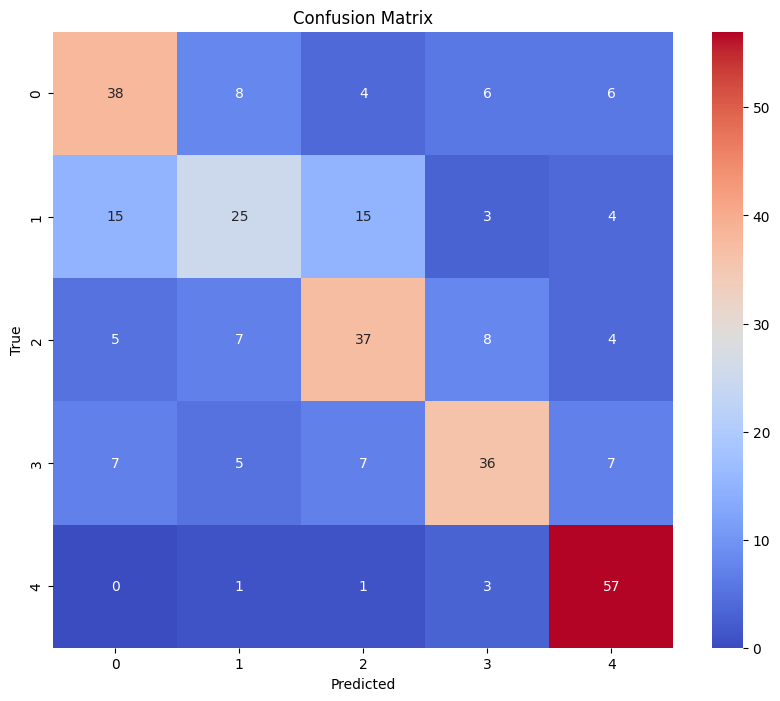

In [244]:
y_pred = np.argmax(model_ann.predict([X_test_text, X_test_structured]), axis=1)
y_true = np.argmax(y_test, axis=1)

class_names = [str(cls) for cls in label_encoder.classes_]
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

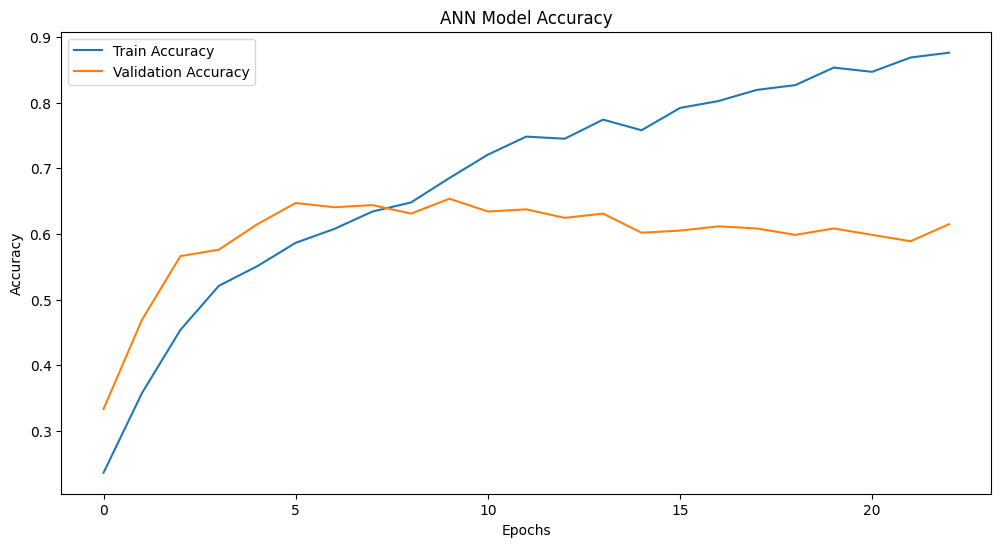

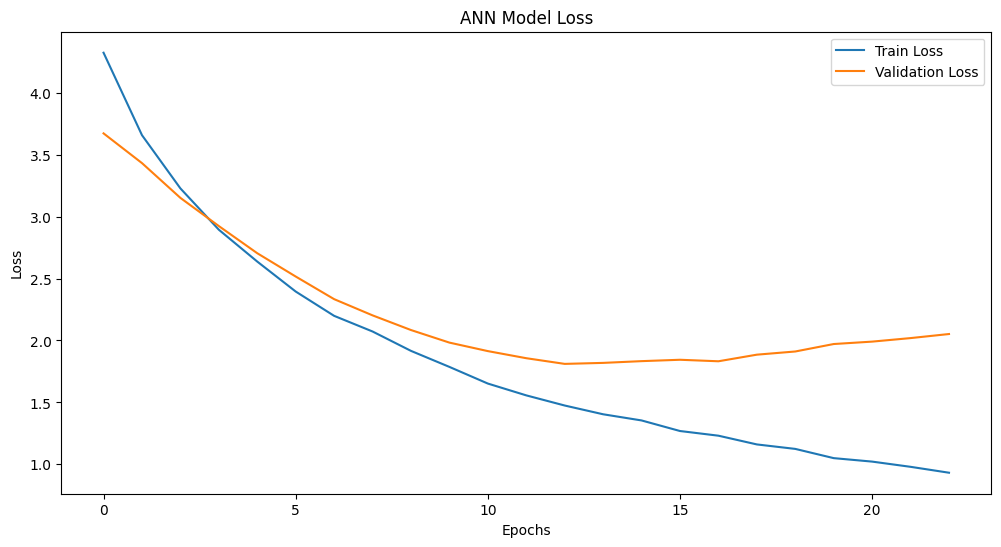

In [245]:
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

RNN Classifier

In [246]:
seed = 10
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [247]:
columns_to_drop = ['Accident Level', 'Potential Accident Level']
X_structured = industry_feature_df.drop(columns=columns_to_drop)
y = industry_feature_df['Accident Level']

In [248]:
descriptions = data['NLP_Preprocessed_Description']

In [249]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(descriptions)
description_sequences = tokenizer.texts_to_sequences(descriptions)
padded_descriptions = pad_sequences(description_sequences, maxlen=200)

In [250]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [251]:
smote = SMOTE(random_state=seed)
X_structured_smote, y_smote = smote.fit_resample(X_structured, np.argmax(y, axis=1))

indices = smote.fit_resample(np.arange(len(padded_descriptions)).reshape(-1, 1), np.argmax(y, axis=1))[0].flatten()
padded_descriptions_smote = padded_descriptions[indices]

y_smote = to_categorical(y_smote)

In [252]:
X_train_structured, X_test_structured, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_structured_smote, padded_descriptions_smote, y_smote, test_size=0.2, random_state=seed, stratify=y_smote.argmax(axis=1)
)

scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train_structured.iloc[:, :] = pipeline.fit_transform(X_train_structured)
X_test_structured.iloc[:, :] = pipeline.transform(X_test_structured)

In [253]:
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_smote, axis=1)), y=np.argmax(y_smote, axis=1))
class_weights = dict(enumerate(class_weights))

initial_lr = 0.001
lr_schedule = lambda epoch: initial_lr * 0.95**epoch
lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [254]:
input_structured = Input(shape=(X_train_structured.shape[1],), name="Structured_Input")
batch_norm_structured = BatchNormalization()(input_structured)

rnn_input = Lambda(lambda x: tf.expand_dims(x, -1))(batch_norm_structured)

rnn = SimpleRNN(128, return_sequences=False)(rnn_input)

dense1 = Dense(128, activation='relu', kernel_regularizer='l2')(rnn)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(128, activation='relu', kernel_regularizer='l2')(dropout1)
dropout2 = Dropout(0.3)(dense2)
output = Dense(y_train.shape[1], activation='softmax')(dropout2)

model_rnn = Model(inputs=input_structured, outputs=output)

model_rnn.compile(
    optimizer=Adam(learning_rate=initial_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [255]:
# Training the model
history_rnn = model_rnn.fit(
    X_train_structured, y_train,
    validation_data=(X_test_structured, y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.3187 - loss: 3.8190 - val_accuracy: 0.6278 - val_loss: 2.8899 - learning_rate: 0.0010
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5069 - loss: 2.8247 - val_accuracy: 0.4563 - val_loss: 2.4500 - learning_rate: 9.5000e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4802 - loss: 2.4037 - val_accuracy: 0.6019 - val_loss: 1.9958 - learning_rate: 9.0250e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5604 - loss: 1.9916 - val_accuracy: 0.5858 - val_loss: 1.8031 - learning_rate: 8.5737e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5751 - loss: 1.7759 - val_accuracy: 0.6602 - val_loss: 1.4905 - learning_rate: 8.1451e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6339 - loss: 1.5187 - val_accuracy: 0.6828 - val_loss: 1.3167 - learning_rate: 7.7378e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.

In [256]:
# Evaluate the LSTM model
loss_model_rnn, accuracy_model_rnn = model_rnn.evaluate(X_test_structured, y_test, verbose=1)
print(f"Test Accuracy (RNN): {accuracy_model_rnn * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8790 - loss: 0.5542 
Test Accuracy (RNN): 86.73%


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        62
           1       0.78      0.85      0.82        62
           2       0.92      0.98      0.95        61
           3       0.88      0.90      0.89        62
           4       0.95      0.98      0.97        62

    accuracy                           0.87       309
   macro avg       0.86      0.87      0.86       309
weighted avg       0.86      0.87      0.86       309


Confusion Matrix:


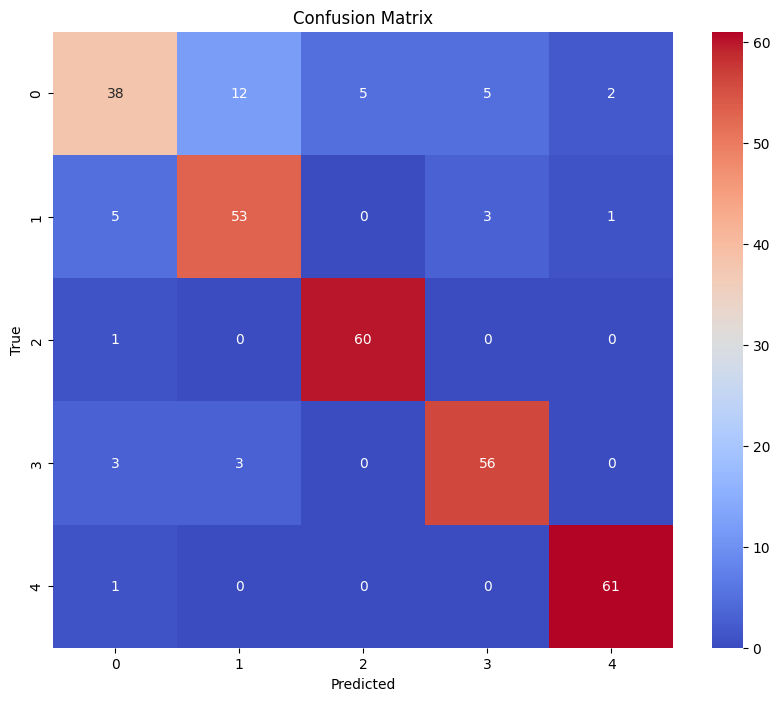

In [257]:
# Classification Report and Confusion Matrix
y_pred = model_rnn.predict(X_test_structured)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[str(cls) for cls in label_encoder.classes_]))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

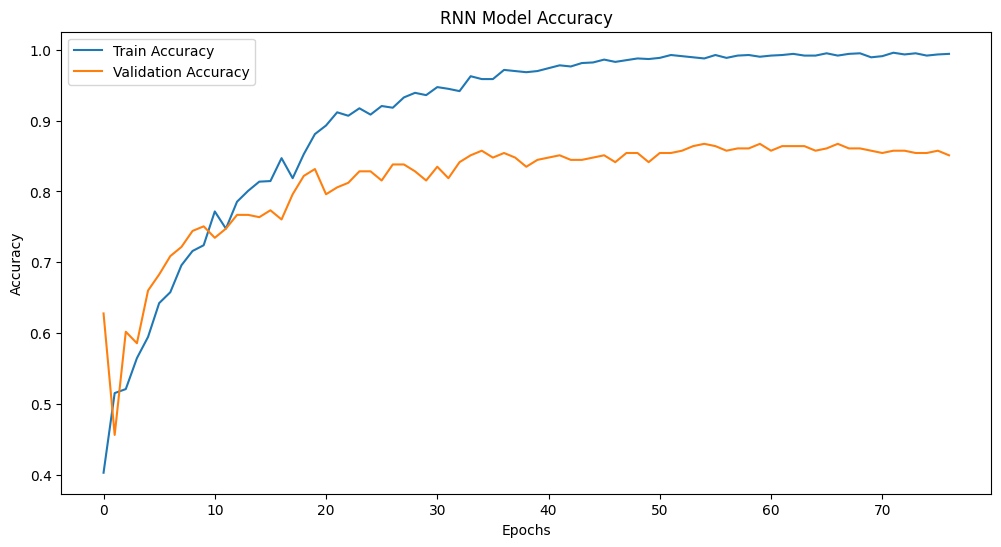

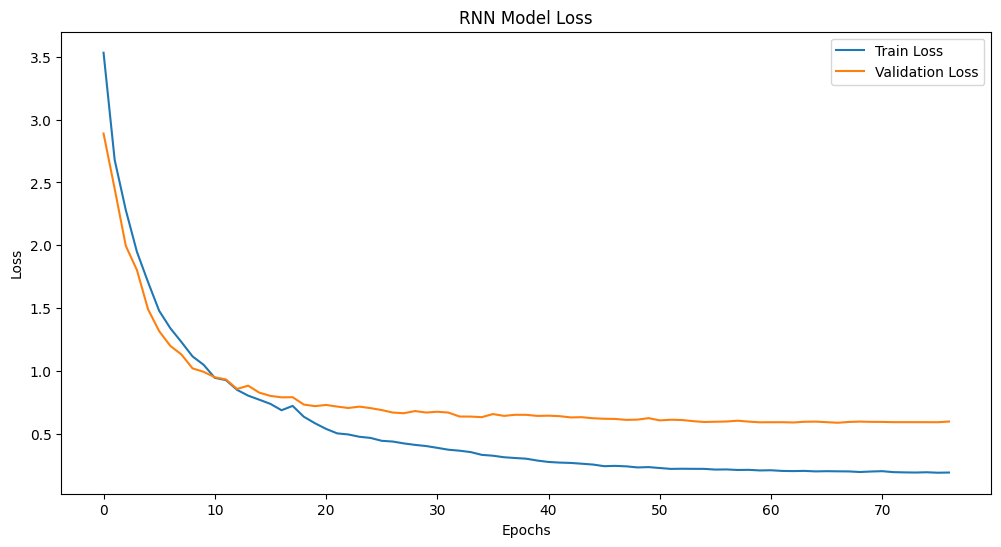

In [258]:
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

LSTM Classifier

In [259]:
seed = 10
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [260]:
columns_to_drop = ['Accident Level', 'Potential Accident Level']
X_structured = industry_feature_df.drop(columns=columns_to_drop)
y = industry_feature_df['Accident Level']

In [261]:
descriptions = data['NLP_Preprocessed_Description']

In [262]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(descriptions)
description_sequences = tokenizer.texts_to_sequences(descriptions)
padded_descriptions = pad_sequences(description_sequences, maxlen=200)

In [263]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [264]:
smote = SMOTE(random_state=seed)
X_structured_smote, y_smote = smote.fit_resample(X_structured, np.argmax(y, axis=1))

indices = smote.fit_resample(np.arange(len(padded_descriptions)).reshape(-1, 1), np.argmax(y, axis=1))[0].flatten()
padded_descriptions_smote = padded_descriptions[indices]

y_smote = to_categorical(y_smote)

In [265]:
X_train_structured, X_test_structured, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_structured_smote, padded_descriptions_smote, y_smote, test_size=0.2, random_state=seed, stratify=y_smote.argmax(axis=1)
)

scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train_structured.iloc[:, :] = pipeline.fit_transform(X_train_structured)
X_test_structured.iloc[:, :] = pipeline.transform(X_test_structured)

In [266]:
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_smote, axis=1)), y=np.argmax(y_smote, axis=1))
class_weights = dict(enumerate(class_weights))

initial_lr = 0.001
lr_schedule = lambda epoch: initial_lr * 0.95**epoch
lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [267]:
input_structured = Input(shape=(X_train_structured.shape[1],), name="Structured_Input")
batch_norm_structured = BatchNormalization()(input_structured)

lstm_input = Lambda(lambda x: tf.expand_dims(x, -1))(batch_norm_structured)

lstm = LSTM(128, return_sequences=False)(lstm_input)

dense1 = Dense(128, activation='relu', kernel_regularizer='l2')(lstm)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(128, activation='relu', kernel_regularizer='l2')(dropout1)
dropout2 = Dropout(0.3)(dense2)
output = Dense(y_train.shape[1], activation='softmax')(dropout2)

model_lstm = Model(inputs=input_structured, outputs=output)

model_lstm.compile(
    optimizer=Adam(learning_rate=initial_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [268]:
# Training the model
history_lstm = model_lstm.fit(
    X_train_structured, y_train,
    validation_data=(X_test_structured, y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.2493 - loss: 3.7320 - val_accuracy: 0.3172 - val_loss: 2.7127 - learning_rate: 0.0010
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2549 - loss: 2.5249 - val_accuracy: 0.3398 - val_loss: 2.0767 - learning_rate: 9.5000e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3228 - loss: 1.9955 - val_accuracy: 0.3398 - val_loss: 1.7612 - learning_rate: 9.0250e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3785 - loss: 1.7033 - val_accuracy: 0.4045 - val_loss: 1.5795 - learning_rate: 8.5737e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3932 - loss: 1.5659 - val_accuracy: 0.4272 - val_loss: 1.4848 - learning_rate: 8.1451e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4186 - loss: 1.4595 - val_accuracy: 0.4337 - val_loss: 1.4734 - learning_rate: 7.7378e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4368 

In [269]:
loss_model_lstm, accuracy_model_lstm = model_lstm.evaluate(X_test_structured, y_test, verbose=1)
print(f"Test Accuracy (LSTM): {accuracy_model_lstm * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.9132 
Test Accuracy (LSTM): 66.34%


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.77      0.68        62
           1       0.54      0.42      0.47        62
           2       0.66      0.62      0.64        61
           3       0.64      0.55      0.59        62
           4       0.84      0.95      0.89        62

    accuracy                           0.66       309
   macro avg       0.66      0.66      0.65       309
weighted avg       0.66      0.66      0.65       309


Confusion Matrix:


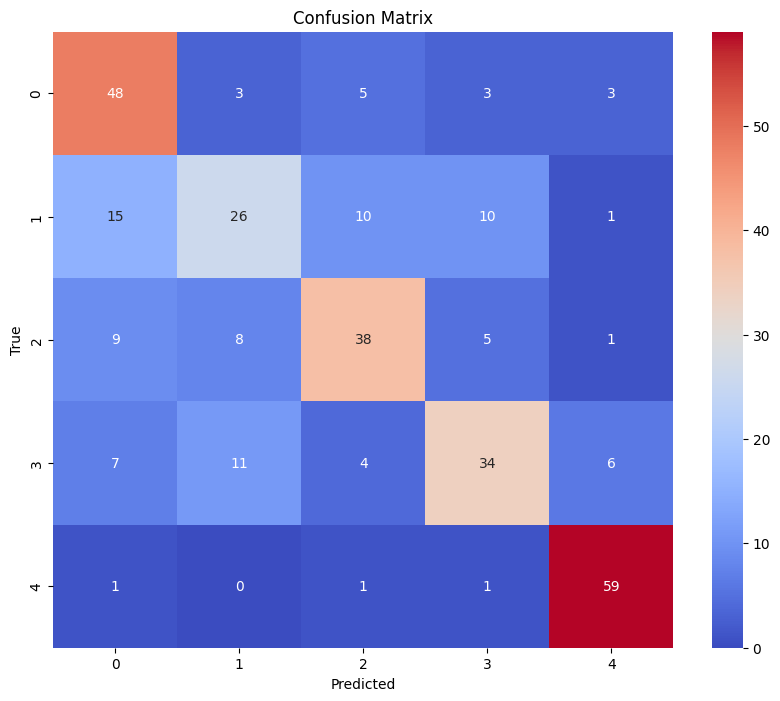

In [270]:
y_pred = model_lstm.predict(X_test_structured)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[str(cls) for cls in label_encoder.classes_]))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

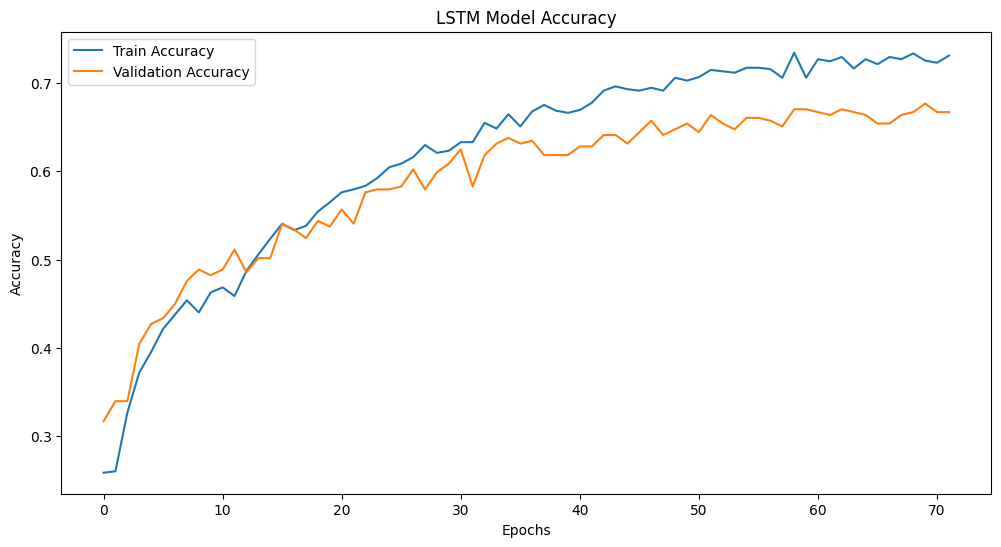

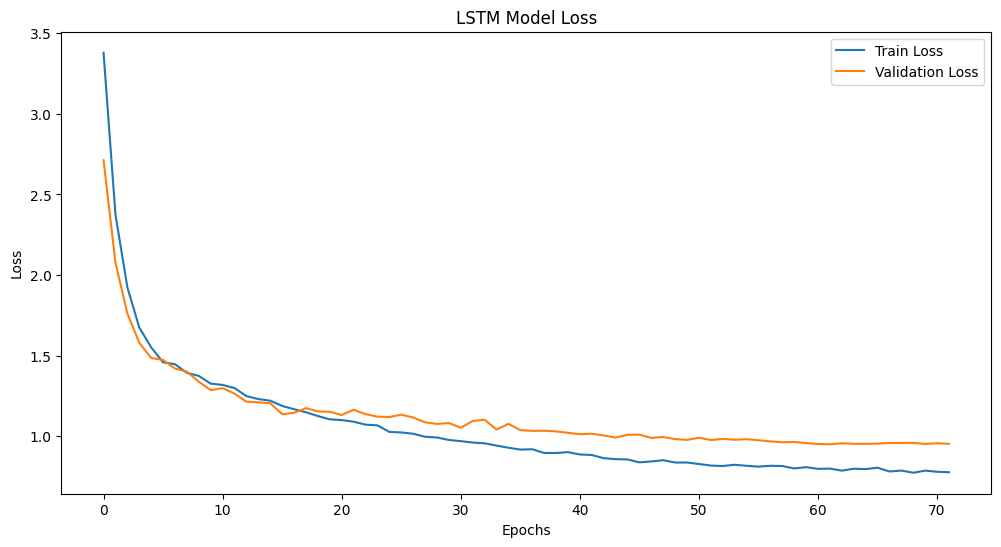

In [271]:
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [272]:
from transformers import BertTokenizer, TFBertModel

In [273]:
seed = 10
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [274]:
columns_to_drop = ['Accident Level', 'Potential Accident Level']
X_structured = industry_feature_df.drop(columns=columns_to_drop)
y = industry_feature_df['Accident Level']

In [275]:
descriptions = data['NLP_Preprocessed_Description']

In [276]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
encoded_inputs = tokenizer(list(descriptions), max_length=200, truncation=True, padding=True, return_tensors="tf")
X_text = encoded_inputs['input_ids']

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [277]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [278]:
smote = SMOTE(random_state=seed)
X_structured_smote, y_smote = smote.fit_resample(X_structured, np.argmax(y, axis=1))

indices = smote.fit_resample(np.arange(len(padded_descriptions)).reshape(-1, 1), np.argmax(y, axis=1))[0].flatten()
padded_descriptions_smote = padded_descriptions[indices]

y_smote = to_categorical(y_smote)

In [279]:
X_train_structured, X_test_structured, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_structured_smote, padded_descriptions_smote, y_smote, test_size=0.2, random_state=seed, stratify=y_smote.argmax(axis=1)
)

scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train_structured.iloc[:, :] = pipeline.fit_transform(X_train_structured)
X_test_structured.iloc[:, :] = pipeline.transform(X_test_structured)

In [280]:
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_smote, axis=1)), y=np.argmax(y_smote, axis=1))
class_weights = dict(enumerate(class_weights))

initial_lr = 0.001
lr_schedule = lambda epoch: initial_lr * 0.95**epoch
lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [281]:
input_text = Input(shape=(200,), dtype=tf.int32, name='Text_Input')

class BertLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BertLayer, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        return self.bert_model(inputs)[1]

bert_output = BertLayer(bert_model)(input_text)
bert_output = BatchNormalization()(bert_output)

input_structured = Input(shape=(X_train_structured.shape[1],), name='Structured_Input')
structured_output = BatchNormalization()(input_structured)

concat = Concatenate()([bert_output, structured_output])

dense1 = Dense(128, activation='relu')(concat)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense2)
output = Dense(y_train.shape[1], activation='softmax')(dropout2)

model_bert = Model(inputs=[input_text, input_structured], outputs=output)
model_bert.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [282]:
history_bert = model_bert.fit(
    [X_train_text, X_train_structured], y_train,
    validation_data=([X_test_text, X_test_structured], y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2799 - loss: 1.7331 - val_accuracy: 0.3172 - val_loss: 1.4466 - learning_rate: 0.0010
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 45s 443ms/step - accuracy: 0.4435 - loss: 1.5327 - val_accuracy: 0.5372 - val_loss: 1.1218 - learning_rate: 9.5000e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 452ms/step - accuracy: 0.5399 - loss: 1.2261 - val_accuracy: 0.6278 - val_loss: 0.9774 - learning_rate: 9.0250e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 23s 507ms/step - accuracy: 0.5700 - loss: 1.1380 - val_accuracy: 0.6311 - val_loss: 0.9268 - learning_rate: 8.5737e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 487ms/step - accuracy: 0.6030 - loss: 1.0649 - val_accuracy: 0.6699 - val_loss: 0.8846 - learning_rate: 8.1451e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 487ms/step - accuracy: 0.6598 - loss: 0.9408 - val_accuracy: 0.7379 - val_loss: 0.8160 - learning_rate: 7.7378e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 516ms/step - acc

In [283]:
loss_model_bert, accuracy_model_bert = model_bert.evaluate(
    [X_test_text, X_test_structured], y_test, verbose=1
)
print(f"Test Accuracy (BERT): {accuracy_model_bert * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.7304 - loss: 0.7348
Test Accuracy (BERT): 73.79%


In [284]:
y_pred = np.argmax(model_bert.predict([X_test_text, X_test_structured]), axis=1)
y_true = np.argmax(y_test, axis=1)

class_names = [str(cls) for cls in label_encoder.classes_]

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.79      0.69        62
           1       0.69      0.58      0.63        62
           2       0.72      0.82      0.77        61
           3       0.80      0.52      0.63        62
           4       0.91      0.98      0.95        62

    accuracy                           0.74       309
   macro avg       0.75      0.74      0.73       309
weighted avg       0.75      0.74      0.73       309



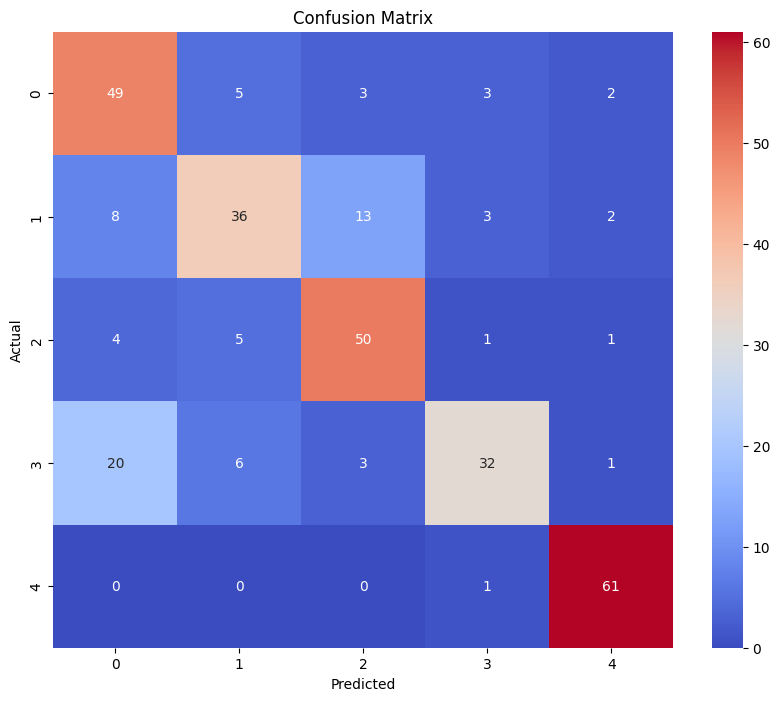

In [285]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

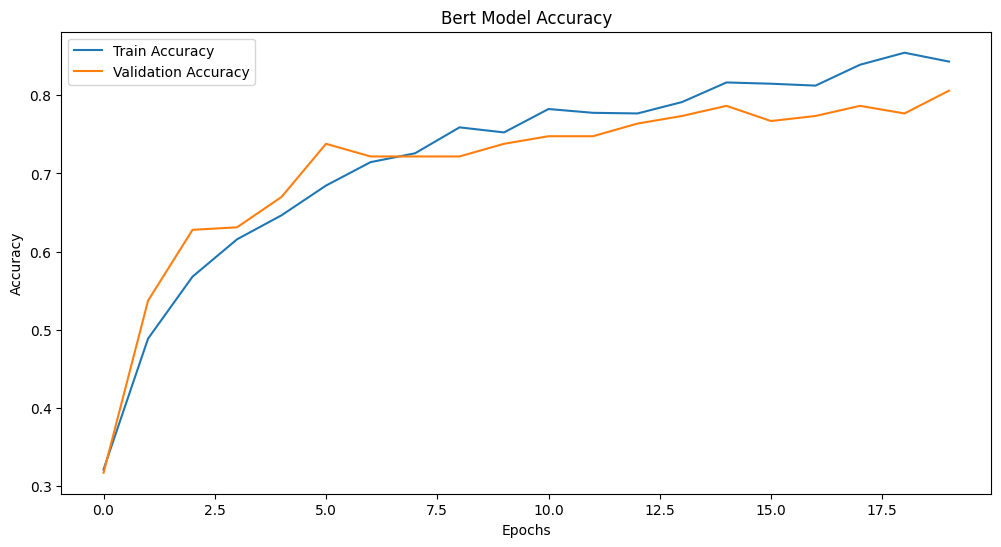

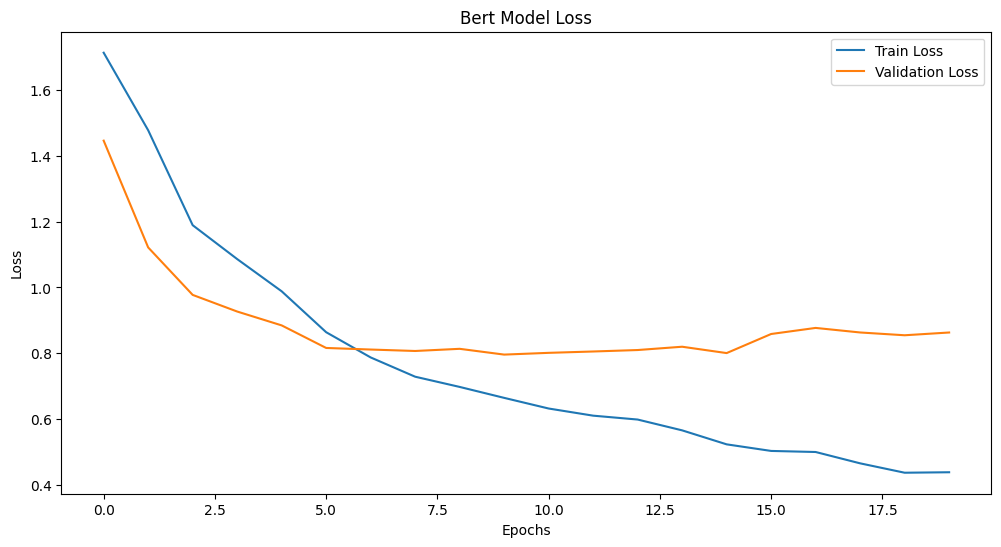

In [286]:
plt.figure(figsize=(12, 6))
plt.plot(history_bert.history['accuracy'], label='Train Accuracy')
plt.plot(history_bert.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bert Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_bert.history['loss'], label='Train Loss')
plt.plot(history_bert.history['val_loss'], label='Validation Loss')
plt.title('Bert Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Bidirectional RNN + Convolution + Attention layers

In [287]:
seed = 10
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [288]:
columns_to_drop = ['Accident Level', 'Potential Accident Level']
X_structured = industry_feature_df.drop(columns=columns_to_drop)
y = industry_feature_df['Accident Level']

In [289]:
descriptions = data['NLP_Preprocessed_Description']

In [290]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(descriptions)
description_sequences = tokenizer.texts_to_sequences(descriptions)
padded_descriptions = pad_sequences(description_sequences, maxlen=200)

In [291]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [292]:
smote = SMOTE(random_state=seed)
X_structured_smote, y_smote = smote.fit_resample(X_structured, np.argmax(y, axis=1))

indices = smote.fit_resample(np.arange(len(padded_descriptions)).reshape(-1, 1), np.argmax(y, axis=1))[0].flatten()
padded_descriptions_smote = padded_descriptions[indices]

y_smote = to_categorical(y_smote)

In [293]:
X_train_structured, X_test_structured, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_structured_smote, padded_descriptions_smote, y_smote, test_size=0.2, random_state=seed, stratify=y_smote.argmax(axis=1)
)

scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train_structured.iloc[:, :] = pipeline.fit_transform(X_train_structured)
X_test_structured.iloc[:, :] = pipeline.transform(X_test_structured)

In [294]:
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_smote, axis=1)), y=np.argmax(y_smote, axis=1))
class_weights = dict(enumerate(class_weights))

initial_lr = 0.001
lr_schedule = lambda epoch: initial_lr * 0.95**epoch
lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [296]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))

input_text = Input(shape=(200,), name="Text_Input")
embedding = Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=100,
    weights=[embedding_matrix],
    trainable=True
)(input_text)
conv1d = Conv1D(128, kernel_size=5, activation='relu')(embedding)
rnn_layer = Bidirectional(SimpleRNN(128, return_sequences=True))(conv1d)

attention = Attention()([rnn_layer, rnn_layer])
attention_output = Dense(128, activation='relu')(attention)
batch_norm_text = BatchNormalization()(attention_output)
flatten_text = Flatten()(batch_norm_text)

input_structured = Input(shape=(X_train_structured.shape[1],), name="Structured_Input")
batch_norm_structured = BatchNormalization()(input_structured)

concat = Concatenate()([flatten_text, batch_norm_structured])

dense1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concat)
dropout1 = Dropout(0.4)(dense1)
dense2 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout1)
dropout2 = Dropout(0.4)(dense2)
output = Dense(y_train.shape[1], activation='softmax')(dropout2)

model_rnn_plus = Model(inputs=[input_text, input_structured], outputs=output)

model_rnn_plus.compile(
    optimizer=Adam(learning_rate=initial_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [297]:
history_rnn_plus = model_rnn_plus.fit(
    [X_train_text, X_train_structured], y_train,
    validation_data=([X_test_text, X_test_structured], y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.2920 - loss: 3.5221 - val_accuracy: 0.5761 - val_loss: 1.9910 - learning_rate: 0.0010
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5260 - loss: 1.9398 - val_accuracy: 0.6699 - val_loss: 1.4433 - learning_rate: 9.5000e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6469 - loss: 1.4663 - val_accuracy: 0.7184 - val_loss: 1.2202 - learning_rate: 9.0250e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6869 - loss: 1.2379 - val_accuracy: 0.7670 - val_loss: 1.1241 - learning_rate: 8.5737e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7391 - loss: 1.0685 - val_accuracy: 0.7702 - val_loss: 1.0653 - learning_rate: 8.1451e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7589 - loss: 0.9740 - val_accuracy: 0.7735 - val_loss: 1.0256 - learning_rate: 7.7378e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.

In [298]:
loss_rnn_plus, accuracy_rnn_plus = model_rnn_plus.evaluate(
    [X_test_text, X_test_structured], y_test, verbose=1
)
print(f"Test Accuracy (Bidirectional RNN): {accuracy_rnn_plus * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8876 - loss: 0.6182
Test Accuracy (Bidirectional RNN): 87.06%


In [299]:
y_pred = np.argmax(model_rnn_plus.predict([X_test_text, X_test_structured]), axis=1)
y_true = np.argmax(y_test, axis=1)

class_names = [str(cls) for cls in label_encoder.classes_]

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        62
           1       0.85      0.81      0.83        62
           2       0.91      0.97      0.94        61
           3       0.90      0.87      0.89        62
           4       0.92      0.98      0.95        62

    accuracy                           0.87       309
   macro avg       0.87      0.87      0.87       309
weighted avg       0.87      0.87      0.87       309



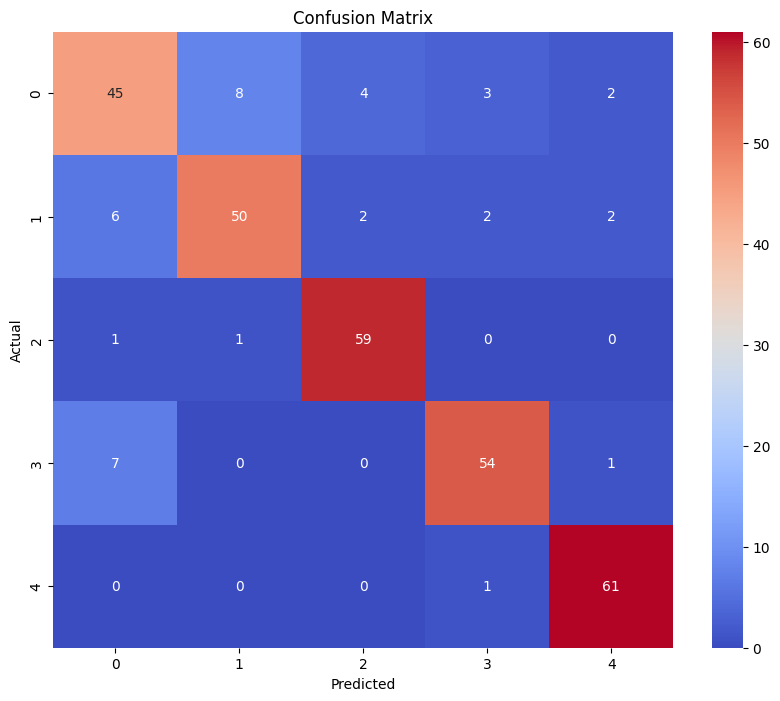

In [300]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

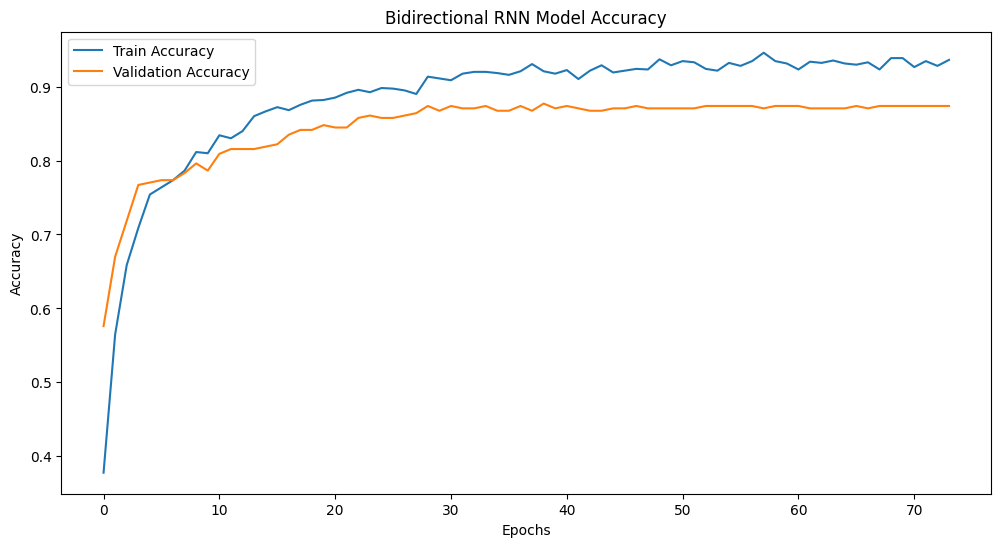

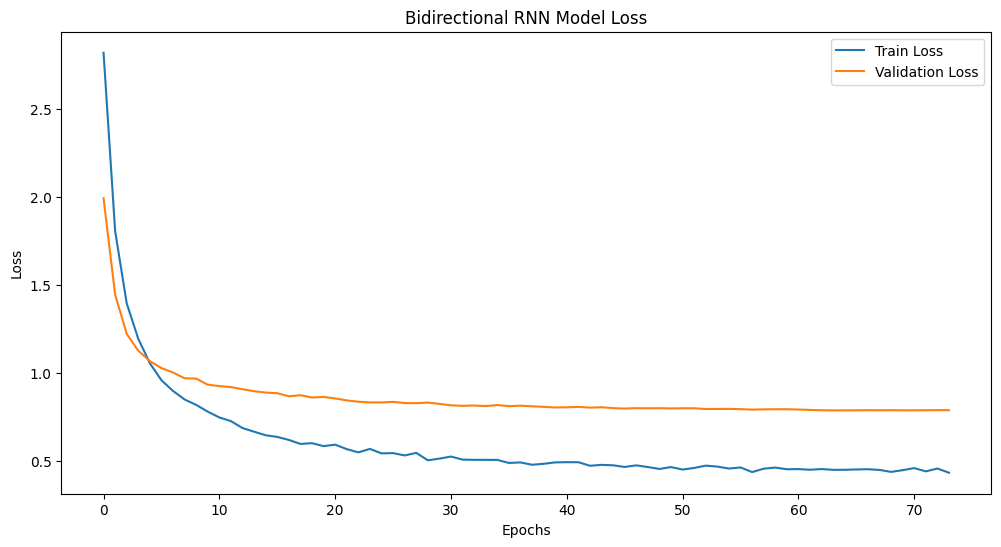

In [301]:
plt.figure(figsize=(12, 6))
plt.plot(history_rnn_plus.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn_plus.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_rnn_plus.history['loss'], label='Train Loss')
plt.plot(history_rnn_plus.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Bidirectional LSTM + Convolution + Attention layers

In [302]:
seed = 10
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [303]:
columns_to_drop = ['Accident Level', 'Potential Accident Level']
X_structured = industry_feature_df.drop(columns=columns_to_drop)
y = industry_feature_df['Accident Level']

In [304]:
descriptions = data['NLP_Preprocessed_Description']

In [305]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(descriptions)
description_sequences = tokenizer.texts_to_sequences(descriptions)
padded_descriptions = pad_sequences(description_sequences, maxlen=200)

In [306]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [307]:
smote = SMOTE(random_state=seed)
X_structured_smote, y_smote = smote.fit_resample(X_structured, np.argmax(y, axis=1))

indices = smote.fit_resample(np.arange(len(padded_descriptions)).reshape(-1, 1), np.argmax(y, axis=1))[0].flatten()
padded_descriptions_smote = padded_descriptions[indices]

y_smote = to_categorical(y_smote)

In [308]:
X_train_structured, X_test_structured, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_structured_smote, padded_descriptions_smote, y_smote, test_size=0.2, random_state=seed, stratify=y_smote.argmax(axis=1)
)

scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train_structured.iloc[:, :] = pipeline.fit_transform(X_train_structured)
X_test_structured.iloc[:, :] = pipeline.transform(X_test_structured)

In [309]:
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_smote, axis=1)), y=np.argmax(y_smote, axis=1))
class_weights = dict(enumerate(class_weights))

initial_lr = 0.001
lr_schedule = lambda epoch: initial_lr * 0.95**epoch
lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [311]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))

input_text = Input(shape=(200,), name="Text_Input")
embedding = Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=100,
    weights=[embedding_matrix],
    trainable=True
)(input_text)
conv1d = Conv1D(128, kernel_size=5, activation='relu')(embedding)
lstm_layer = Bidirectional(LSTM(128, return_sequences=True))(conv1d)
attention = Attention()([lstm_layer, lstm_layer])
attention_output = Dense(128, activation='relu')(attention)
batch_norm_text = BatchNormalization()(attention_output)
flatten_text = Flatten()(batch_norm_text)

input_structured = Input(shape=(X_train_structured.shape[1],), name="Structured_Input")
batch_norm_structured = BatchNormalization()(input_structured)

concat = Concatenate()([flatten_text, batch_norm_structured])

dense1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concat)
dropout1 = Dropout(0.4)(dense1)
dense2 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout1)
dropout2 = Dropout(0.4)(dense2)
output = Dense(y_train.shape[1], activation='softmax')(dropout2)

model_bilstm = Model(inputs=[input_text, input_structured], outputs=output)

model_bilstm.compile(
    optimizer=Adam(learning_rate=initial_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [312]:
history_bilstm = model_bilstm.fit(
    [X_train_text, X_train_structured], y_train,
    validation_data=([X_test_text, X_test_structured], y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.2878 - loss: 3.5239 - val_accuracy: 0.5275 - val_loss: 1.9986 - learning_rate: 0.0010
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5244 - loss: 1.9243 - val_accuracy: 0.6731 - val_loss: 1.4367 - learning_rate: 9.5000e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6439 - loss: 1.4841 - val_accuracy: 0.7282 - val_loss: 1.2113 - learning_rate: 9.0250e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6973 - loss: 1.2314 - val_accuracy: 0.7476 - val_loss: 1.1035 - learning_rate: 8.5737e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7348 - loss: 1.0833 - val_accuracy: 0.7605 - val_loss: 1.0525 - learning_rate: 8.1451e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7296 - loss: 1.0017 - val_accuracy: 0.7605 - val_loss: 1.0217 - learning_rate: 7.7378e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.77

In [313]:
loss_bilstm, accuracy_bilstm = model_bilstm.evaluate(
    [X_test_text, X_test_structured], y_test, verbose=1
)
print(f"Test Accuracy (Bidirectional LSTM): {accuracy_bilstm * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8926 - loss: 0.6078
Test Accuracy (Bidirectional LSTM): 88.03%


In [314]:
y_pred = np.argmax(model_bilstm.predict([X_test_text, X_test_structured]), axis=1)
y_true = np.argmax(y_test, axis=1)

class_names = [str(cls) for cls in label_encoder.classes_]

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        62
           1       0.85      0.82      0.84        62
           2       0.92      0.97      0.94        61
           3       0.90      0.89      0.89        62
           4       0.94      0.98      0.96        62

    accuracy                           0.88       309
   macro avg       0.88      0.88      0.88       309
weighted avg       0.88      0.88      0.88       309



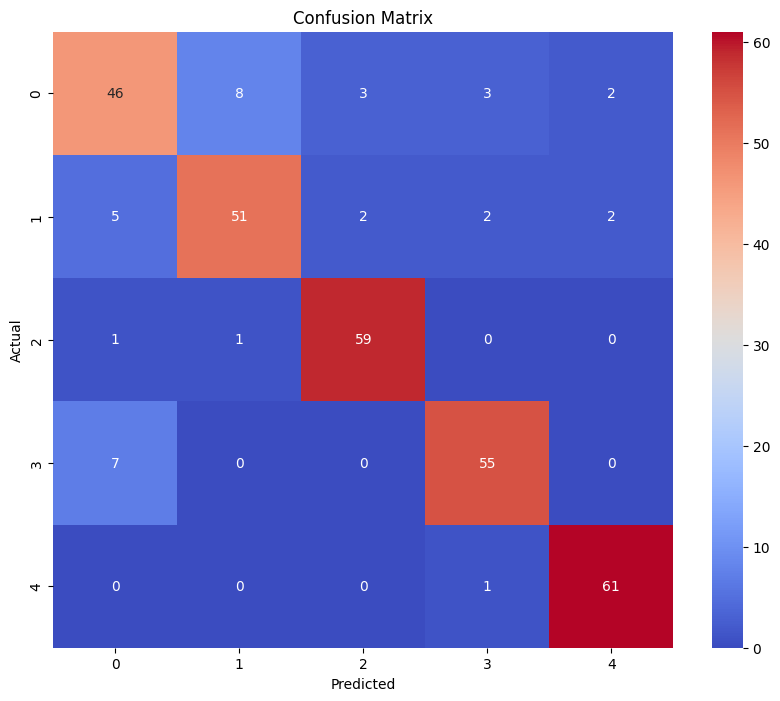

In [315]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

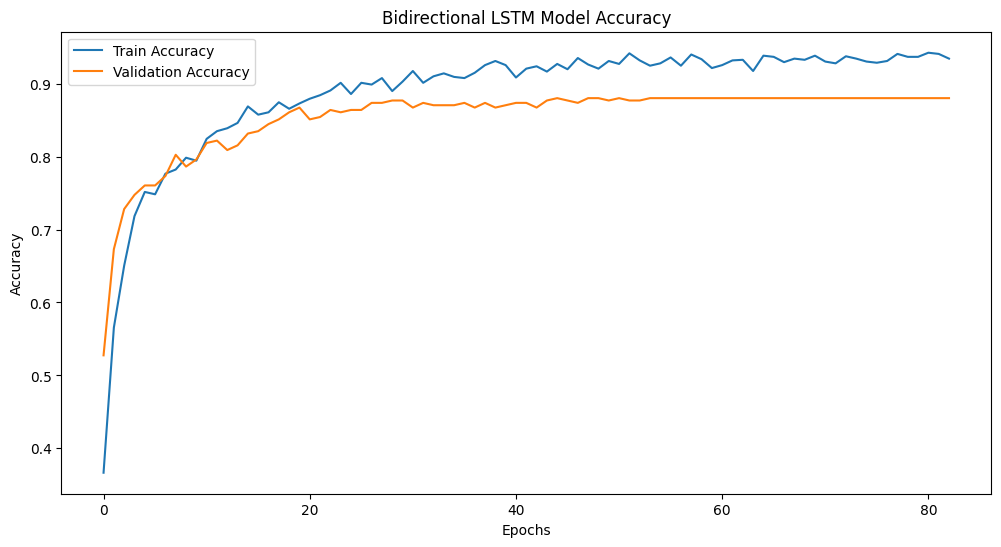

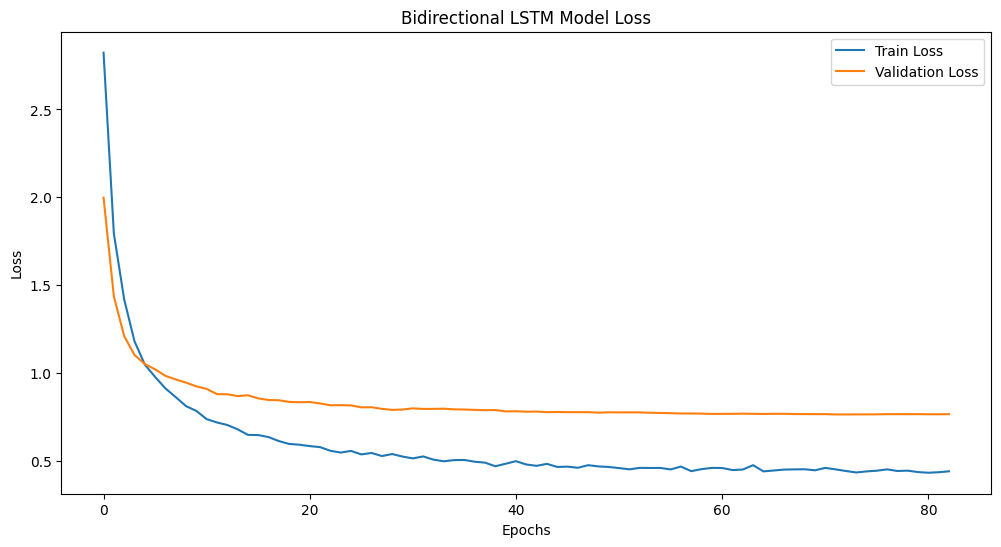

In [316]:
plt.figure(figsize=(12, 6))
plt.plot(history_bilstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_bilstm.history['loss'], label='Train Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Bidirectional LSTM reported the highest Accuracy and overall F1 score compared to ANN, SimpleRNN, LSTM, BERT and Bidirectional RNN. It is apt for predicting Potential Accident Levels based on the model predictions of Accident Levels.

##### We will proceed with Bidirectional LSTM for Phase II, i.e. predicting the Potential Accident Levels based on features and predictions of Accident Levels.

#### Step 10 - RNN Classifier - Phase II

##### Bidirectional LSTM + Convolution + Attention layers

In [317]:
seed = 10
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [318]:
descriptions = data['NLP_Preprocessed_Description']

In [319]:
description_sequences = tokenizer.texts_to_sequences(descriptions)
padded_descriptions = pad_sequences(description_sequences, maxlen=200)

columns_to_drop = ['Accident Level', 'Potential Accident Level']
structured_features = industry_feature_df.drop(columns=columns_to_drop)

if 'Predicted Accident Level' in structured_features.columns:
    structured_features = structured_features.drop(columns=['Predicted Accident Level'])
if 'index' in structured_features.columns:
    structured_features = structured_features.drop(columns=['index'])

structured_features_transformed = pipeline.transform(structured_features)

y_pred = np.argmax(model_rnn_plus.predict([padded_descriptions, structured_features_transformed]), axis=1)

predicted_accident_levels = label_encoder.inverse_transform(y_pred)

industry_feature_df_with_predictions = industry_feature_df.copy()
industry_feature_df_with_predictions['Predicted Accident Level'] = predicted_accident_levels

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [320]:
industry_feature_df_with_predictions.head()

Weekday  Accident Level  Potential Accident Level  Year  Month  Day  \
0        4               0                         3  2016      1    1   
1        5               0                         3  2016      1    2   
2        2               0                         2  2016      1    6   
3        4               0                         0  2016      1    8   
4        6               3                         3  2016      1   10   

   WeekofYear  Country_02  Country_03  Local_02  ...  TFIDF_cause injury time  \
0          53           0           0         0  ...                      0.0   
1          53           1           0         1  ...                      0.0   
2           1           0           0         0  ...                      0.0   
3           1           0           0         0  ...                      0.0   
4           1           0           0         0  ...                      0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     0.0                      0.0   
4                     0.0                      0.0   

   TFIDF_generate injury time  TFIDF_hand cause injury  \
0                         0.0                 0.000000   
1                         0.0                 0.000000   
2                         0.0                 0.000000   
3                         0.0                 0.680994   
4                         0.0                 0.000000   

   TFIDF_injury time accident  TFIDF_left hand cause  TFIDF_right hand cause  \
0                         0.0               0.000000                     0.0   
1                         0.0               0.000000                     0.0   
2                         0.0               0.000000                     0.0   
3                         0.0               0.732289                     0.0   
4                         0.0               0.000000                     0.0   

   TFIDF_time accident employee  Predicted Accident Level  
0                           0.0                         0  
1                           0.0                         0  
2                           0.0                         0  
3                           0.0                         0  
4                           0.0                         3  

[5 rows x 88 columns]

In [321]:
X_structured = industry_feature_df_with_predictions
y = industry_feature_df['Potential Accident Level']

In [322]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(descriptions)
description_sequences = tokenizer.texts_to_sequences(descriptions)
padded_descriptions = pad_sequences(description_sequences, maxlen=200)

In [323]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [324]:
smote = SMOTE(random_state=seed)
X_structured_smote, y_smote = smote.fit_resample(X_structured, np.argmax(y, axis=1))

indices = smote.fit_resample(np.arange(len(padded_descriptions)).reshape(-1, 1), np.argmax(y, axis=1))[0].flatten()
padded_descriptions_smote = padded_descriptions[indices]

y_smote = to_categorical(y_smote)

In [325]:
X_train_structured, X_test_structured, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_structured_smote, padded_descriptions_smote, y_smote, test_size=0.2, random_state=seed, stratify=y_smote.argmax(axis=1)
)

scaler_X = StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train_structured.iloc[:, :] = pipeline.fit_transform(X_train_structured)
X_test_structured.iloc[:, :] = pipeline.transform(X_test_structured)

In [326]:
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_smote, axis=1)), y=np.argmax(y_smote, axis=1))
class_weights = dict(enumerate(class_weights))

initial_lr = 0.001
lr_schedule = lambda epoch: initial_lr * 0.95**epoch
lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [328]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))

input_text = Input(shape=(200,), name="Text_Input")
embedding = Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=100,
    weights=[embedding_matrix],
    trainable=True
)(input_text)
conv1d = Conv1D(128, kernel_size=5, activation='relu')(embedding)
lstm_layer = Bidirectional(LSTM(128, return_sequences=True))(conv1d)
attention = Attention()([lstm_layer, lstm_layer])
attention_output = Dense(128, activation='relu')(attention)
batch_norm_text = BatchNormalization()(attention_output)
flatten_text = Flatten()(batch_norm_text)

input_structured = Input(shape=(X_train_structured.shape[1],), name="Structured_Input")
batch_norm_structured = BatchNormalization()(input_structured)

concat = Concatenate()([flatten_text, batch_norm_structured])

dense1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concat)
dropout1 = Dropout(0.4)(dense1)
dense2 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout1)
dropout2 = Dropout(0.4)(dense2)
output = Dense(y_train.shape[1], activation='softmax')(dropout2)

model_bilstm_2 = Model(inputs=[input_text, input_structured], outputs=output)

model_bilstm_2.compile(
    optimizer=Adam(learning_rate=initial_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [329]:
history_bilstm_2 = model_bilstm_2.fit(
    [X_train_text, X_train_structured], y_train,
    validation_data=([X_test_text, X_test_structured], y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.3407 - loss: 4.0712 - val_accuracy: 0.4468 - val_loss: 2.4892 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4899 - loss: 2.3697 - val_accuracy: 0.4894 - val_loss: 2.0641 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5303 - loss: 1.9669 - val_accuracy: 0.5106 - val_loss: 1.7827 - learning_rate: 9.0250e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5981 - loss: 1.7253 - val_accuracy: 0.6241 - val_loss: 1.5666 - learning_rate: 8.5737e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6533 - loss: 1.4905 - val_accuracy: 0.6170 - val_loss: 1.4514 - learning_rate: 8.1451e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6692 - loss: 1.3840 - val_accuracy: 0.6525 - val_loss: 1.3284 - learning_rate: 7.7378e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.69

In [330]:
loss_bilstm, accuracy_bilstm = model_bilstm_2.evaluate(
    [X_test_text, X_test_structured], y_test, verbose=1
)
print(f"Test Accuracy (Bidirectional LSTM): {accuracy_bilstm * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9005 - loss: 0.5582
Test Accuracy (Bidirectional LSTM): 88.65%


In [331]:
y_pred = np.argmax(model_bilstm_2.predict([X_test_text, X_test_structured]), axis=1)
y_true = np.argmax(y_test, axis=1)

class_names = [str(cls) for cls in label_encoder.classes_]

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.83      0.86      0.85        29
           2       0.82      0.82      0.82        28
           3       0.89      0.89      0.89        28
           4       1.00      0.96      0.98        28

    accuracy                           0.89       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.89      0.89      0.89       141



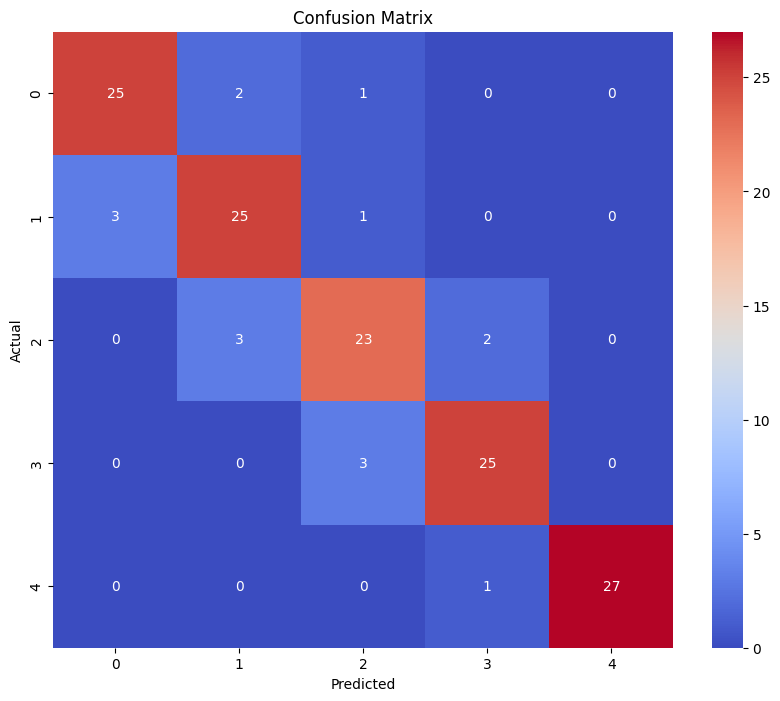

In [332]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

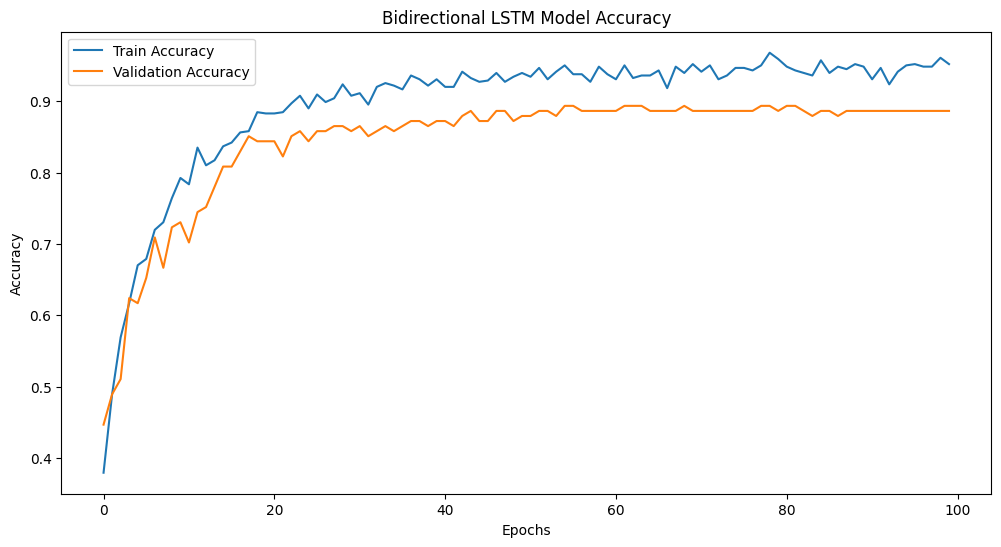

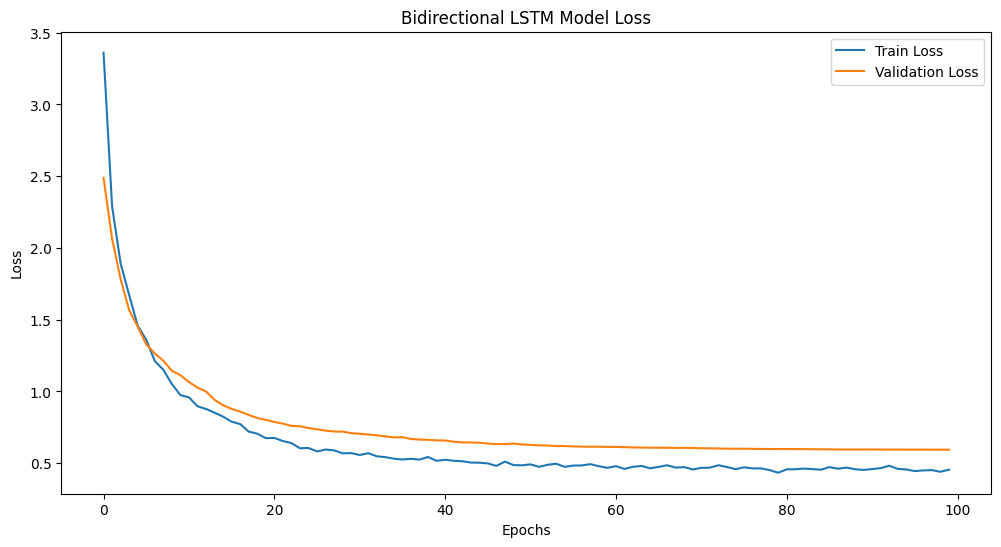

In [333]:
plt.figure(figsize=(12, 6))
plt.plot(history_bilstm_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_bilstm_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_bilstm_2.history['loss'], label='Train Loss')
plt.plot(history_bilstm_2.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [334]:
# Saving Step 1 model (Accident Levels)
model_bilstm.save("model_bilstm_1.keras")

# Saving Step 2 model (Potential Accident Levels)
model_bilstm_2.save("model_bilstm_2.keras")

from tensorflow.keras.models import load_model

# Loading Step 1 model (Accident Levels)
model_bilstm_1 = load_model("model_bilstm_1.keras")

# Loading Step 2 model (Potential Accident Levels)
model_bilstm_2 = load_model("model_bilstm_2.keras")